In [ ]:
#-- Install required packages
!pip install statsmodels==0.13.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
#-- Define basinc functions to simulate example data

# function (1)
#-- sim_x is the function to simulate n random numbers from 0 to 1
def sim_x(n):
    x = np.random.random((n,1)) # U[0,1]
    return x

# function (2)
#-- true mean function
def f(x):
    true_y = 1 + 2*x + 5*np.sin(5*x)
    return true_y

#-- function (3)
#-- generate Y|X from N{f(x), sd}; N: normal distribution
# sd here is the standard deviation of error in observational data
# the error is assumed to be a Gaussian noise
def sim_y(x, sd):
    n = len(x)
    error = np.random.normal(0,sd,n).reshape(n,1) # (n,) vector to (n,1) vector
    y = f(x) + error
    return y

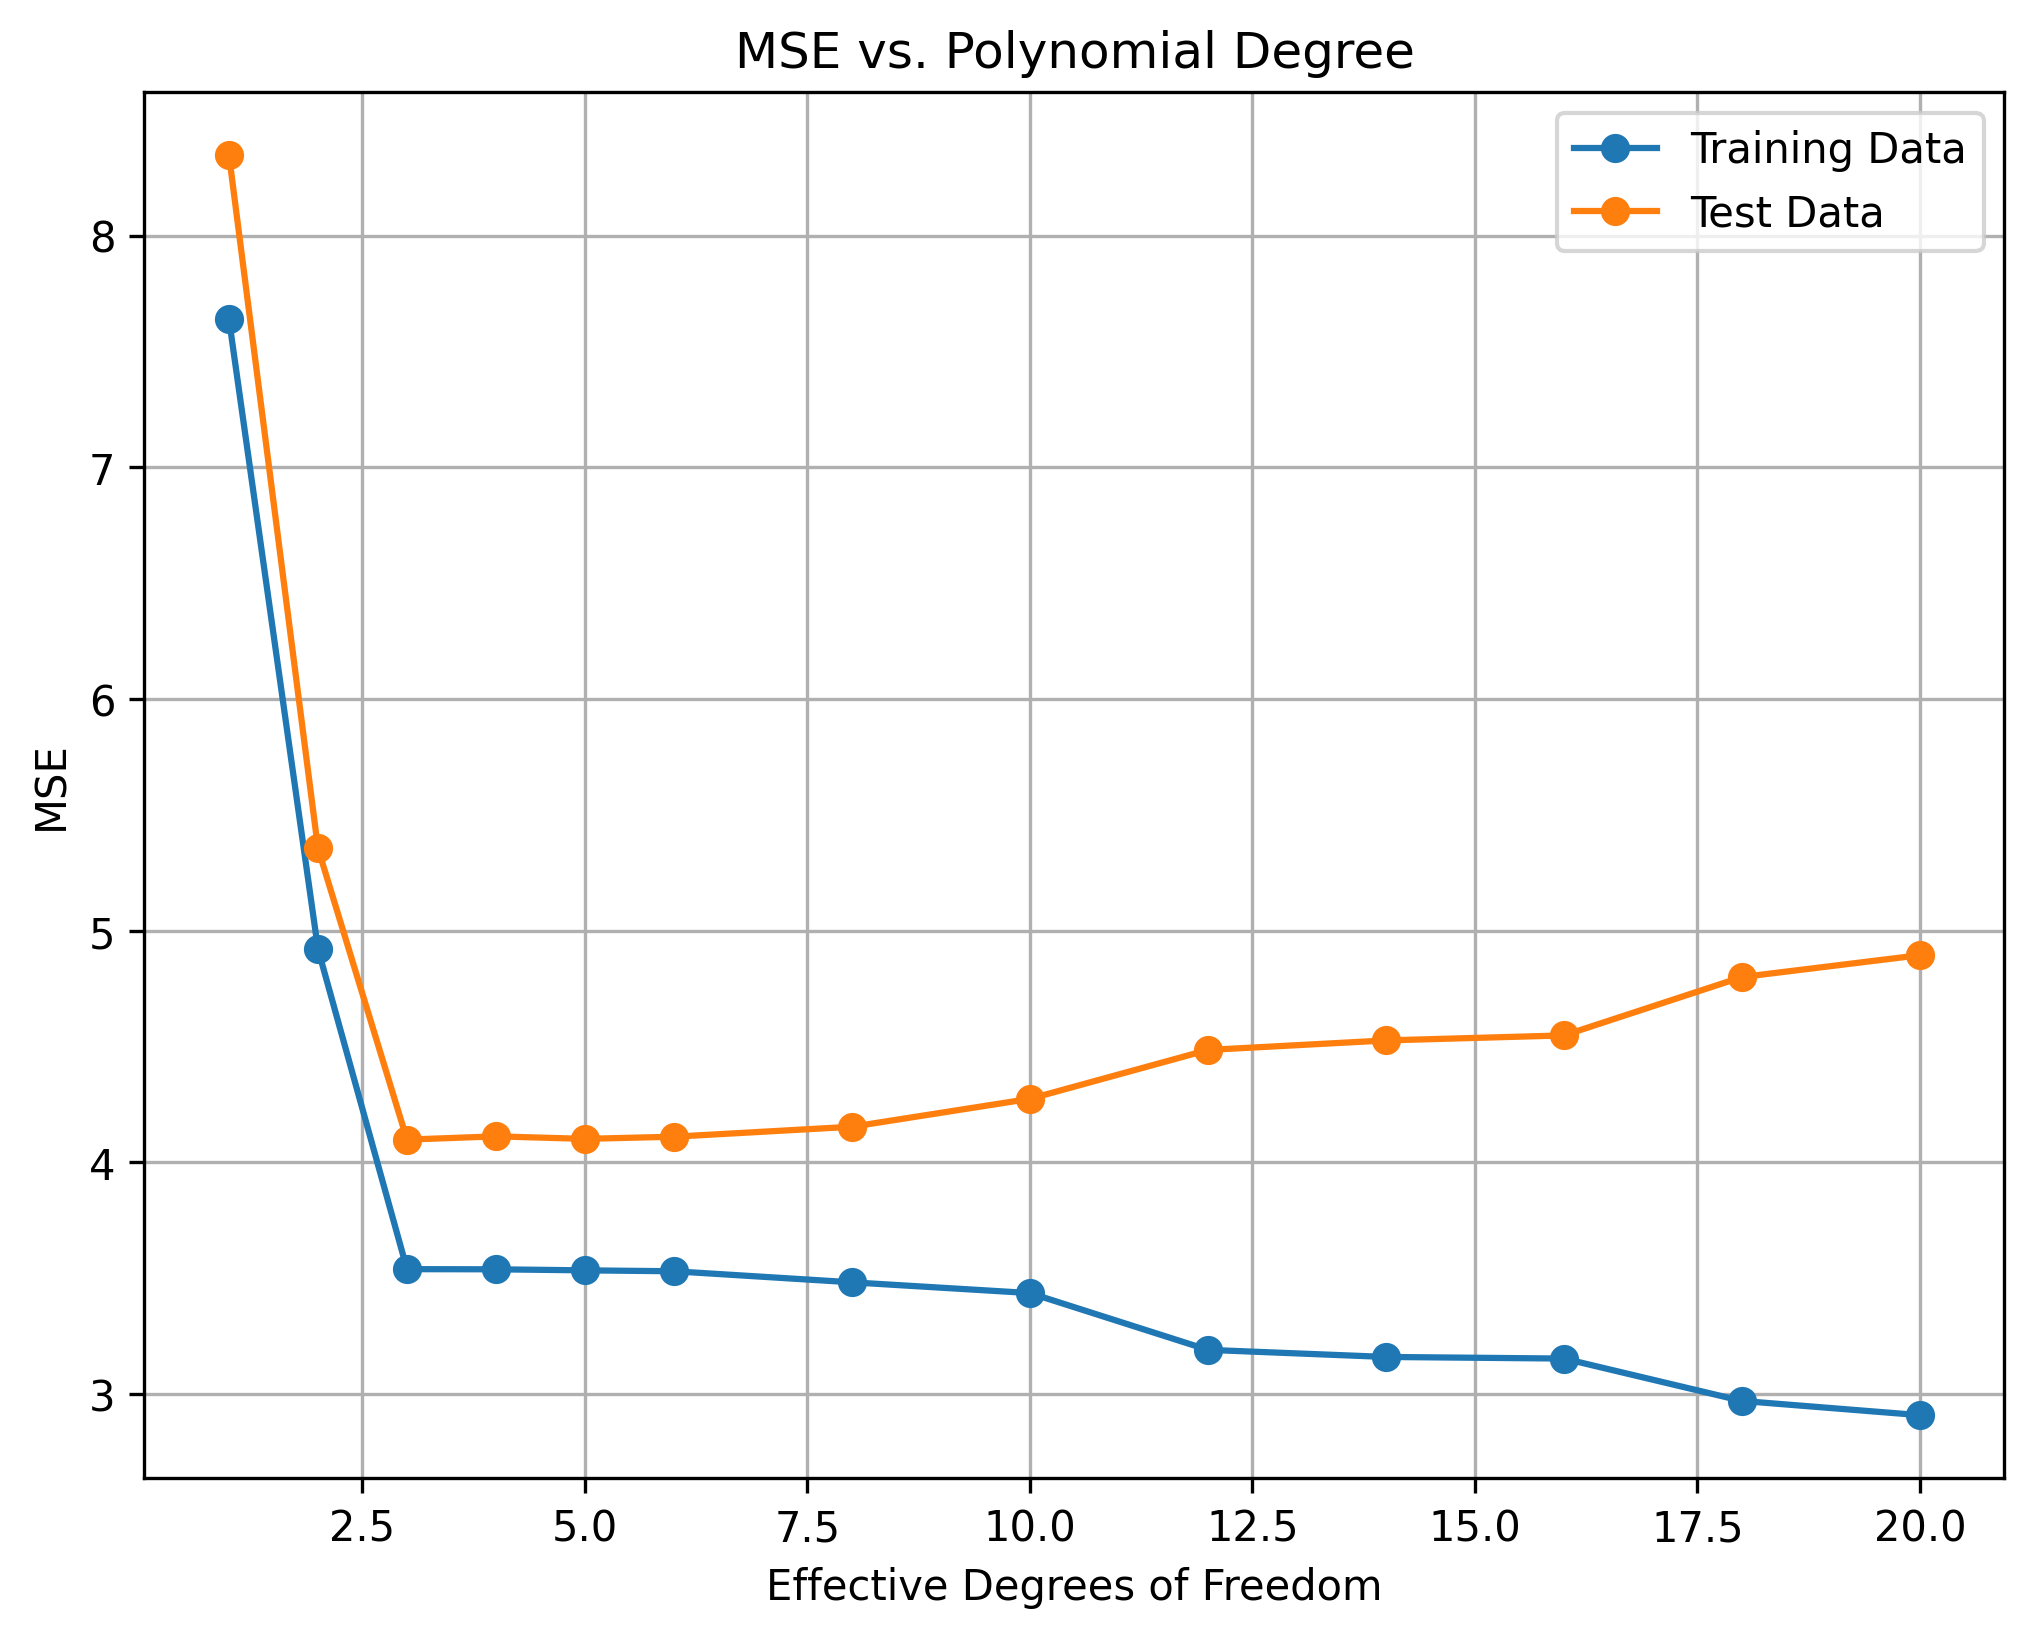

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Sample Data
n_train = 100
n_test = 50000
sd = 2
# Generate some data
x_train = sim_x(n_train)
y_train = sim_y(x_train, sd)
x_test = sim_x(n_test)
y_test = sim_y(x_test, sd)

degrees = [1,2,3,4,5,6,8,10,12,14,16,18,20]
train_errors = []
test_errors = []

for degree in degrees:
    # Creating polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    X_test_poly = poly.transform(x_test.reshape(-1, 1))

    # Fitting a linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predicting and calculating the MSE
    y_train_predicted = model.predict(X_train_poly)
    y_test_predicted = model.predict(X_test_poly)

    train_mse = mean_squared_error(y_train, y_train_predicted)
    test_mse = mean_squared_error(y_test, y_test_predicted)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plotting the results
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,6) # define the fig's size in inch
plt.plot(degrees, train_errors, marker='o', label='Training Data')
plt.plot(degrees, test_errors, marker='o', label='Test Data')
plt.title('MSE vs. Polynomial Degree')
plt.xlabel('Effective Degrees of Freedom')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

degrees = [1,2,3,4,5,6,8,10,12,14,16,18,20]
edfs = [degree + 1 for degree in degrees]

data_polynomial = {
    'Degree': degrees,
    'EDF': edfs,
    'Training MSE': train_errors,
    'Test MSE': test_errors
}

df_polynomial = pd.DataFrame(data_polynomial)
df_polynomial

Degree  EDF  Training MSE  Test MSE
0        1    2      7.638362  8.346805
1        2    3      4.920388  5.355003
2        3    4      3.539240  4.098266
3        4    5      3.538604  4.112400
4        5    6      3.534073  4.101476
5        6    7      3.530158  4.110839
6        8    9      3.482431  4.153861
7       10   11      3.436061  4.274325
8       12   13      3.190945  4.485305
9       14   15      3.160316  4.526356
10      16   17      3.153397  4.548012
11      18   19      2.970530  4.799907
12      20   21      2.909111  4.894256

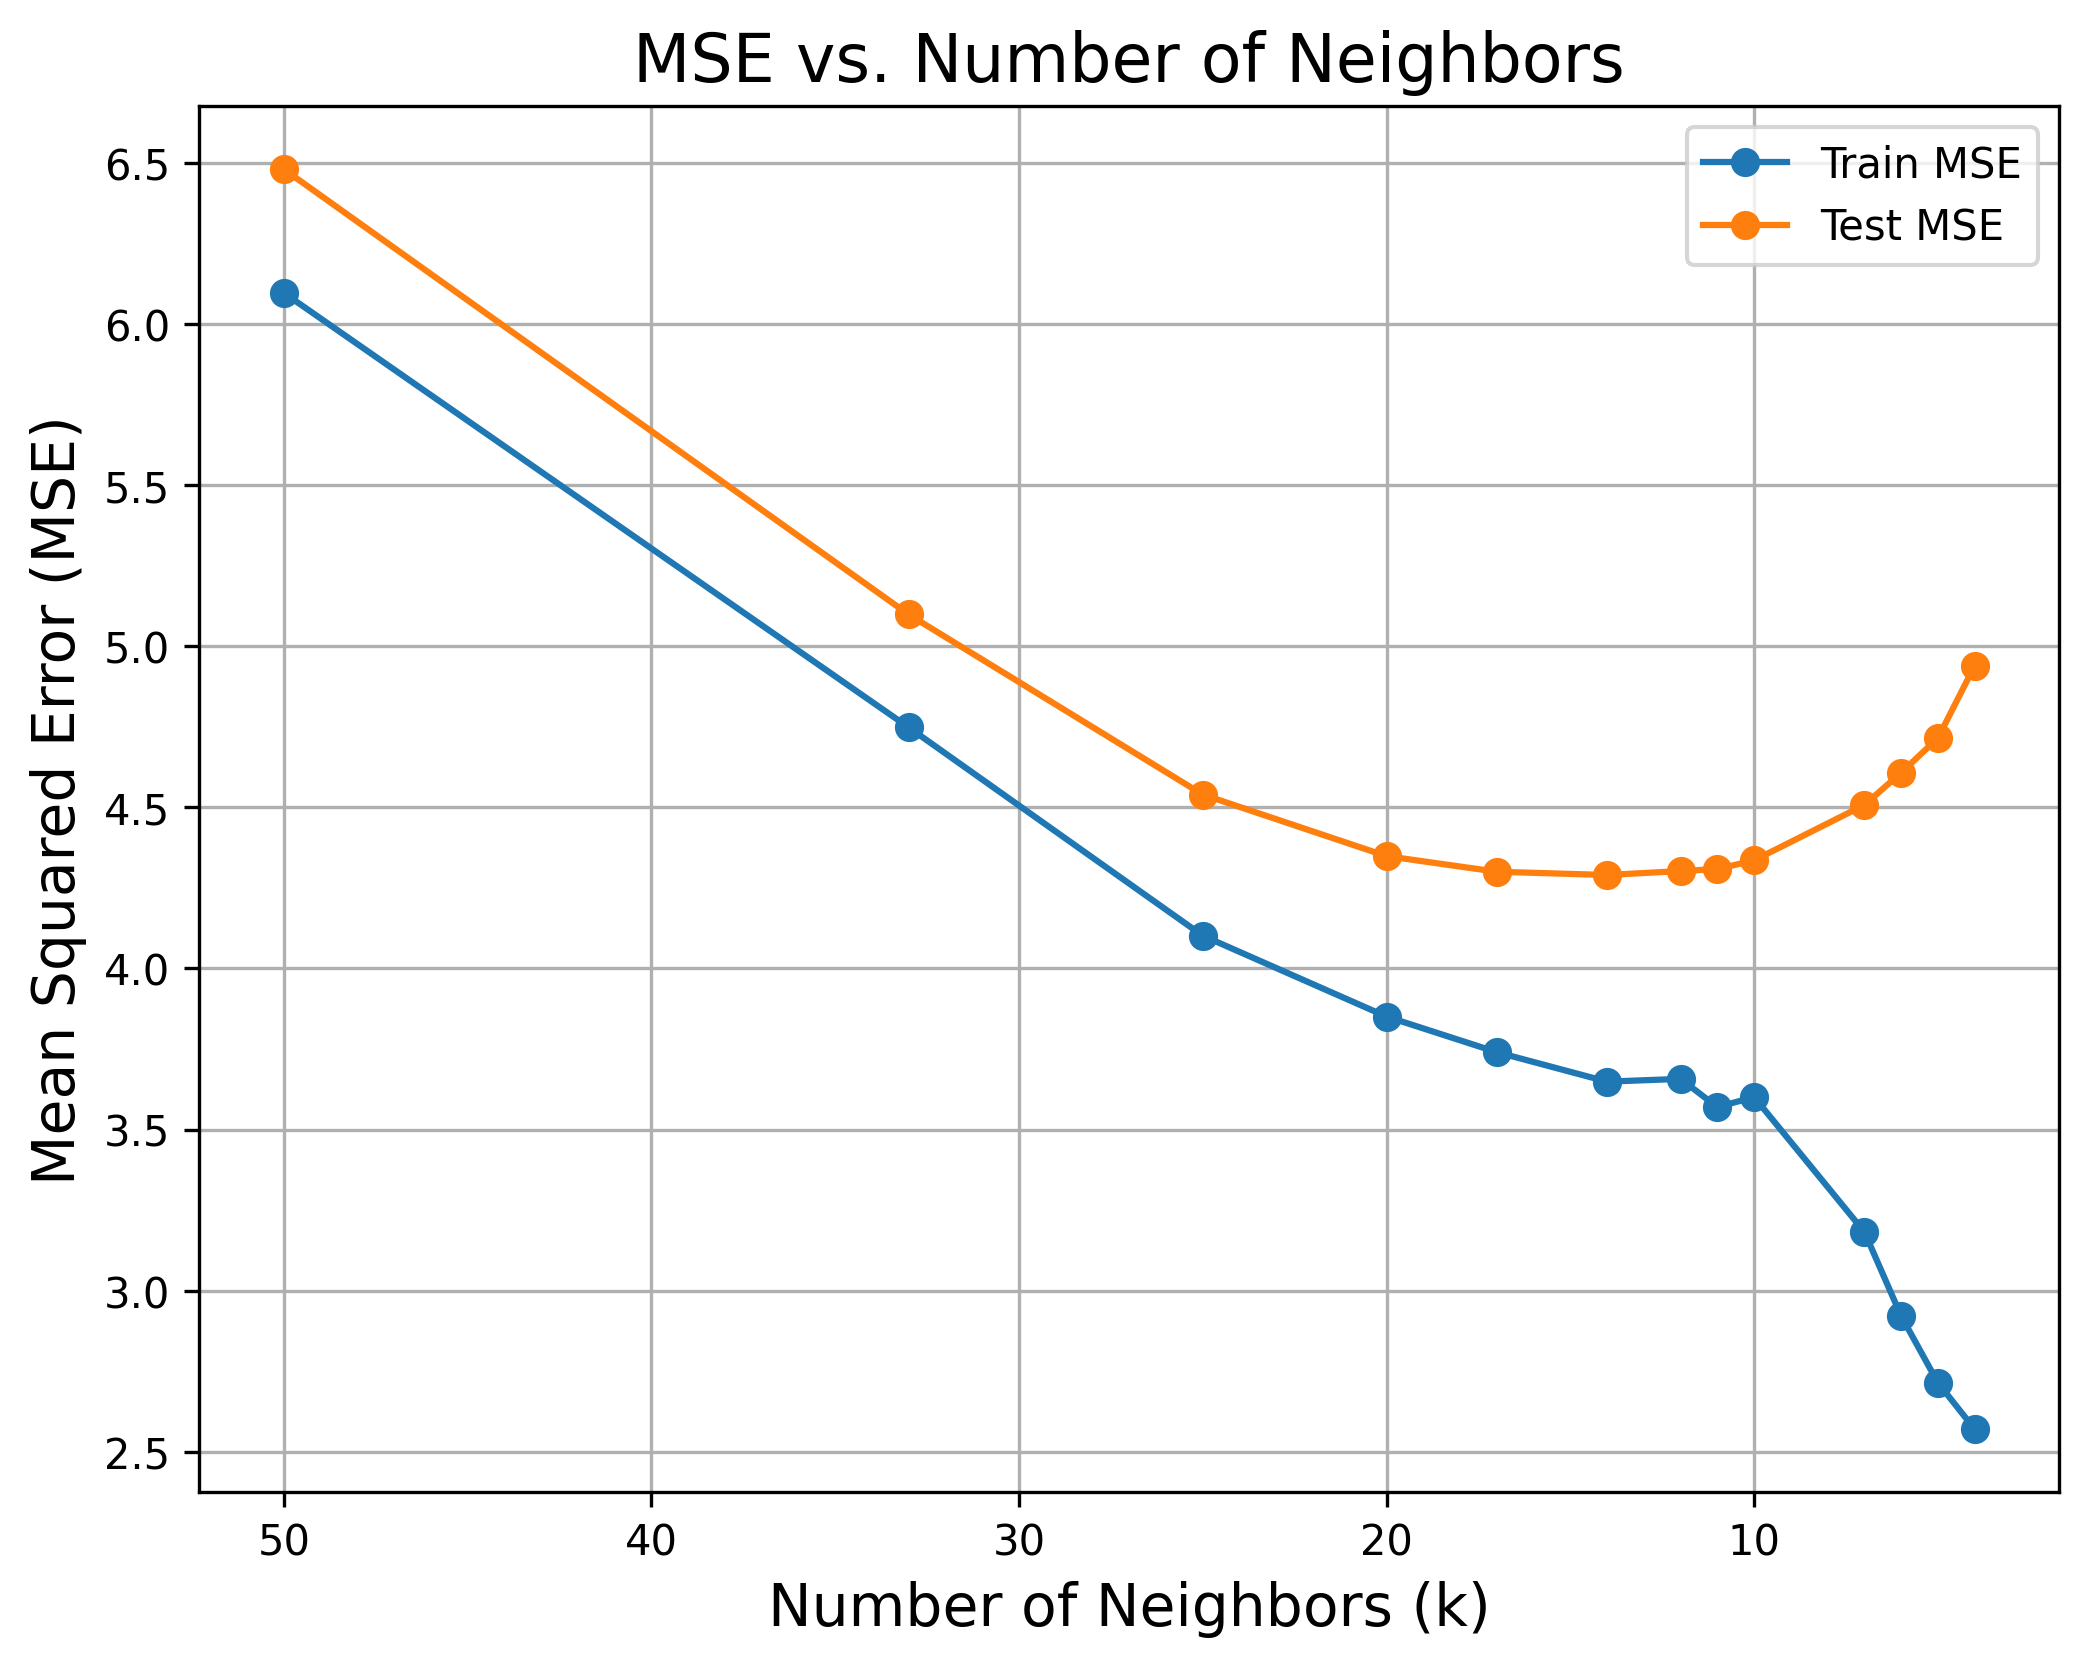

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k_values = [50, 33, 25, 20, 17, 14, 12, 11, 10, 7, 6, 5, 4]
train_mse_values = []
test_mse_values = []

for k in k_values:
    # Create the kNN regression model
    knn_model = KNeighborsRegressor(n_neighbors=k)

    # Fit the model using training data
    knn_model.fit(x_train.reshape(-1, 1), y_train)

    # Predict on train set
    y_train_pred = knn_model.predict(x_train.reshape(-1, 1))

    # Predict on test set
    y_test_pred = knn_model.predict(x_test.reshape(-1, 1))

    # Calculate and store MSE for training set
    train_mse_values.append(mean_squared_error(y_train, y_train_pred))

    # Calculate and store MSE for test set
    test_mse_values.append(mean_squared_error(y_test, y_test_pred))

# Plotting the results
#-- Plot the simulated x and y data
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,6) # define the fig's size in inch

plt.plot(k_values, train_mse_values, marker='o', label='Train MSE')
plt.plot(k_values, test_mse_values, marker='o', label='Test MSE')
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.title('MSE vs. Number of Neighbors', fontsize=16)
plt.gca().invert_xaxis()  # Inverting x-axis as lower k values indicate higher model complexity
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
k_values = [50, 33, 25, 20, 17, 14, 12, 11, 10, 7, 6, 5, 4]
edfs_knn = [2 / k for k in k_values]

data_knn = {
    'k': k_values,
    'EDF': edfs_knn,
    'Training MSE': train_mse_values,
    'Test MSE': test_mse_values
}

df_knn = pd.DataFrame(data_knn)
print(df_knn.sort_values(by='k', ascending=False))
df_knn

     k       EDF  Training MSE  Test MSE
0   50  0.040000      6.096436  6.480062
1   33  0.060606      4.748063  5.098344
2   25  0.080000      4.101760  4.539583
3   20  0.100000      3.850745  4.348542
4   17  0.117647      3.740271  4.300115
5   14  0.142857      3.648820  4.289971
6   12  0.166667      3.657381  4.302255
7   11  0.181818      3.569806  4.308393
8   10  0.200000      3.600907  4.335395
9    7  0.285714      3.182635  4.507287
10   6  0.333333      2.921688  4.607425
11   5  0.400000      2.714615  4.714787
12   4  0.500000      2.570498  4.939407


k       EDF  Training MSE  Test MSE
0   50  0.040000      6.096436  6.480062
1   33  0.060606      4.748063  5.098344
2   25  0.080000      4.101760  4.539583
3   20  0.100000      3.850745  4.348542
4   17  0.117647      3.740271  4.300115
5   14  0.142857      3.648820  4.289971
6   12  0.166667      3.657381  4.302255
7   11  0.181818      3.569806  4.308393
8   10  0.200000      3.600907  4.335395
9    7  0.285714      3.182635  4.507287
10   6  0.333333      2.921688  4.607425
11   5  0.400000      2.714615  4.714787
12   4  0.500000      2.570498  4.939407

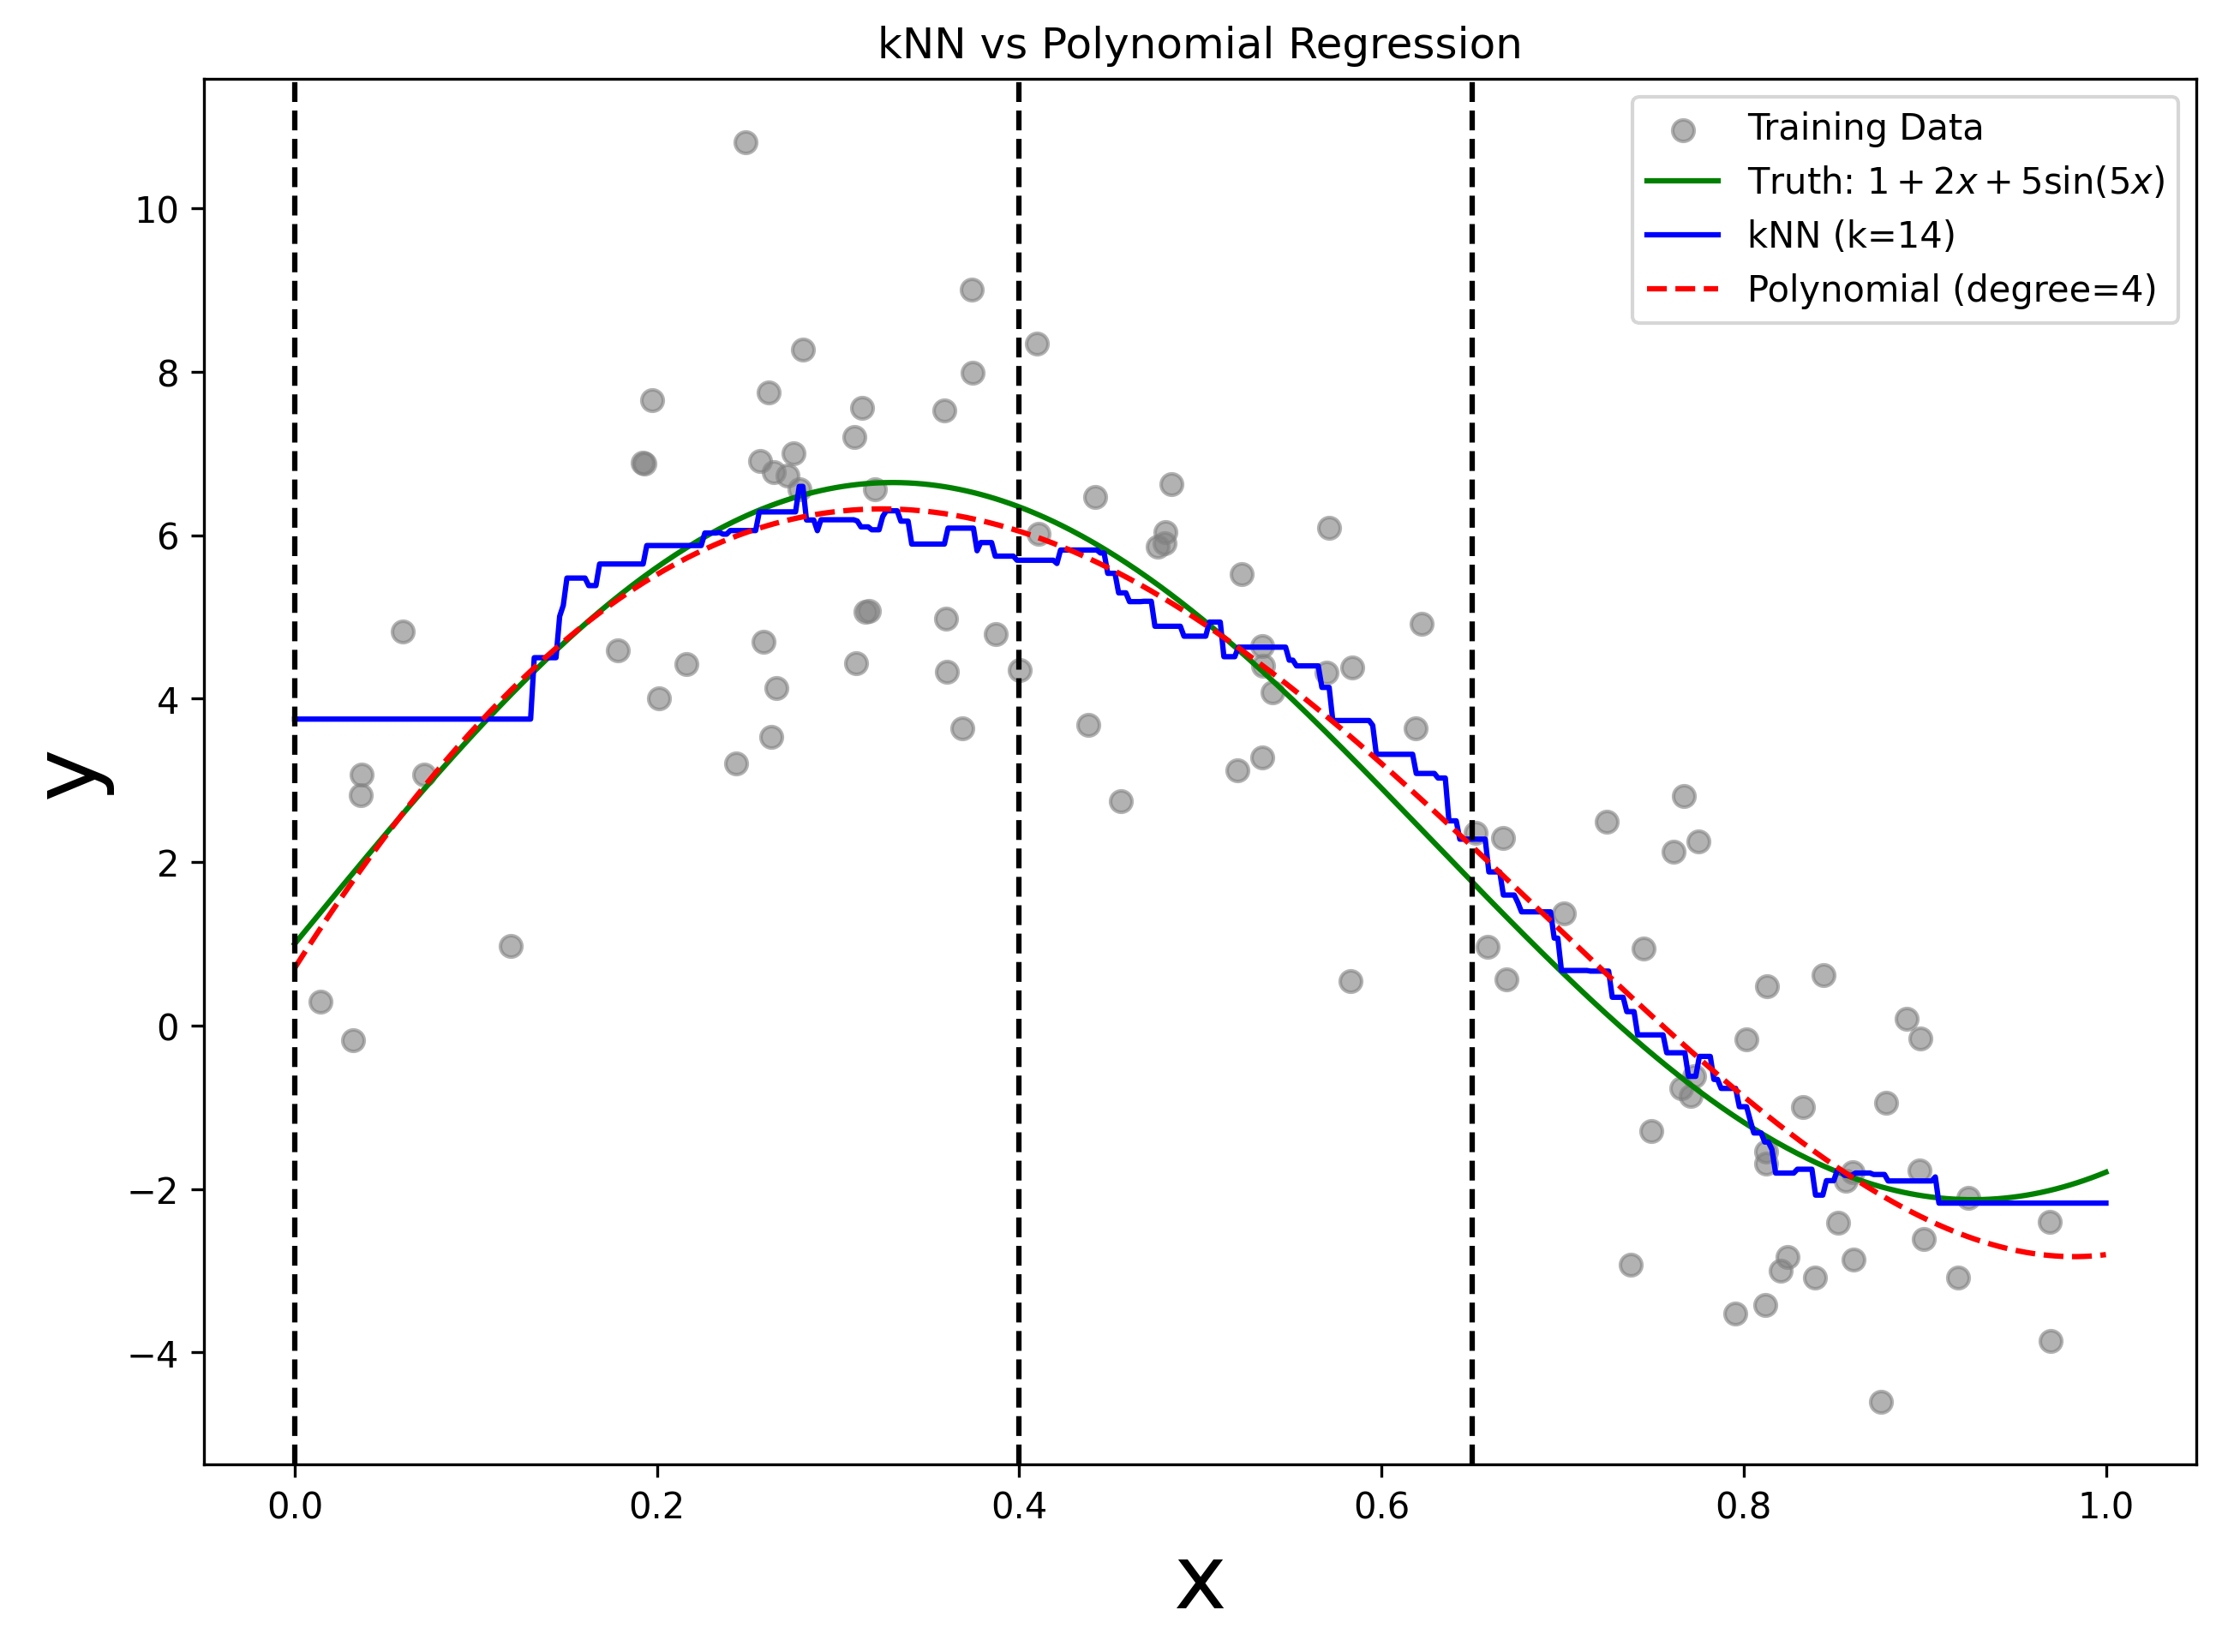

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Given functions to simulate data
def sim_x(n):
    return np.random.rand(n, 1)

def sim_y(x, sd):
    n = len(x)
    return 1 + 2*x.flatten() + 5*np.sin(5*x.flatten()) + np.random.normal(0, sd, n)

# Generating the training data
n_train = 100
x_train = sim_x(n_train)
y_train = sim_y(x_train, sd)

# kNN with k=14
knn = KNeighborsRegressor(n_neighbors=14)
knn.fit(x_train, y_train)

# Polynomial regression with degree=4
poly_features = PolynomialFeatures(degree=4)
x_train_poly = poly_features.fit_transform(x_train)
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

# Predictions
x_range = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred_knn = knn.predict(x_range)
x_range_poly = poly_features.transform(x_range)
y_pred_poly = poly_model.predict(x_range_poly)

# True values
true_y = 1 + 2*x_range + 5*np.sin(5*x_range)

# Plot
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, color='gray', alpha=0.6, label='Training Data')
plt.plot(x_range, true_y, color='green', label='Truth: $1 + 2x + 5\sin(5x)$')
plt.plot(x_range, y_pred_knn, color='blue', label='kNN (k=14)')
plt.plot(x_range, y_pred_poly, color='red', linestyle='dashed', label='Polynomial (degree=4)')
plt.axvline(x=0, color='black', linestyle='--')
plt.axvline(x=0.4, color='black', linestyle='--')
plt.axvline(x=0.65, color='black', linestyle='--')
plt.xlabel('x', size=25)
plt.ylabel('y', size=25)
plt.legend()
plt.title('kNN vs Polynomial Regression')
plt.show()

In [ ]:
import numpy as np

# Simulation functions
def sim_x(n):
    return np.random.rand(n)

def f(x):
    return 1 + 2*x + 5*np.sin(5*x)

def sim_y(x, sd):
    n = len(x)
    return f(x) + np.random.normal(0, sd, n)

# Simulation settings
n = 100  # number of observations
sd = 2  # standard deviation for error

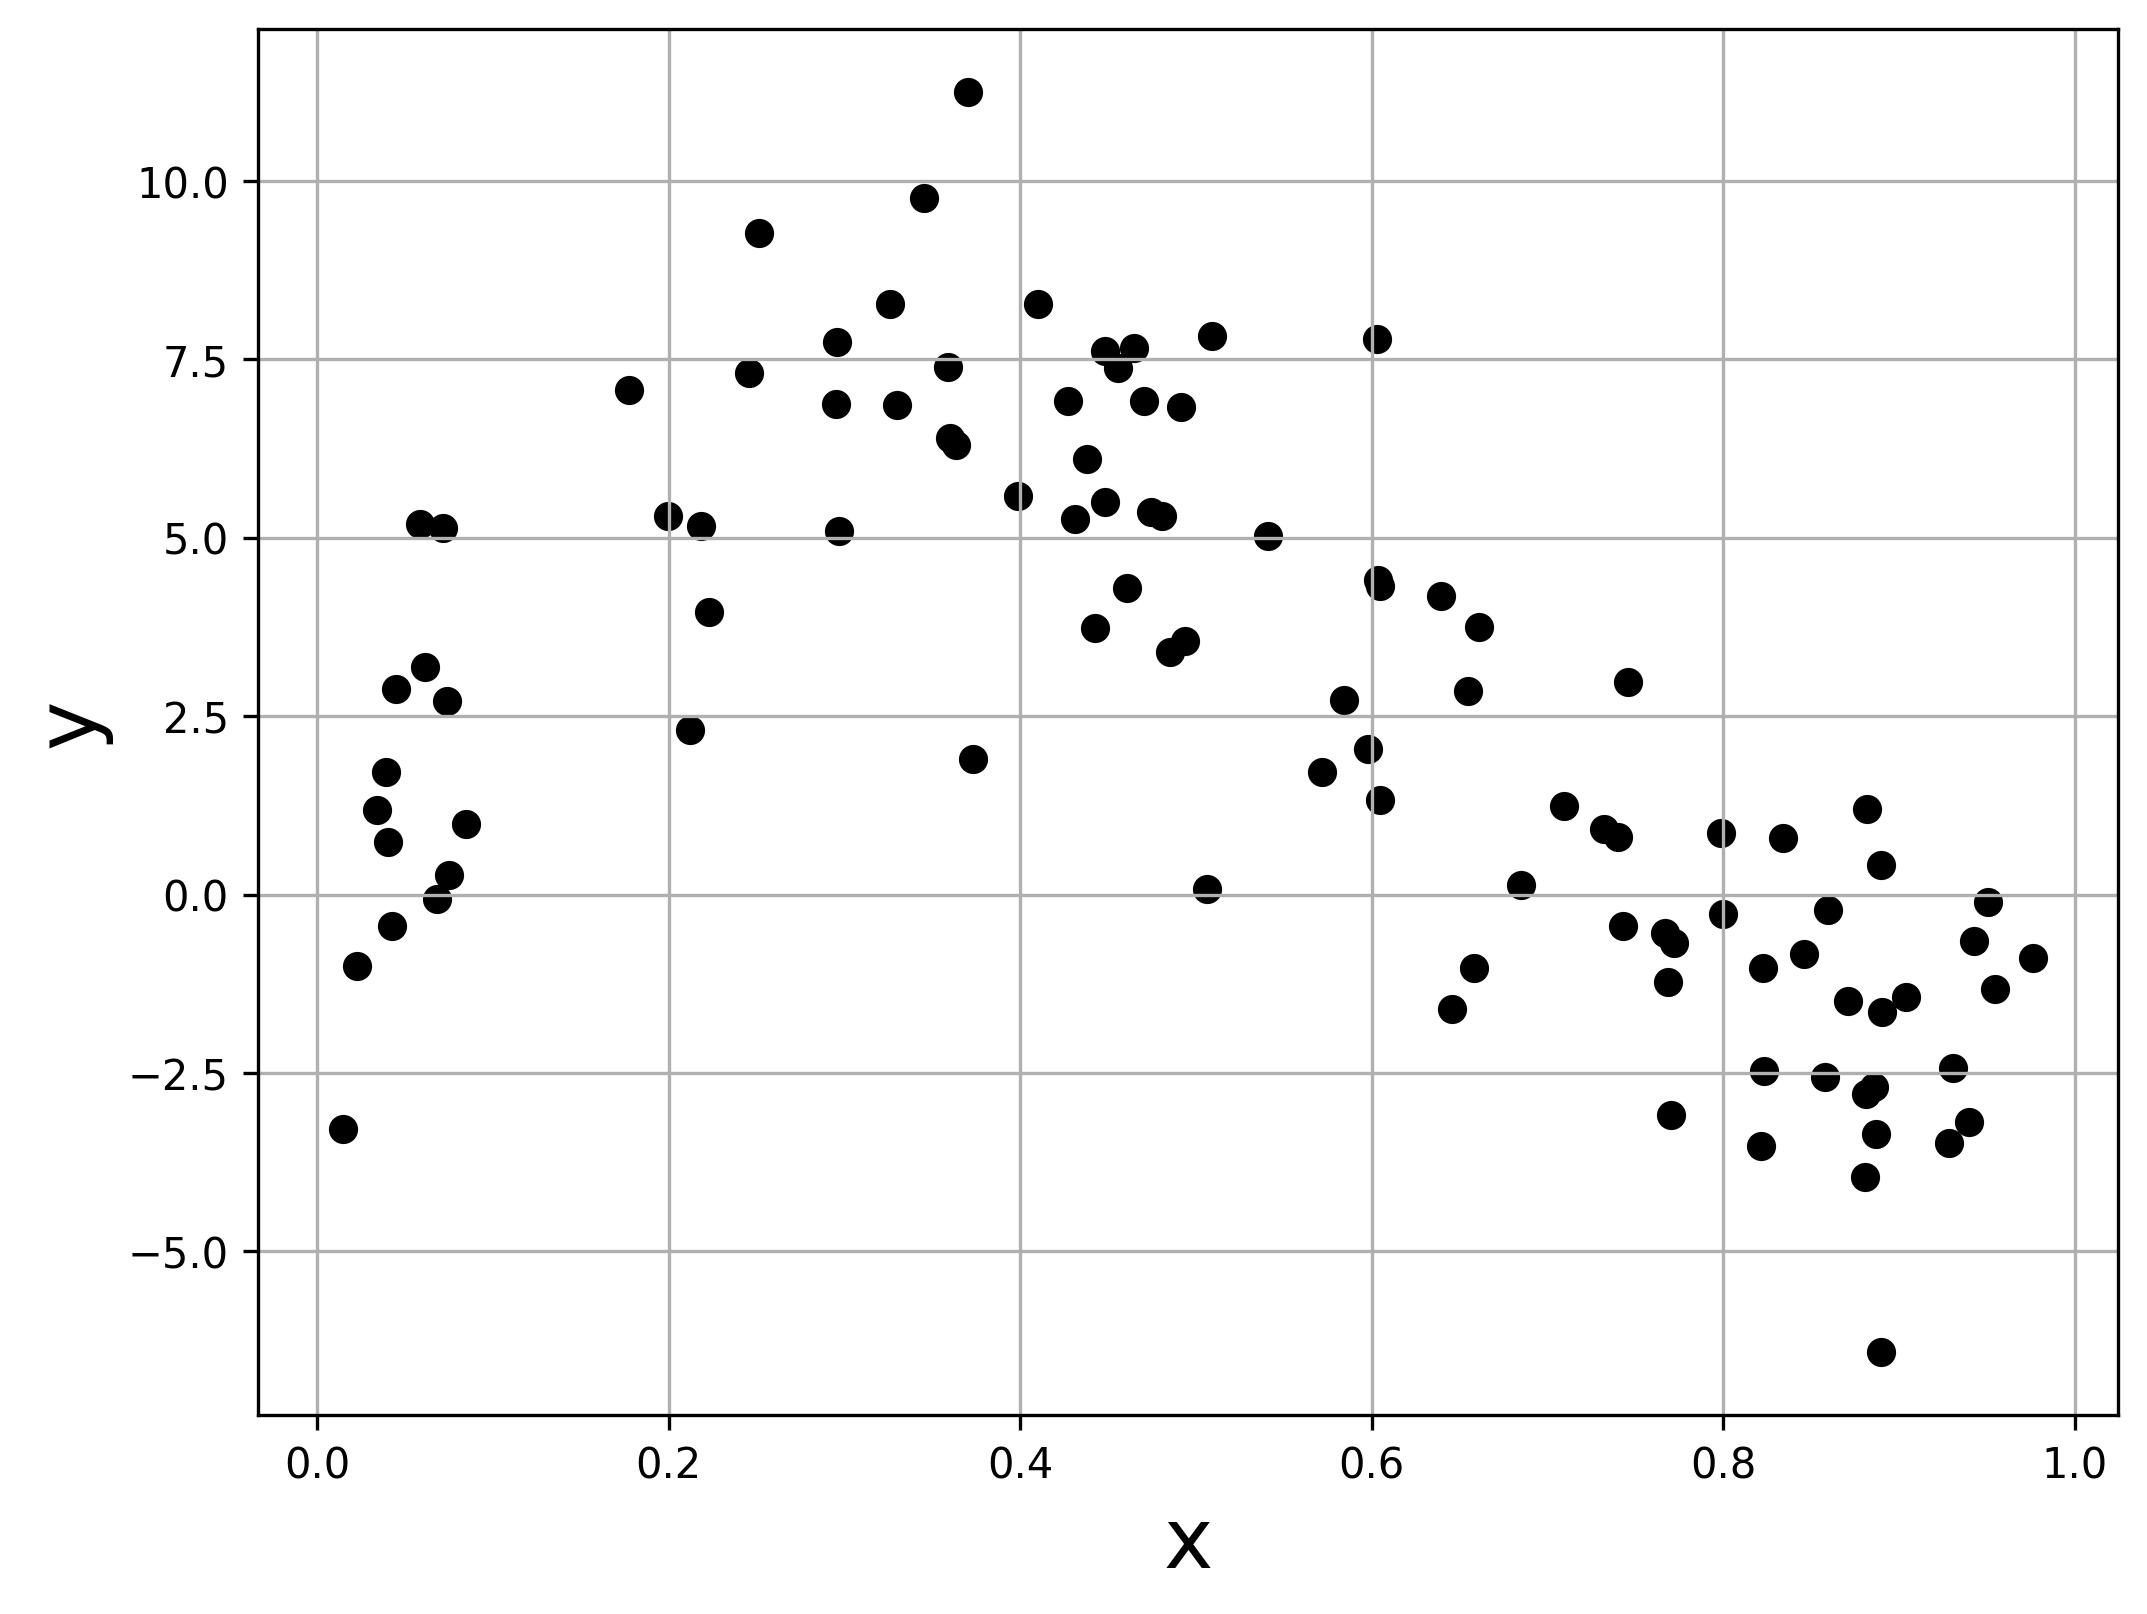

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
#-- Model Settings
n = 100
sd = 2
x = sim_x(n)
y = sim_y(x, sd)

#-- Plot the simulated x and y data
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,6) # define the fig's size in inch

# plot the data with black color
plt.scatter(x, y, color='black')

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

plt.grid()

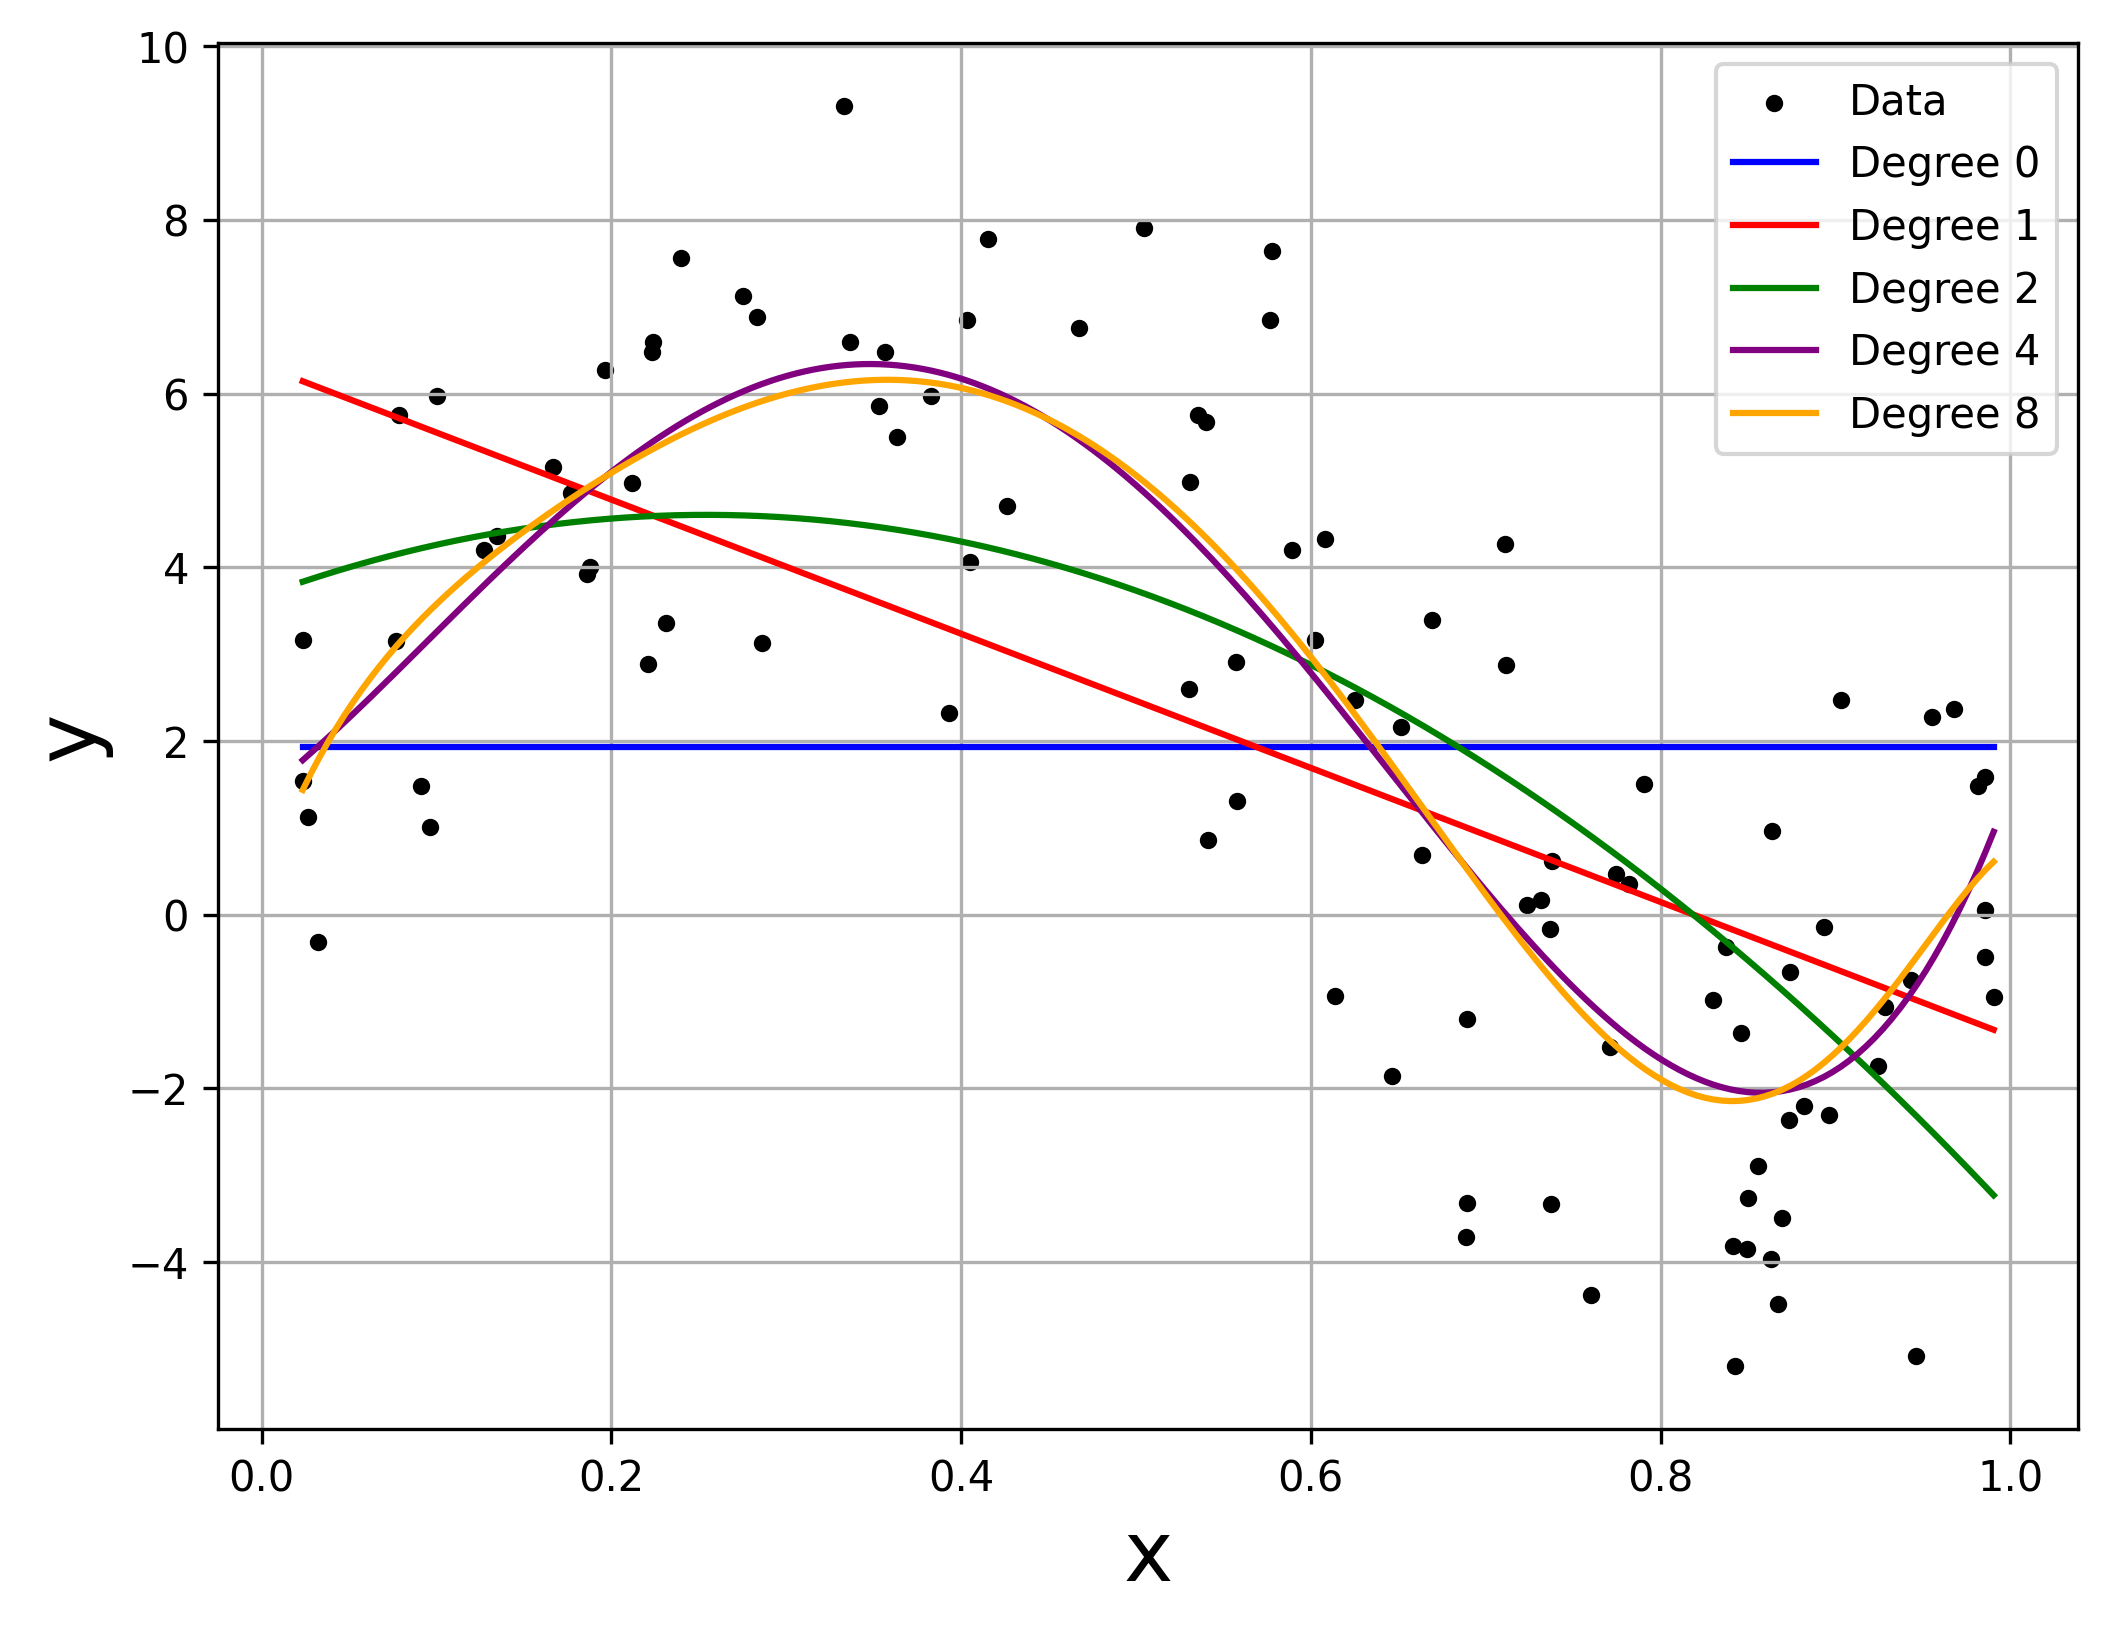

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = sim_x(n)
y = sim_y(x, sd)

x = x.flatten()
y = y.flatten()

# Define the xseq for plotting smooth curves
xseq = np.linspace(min(x), max(x), 200)

# High resolution setup
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Plot setup
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Scatter plot of the original data
plt.scatter(x, y, color='black', s=10, label='Data')

# Polynomial fits and plotting for various degrees
degrees = [0, 1, 2, 4, 8]
colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan']

for deg, color in zip(degrees, colors):
    z = np.polyfit(x, y, deg)
    p = np.poly1d(z)
    plt.plot(xseq, p(xseq), color=color, label=f'Degree {deg}')

# Labels, legend, and other plot adjustments
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
plt.grid()
plt.legend()
plt.show()


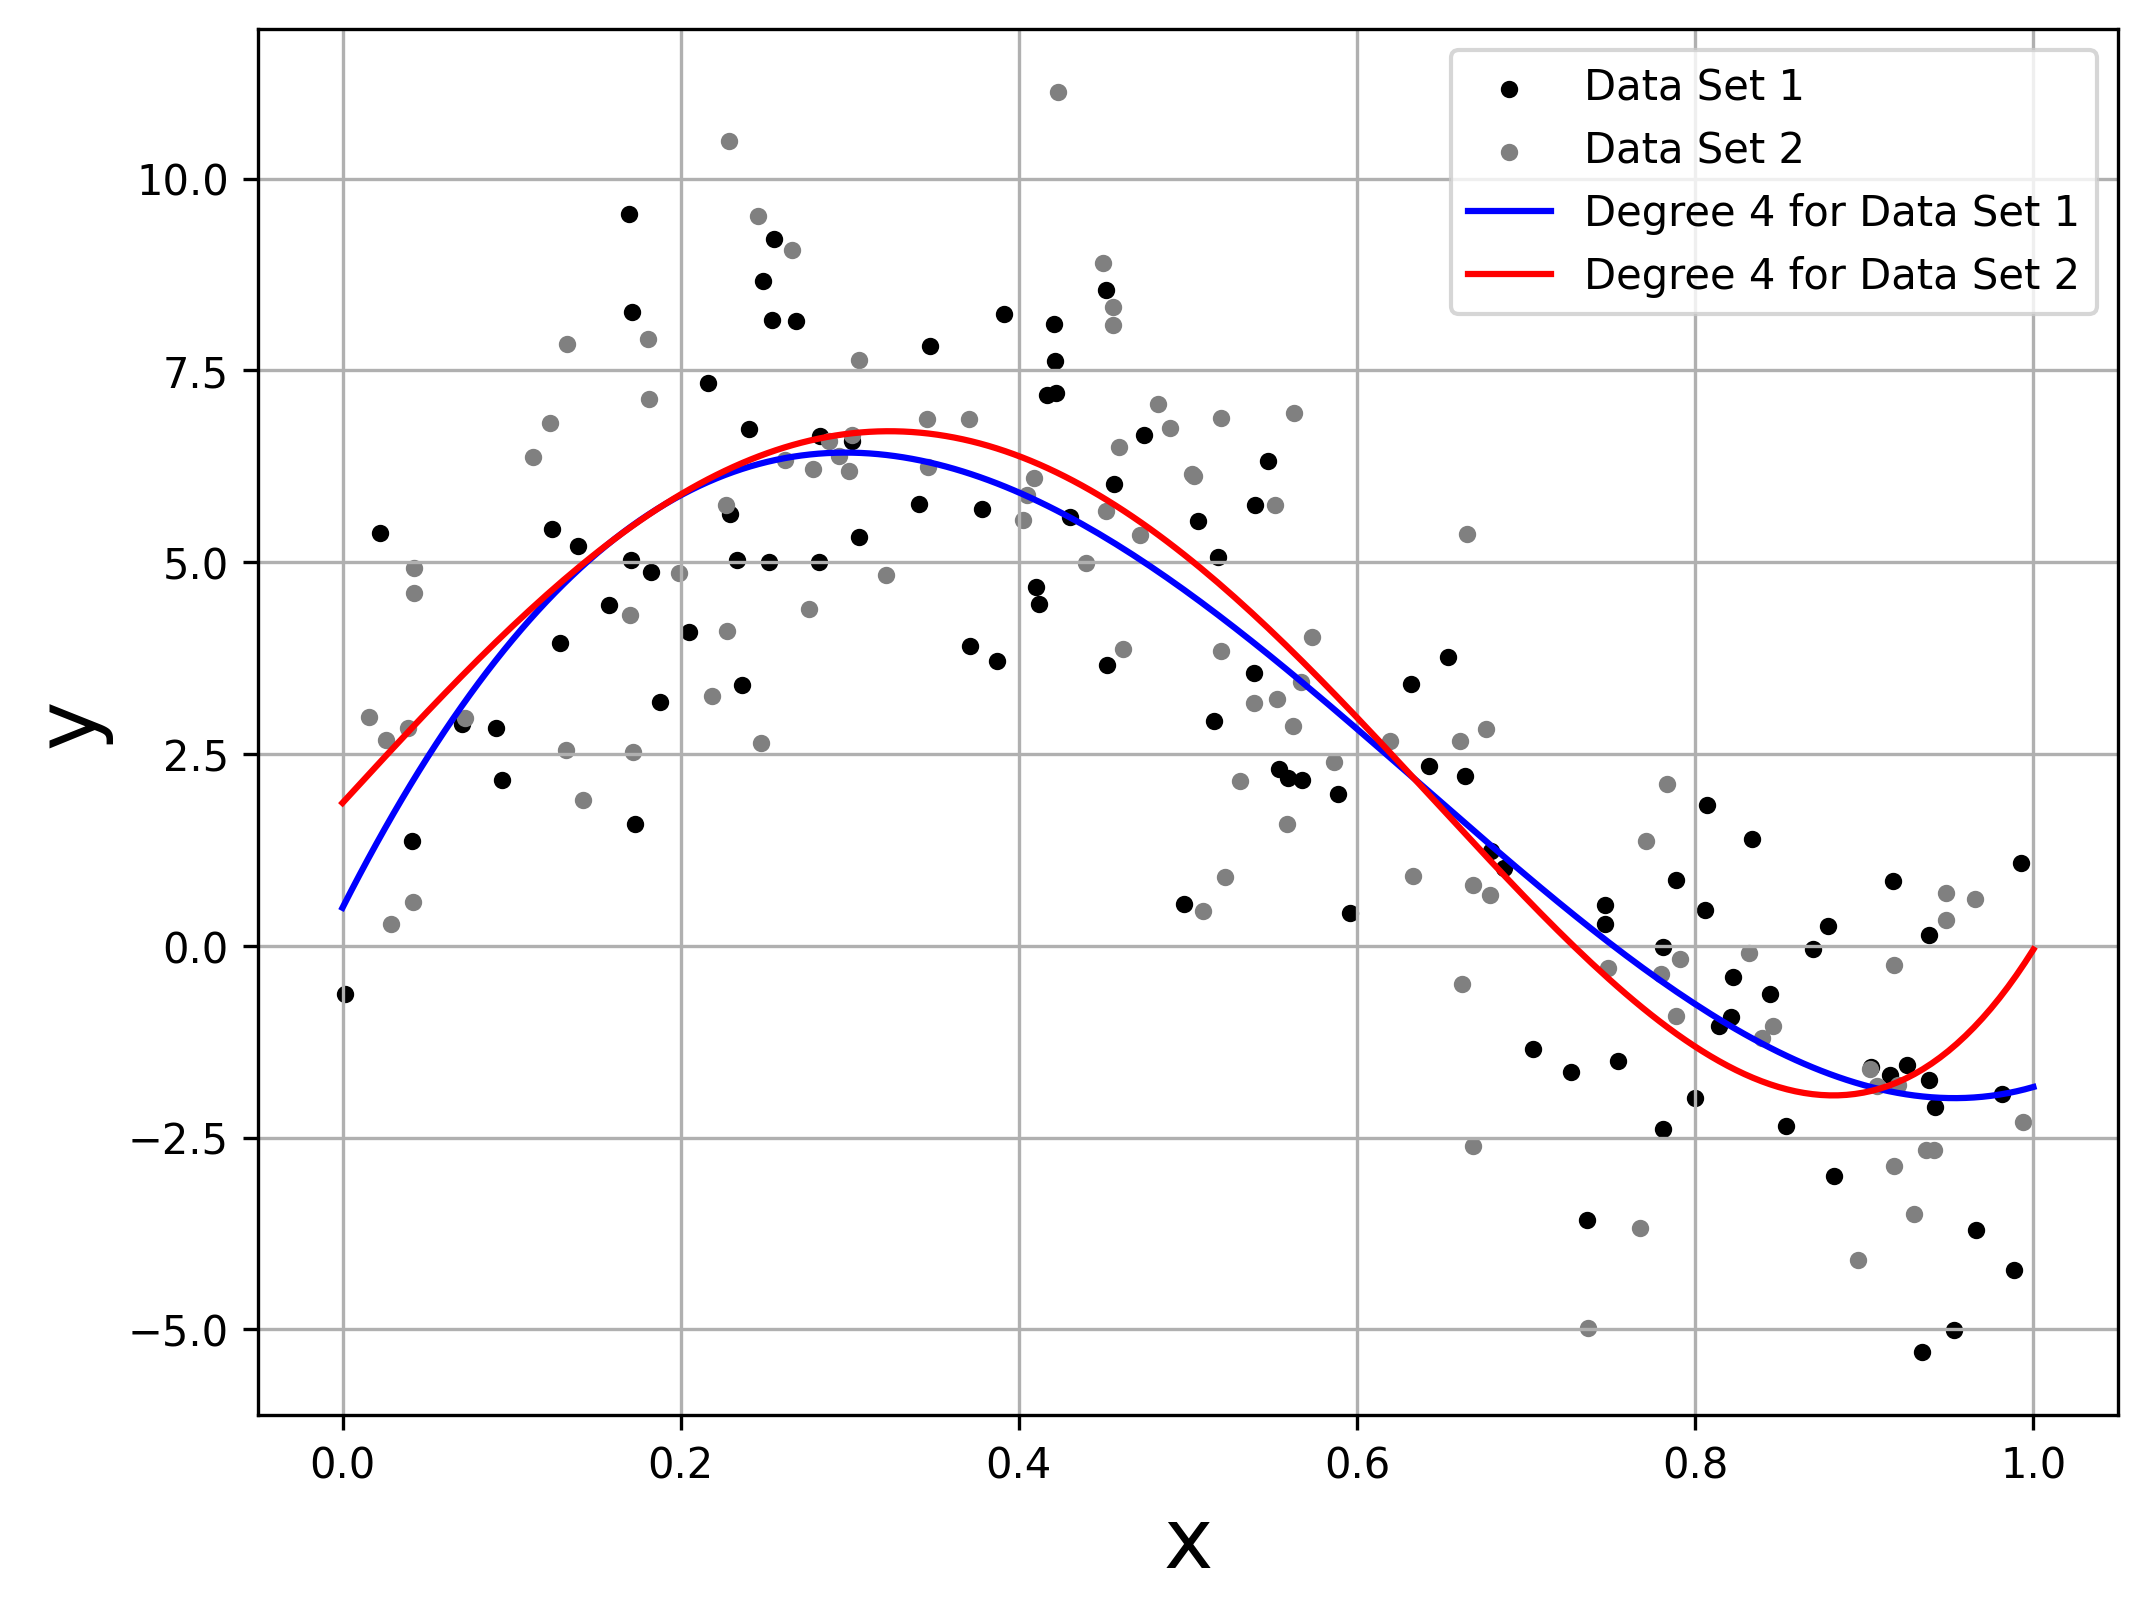

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sim_x(n):
    return np.random.rand(n)

def f(x):
    return 1 + 2*x + 5*np.sin(5*x)

def sim_y(x, sd=2):
    return f(x) + np.random.normal(0, sd, len(x))

n = 100
sd = 2

x1 = sim_x(n)
y1 = sim_y(x1, sd)
x2 = sim_x(n)
y2 = sim_y(x2, sd)

x1 = x1.flatten()
y1 = y1.flatten()

x2 = x2.flatten()
y2 = y2.flatten()

# Define the xseq for plotting smooth curves
xseq = np.linspace(0, 1, 200)

# High resolution setup
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Plot setup
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Scatter plot of the original data
plt.scatter(x1, y1, color='black', s=10, label='Data Set 1')
plt.scatter(x2, y2, color='gray', s=10, label='Data Set 2')

# Polynomial fit of degree 4 for both datasets
deg = 4
z1 = np.polyfit(x1, y1, deg)
p1 = np.poly1d(z1)
plt.plot(xseq, p1(xseq), color='blue', label=f'Degree {deg} for Data Set 1')

z2 = np.polyfit(x2, y2, deg)
p2 = np.poly1d(z2)
plt.plot(xseq, p2(xseq), color='red', label=f'Degree {deg} for Data Set 2')

# Labels, legend, and other plot adjustments
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
plt.grid()
plt.legend()
plt.show()


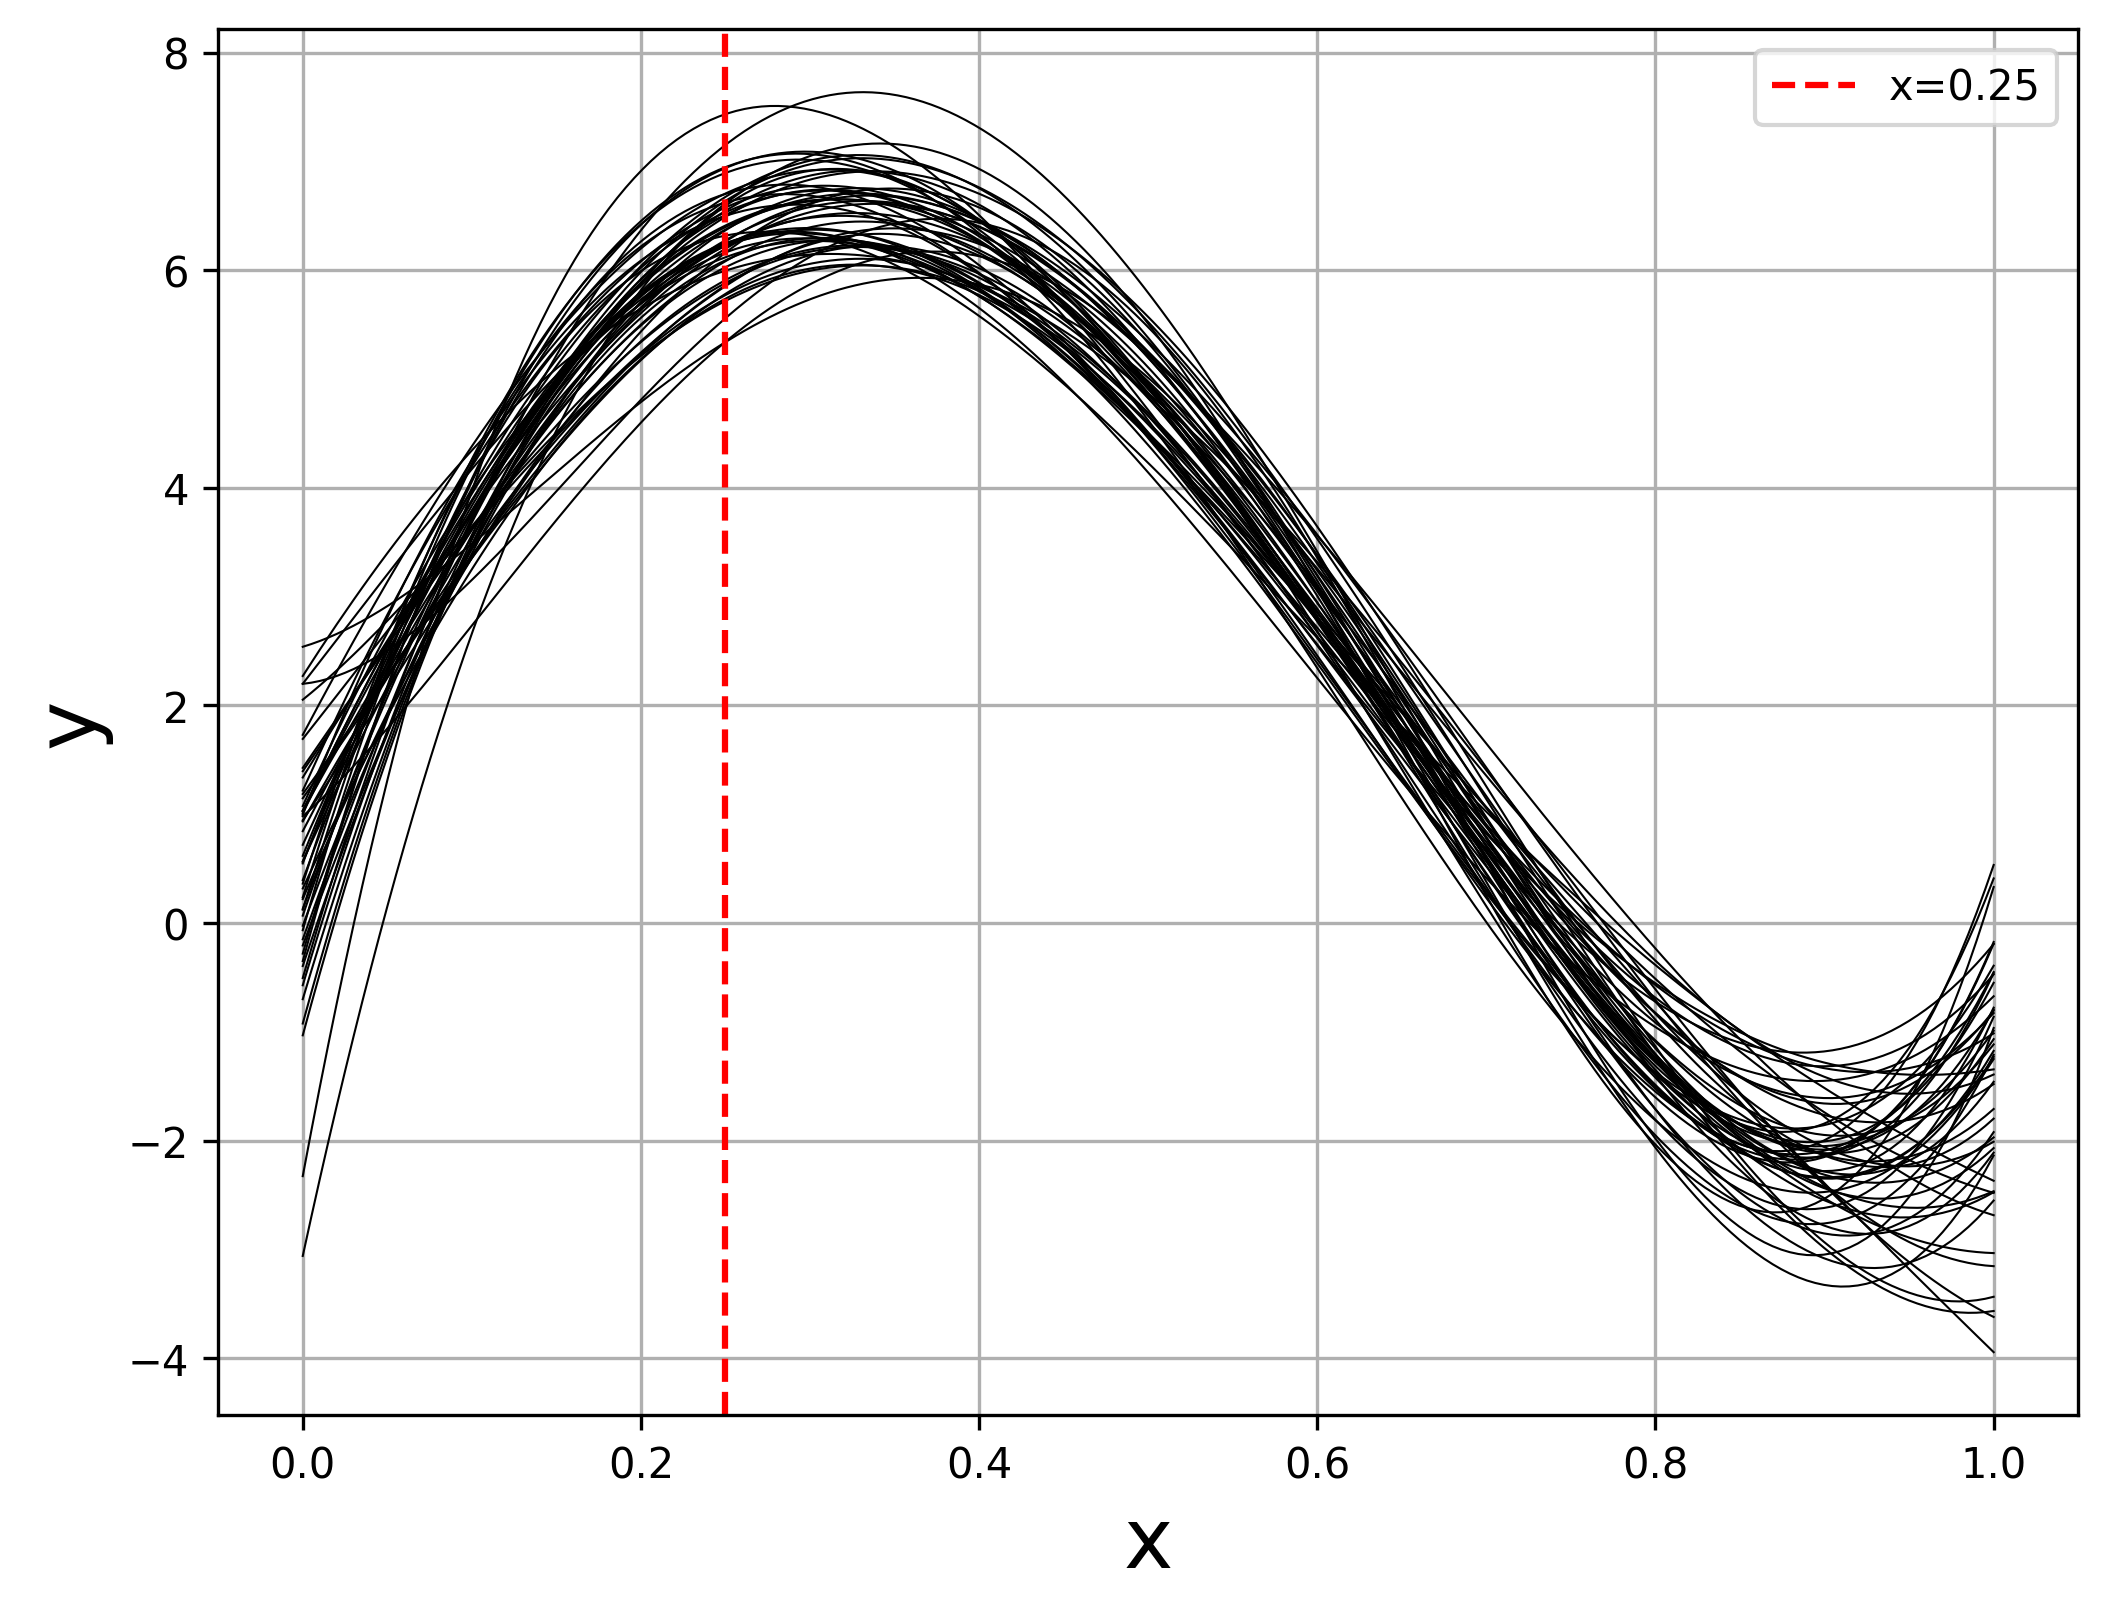

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sim_x(n):
    return np.random.rand(n)

def f(x):
    return 1 + 2*x + 5*np.sin(5*x)

def sim_y(x, sd=2):
    return f(x) + np.random.normal(0, sd, len(x))

n = 100
sd = 2

# Define the xseq for plotting smooth curves
xseq = np.linspace(0, 1, 200)

# High resolution setup
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Plot setup
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Compute and plot polynomial fits of degree 4 for 50 different datasets
deg = 4
for _ in range(50):
    x = sim_x(n)
    y = sim_y(x, sd)
    z = np.polyfit(x, y, deg)
    p = np.poly1d(z)
    plt.plot(xseq, p(xseq), color='black', linewidth=0.5)

# Add vertical line at x=0.25
plt.axvline(x=0.25, color='red', linestyle='--', label='x=0.25')

# Labels and other plot adjustments
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
plt.grid()
plt.legend()
plt.show()


<ipython-input-33-9abad717c3ef>:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(predictions_at_0_25, ax=axes[1], shade=True)


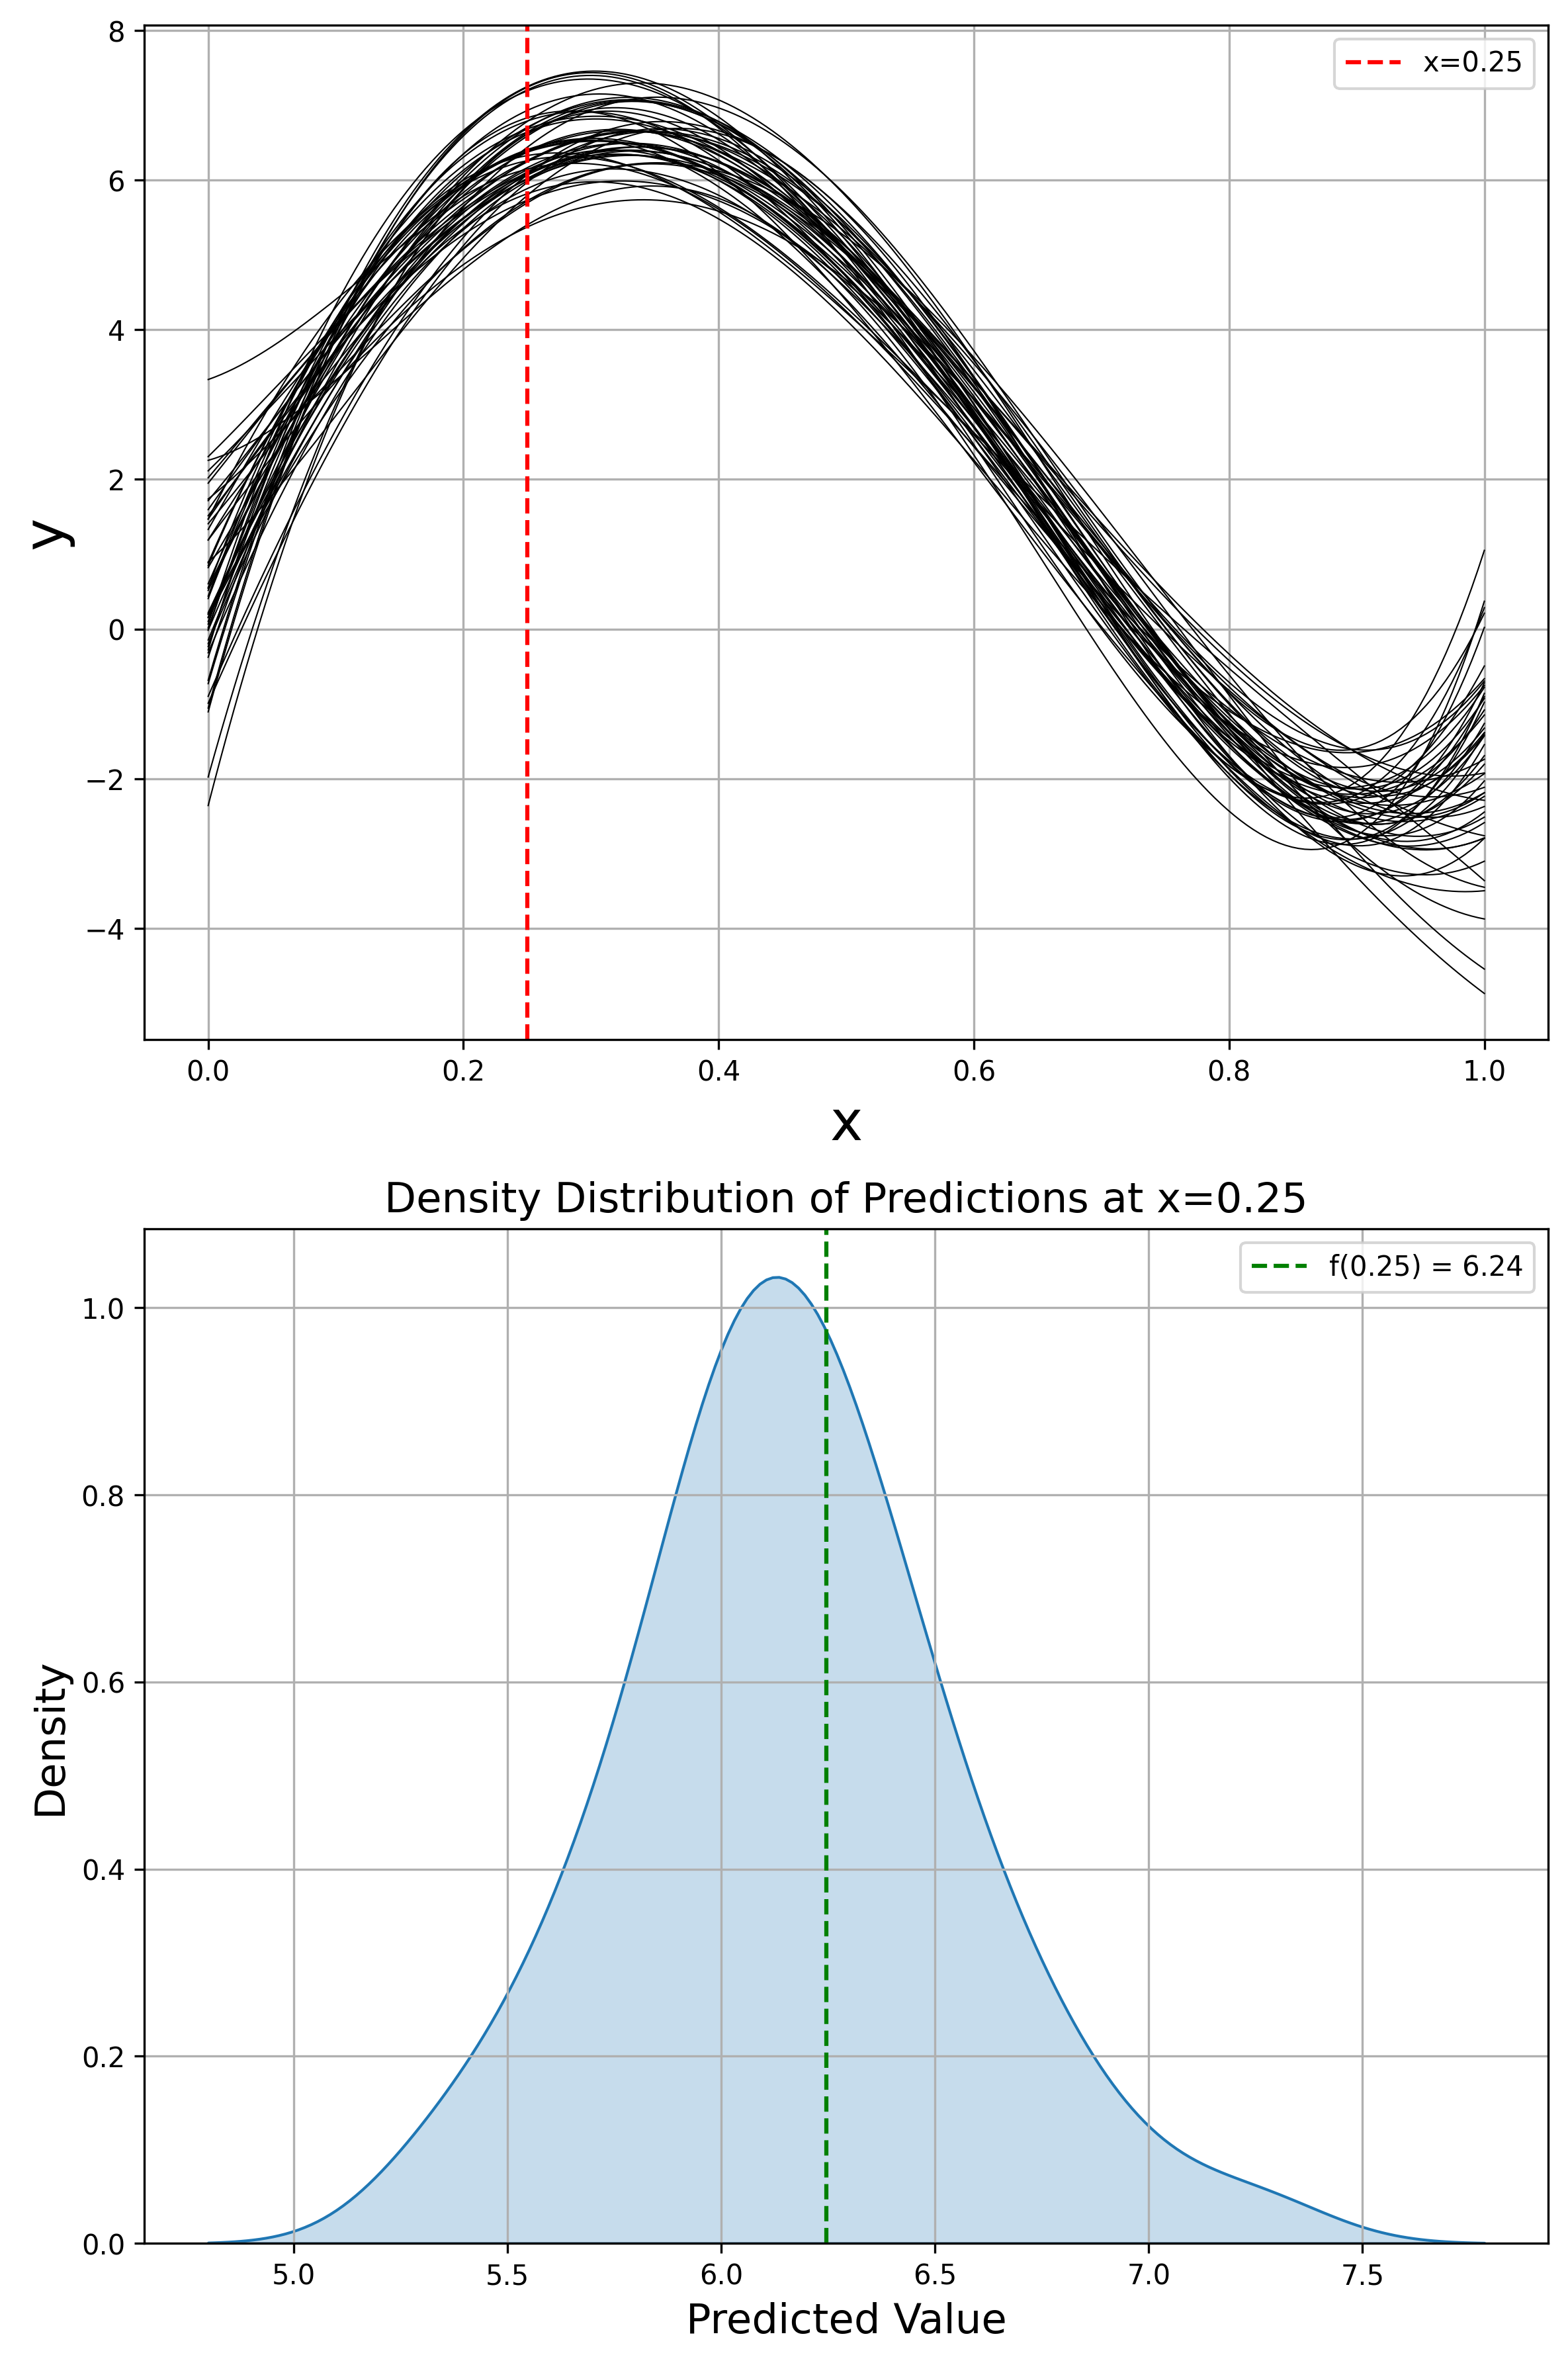

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def sim_x(n):
    return np.random.rand(n)

def f(x):
    return 1 + 2*x + 5*np.sin(5*x)

def sim_y(x, sd=2):
    return f(x) + np.random.normal(0, sd, len(x))

n = 100
sd = 2

# Define the xseq for plotting smooth curves
xseq = np.linspace(0, 1, 200)

# High resolution setup
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

predictions_at_0_25 = []

# Compute polynomial fits of degree 4 for 50 different datasets
deg = 4
for _ in range(50):
    x = sim_x(n)
    y = sim_y(x, sd)
    z = np.polyfit(x, y, deg)
    p = np.poly1d(z)
    predictions_at_0_25.append(p(0.25))

# Plot setup for polynomial fits
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

for _ in range(50):
    x = sim_x(n)
    y = sim_y(x, sd)
    z = np.polyfit(x, y, deg)
    p = np.poly1d(z)
    axes[0].plot(xseq, p(xseq), color='black', linewidth=0.5)

# Add vertical line at x=0.25 on the first plot
axes[0].axvline(x=0.25, color='red', linestyle='--', label='x=0.25')
axes[0].set_xlabel('x', size=20)
axes[0].set_ylabel('y', size=20)
axes[0].grid()
axes[0].legend()

# KDE plot for predictions at x=0.25 on the second plot
sns.kdeplot(predictions_at_0_25, ax=axes[1], shade=True)
true_value_at_0_25 = f(0.25)
axes[1].axvline(x=true_value_at_0_25, color='green', linestyle='--', label=f'f(0.25) = {true_value_at_0_25:.2f}')
axes[1].set_title("Density Distribution of Predictions at x=0.25", size=15)
axes[1].set_xlabel("Predicted Value", size=15)
axes[1].set_ylabel("Density", size=15)
axes[1].grid()
axes[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sim_x(n):
    return np.random.rand(n)

def f(x):
    return 1 + 2*x + 5*np.sin(5*x)

def sim_y(x, sd=2):
    return f(x) + np.random.normal(0, sd, len(x))

n_train = 100
n_test = 50000

# Define the xseq for plotting smooth curves
xseq = np.linspace(0, 1, 200)

# High resolution setup
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

degrees = [0, 1, 2, 4, 8, 10]
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

for ax, deg, color in zip(axes.ravel(), degrees, colors):
    # Plot the true function
    ax.plot(xseq, f(xseq), 'r-', label='True f(x)')

    # Compute polynomial fits for 100 different datasets
    for _ in range(100):
        x = sim_x(n_train)
        y = sim_y(x, sd)
        if deg > 0:
            z = np.polyfit(x, y, deg)
            p = np.poly1d(z)
            ax.plot(xseq, p(xseq), color=color, linewidth=0.5, alpha=0.1)
        else:
            # Mean model for degree 0
            mean_y = np.mean(y)
            ax.axhline(mean_y, color=color, linewidth=0.5, alpha=0.1)

    ax.set_title(f"Degree {deg} Polynomial")
    ax.set_xlabel('x', size=20)
    ax.set_ylabel('y', size=20)
    ax.set_ylim([-4, 8])  # Setting y-axis limits
    ax.grid()
    ax.legend()

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

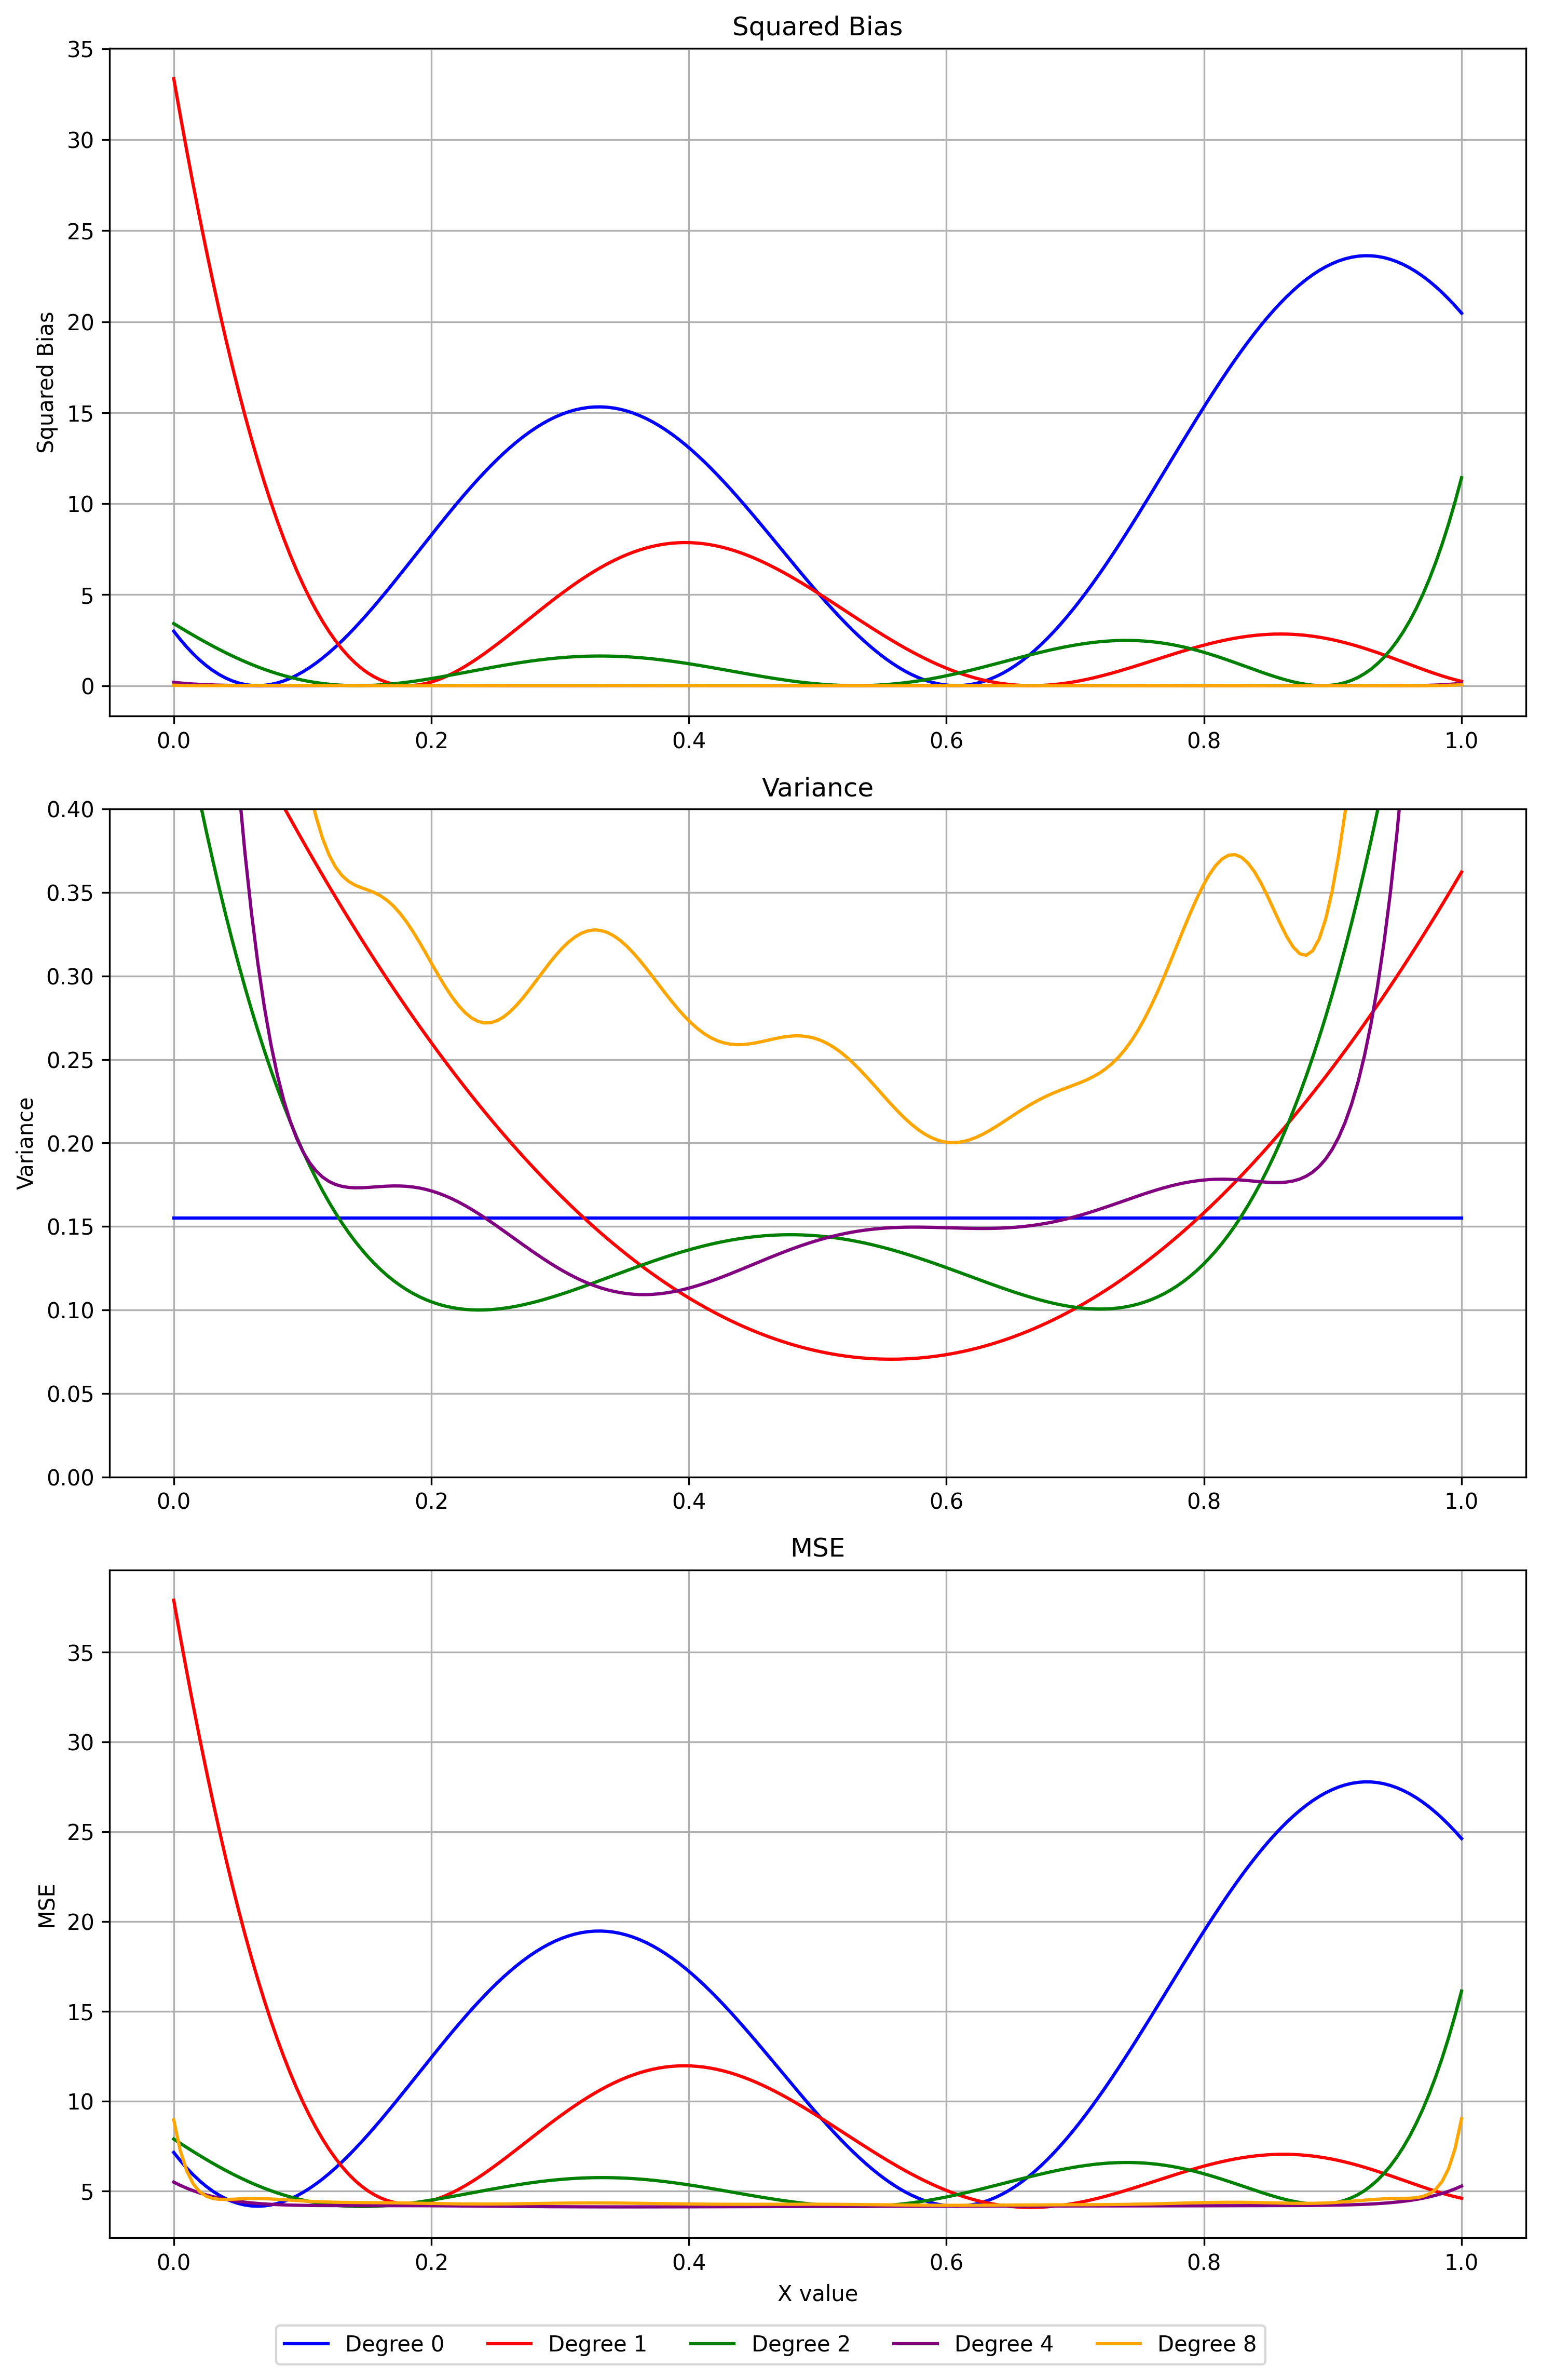

In [43]:
#... [previous code]

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Colors for various polynomial degrees
colors = ['blue', 'red', 'green', 'purple', 'orange']

# Plot squared bias
for i, deg in enumerate(degrees):
    axes[0].plot(xseq, bias_sq_curves[i], color=colors[i], label=f'Degree {deg}')
axes[0].set_title('Squared Bias')
axes[0].set_ylabel('Squared Bias')
axes[0].grid(True)

# Plot variance
for i, deg in enumerate(degrees):
    axes[1].plot(xseq, variance_curves[i], color=colors[i])
axes[1].set_title('Variance')
axes[1].set_ylabel('Variance')
axes[1].grid(True)
axes[1].set_ylim(0, 0.4)  # Set y-axis limits for Variance plot

# Plot MSE
for i, deg in enumerate(degrees):
    axes[2].plot(xseq, mse_curves[i], color=colors[i])
axes[2].set_title('MSE')
axes[2].set_xlabel('X value')
axes[2].set_ylabel('MSE')
axes[2].grid(True)

# Add a common legend below the subplots
handles, labels = axes[0].get_legend_handles_labels()  # get the handles and labels from any subplot
fig.legend(handles, labels, loc='lower center', ncol=len(degrees), bbox_to_anchor=(0.5, -0.02))

plt.tight_layout()
plt.show()

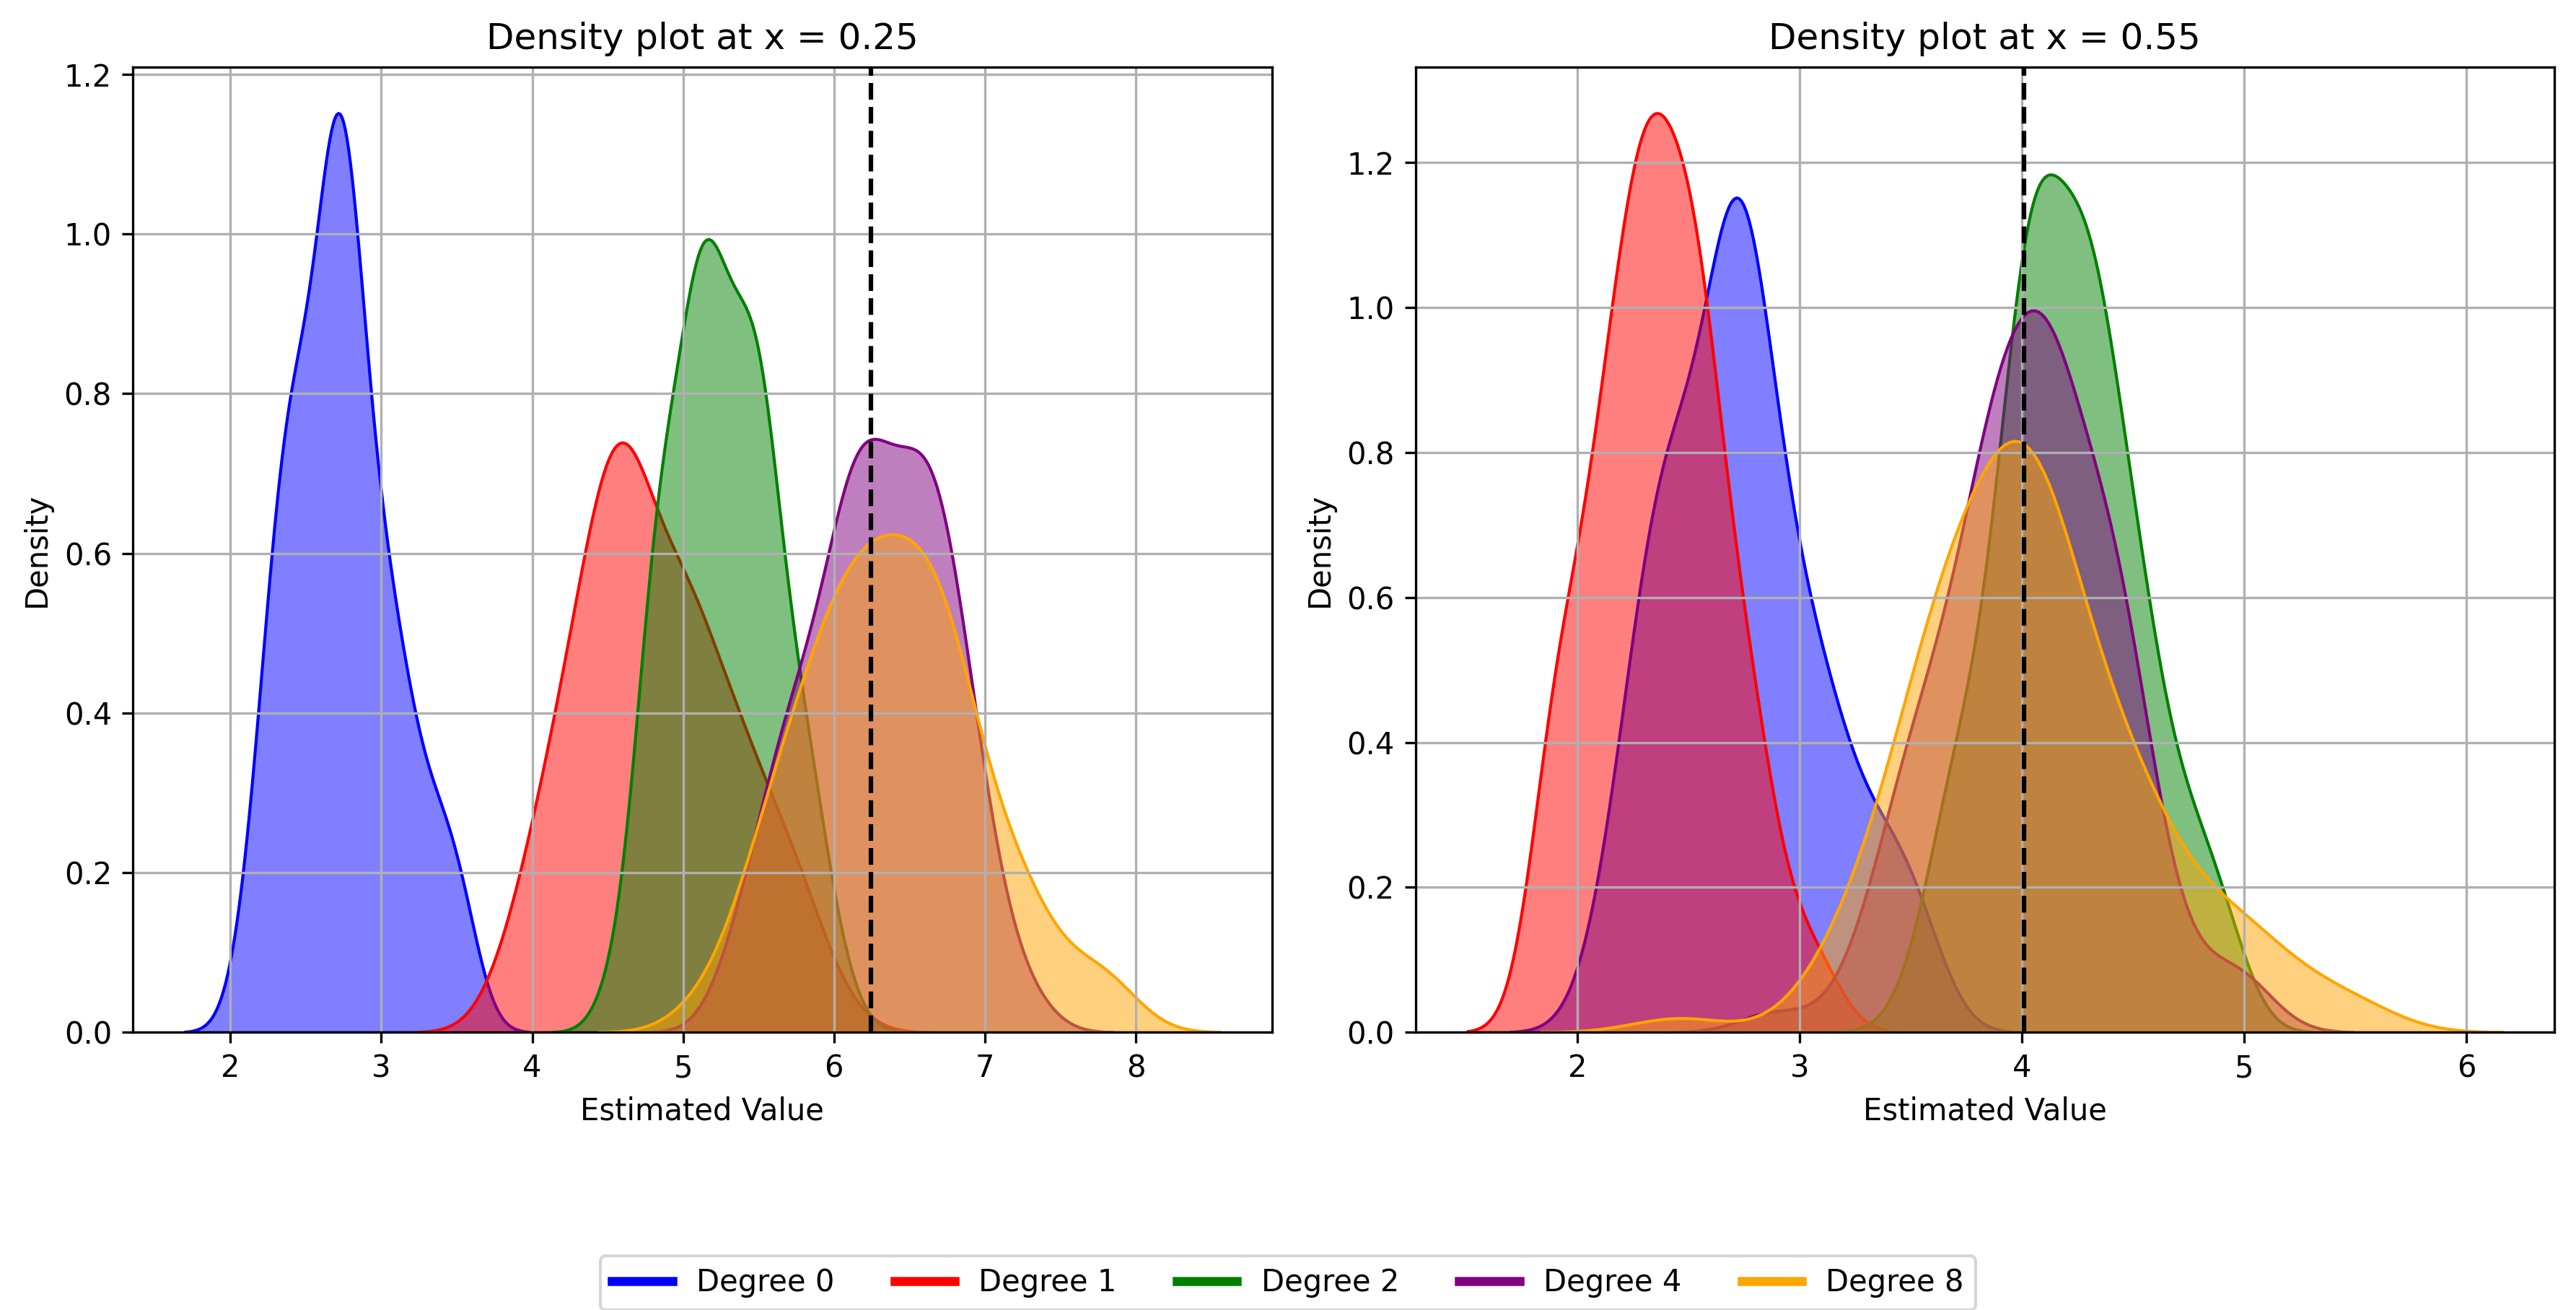

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def sim_x(n):
    return np.random.rand(n)

def f(x):
    return 1 + 2*x + 5*np.sin(5*x)

def sim_y(x, sd=2):
    return f(x) + np.random.normal(0, sd, len(x))

n = 100
sd = 2
n_datasets = 100

degrees = [0, 1, 2, 4, 8]
colors = ['blue', 'red', 'green', 'purple', 'orange']

# To store estimated values for each degree at x = 0.25 and x = 0.55
estimates_0_25 = {deg: [] for deg in degrees}
estimates_0_55 = {deg: [] for deg in degrees}

# For each dataset, fit polynomial of various degrees and store the estimates
for _ in range(n_datasets):
    x = sim_x(n)
    y = sim_y(x, sd)

    for deg in degrees:
        p = np.poly1d(np.polyfit(x, y, deg))
        estimates_0_25[deg].append(p(0.25))
        estimates_0_55[deg].append(p(0.55))

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# For x = 0.25
for i, deg in enumerate(degrees):
    sns.kdeplot(estimates_0_25[deg], ax=axes[0], color=colors[i], fill=True, alpha=0.5)
axes[0].axvline(x=f(0.25), color='black', linestyle='--')
axes[0].set_title('Density plot at x = 0.25')
axes[0].set_xlabel('Estimated Value')
axes[0].set_ylabel('Density')
axes[0].grid(True)

# For x = 0.55
for i, deg in enumerate(degrees):
    sns.kdeplot(estimates_0_55[deg], ax=axes[1], color=colors[i], fill=True, alpha=0.5)
axes[1].axvline(x=f(0.55), color='black', linestyle='--')
axes[1].set_title('Density plot at x = 0.55')
axes[1].set_xlabel('Estimated Value')
axes[1].set_ylabel('Density')
axes[1].grid(True)

# Common legend at the bottom
lines = [plt.Line2D([0], [0], color=colors[i], linewidth=3, linestyle='-') for i in range(len(degrees))]
fig.legend(lines, ['Degree ' + str(deg) for deg in degrees], loc='lower center', ncol=len(degrees), borderaxespad=0.)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

In [49]:
import numpy as np
import pandas as pd

def sim_x(n):
    return np.random.rand(n)

def f(x):
    return 1 + 2*x + 5*np.sin(5*x)

def sim_y(x, sd=2):
    return f(x) + np.random.normal(0, sd, len(x))

n = 100
sd = 2
n_datasets = 100
xseq = np.linspace(0, 1, 200)
degrees = [0, 1, 2, 4, 8]

# To store bias^2, variance and MSE for each degree
bias_sq_values = []
var_values = []
mse_values = []

for deg in degrees:
    bias_sq_at_x = []
    var_at_x = []
    mse_at_x = []

    # Predictions storage
    all_preds = []

    for _ in range(n_datasets):
        x = sim_x(n)
        y = sim_y(x, sd)
        p = np.poly1d(np.polyfit(x, y, deg))
        predictions = p(xseq)
        all_preds.append(predictions)

    for preds in zip(*all_preds):
        avg_pred = np.mean(preds)
        bias_sq = (avg_pred - f(xseq))**2
        variance = np.var(preds)
        mse = np.mean([(y - f(xseq))**2 for y in preds])

        bias_sq_at_x.append(bias_sq)
        var_at_x.append(variance)
        mse_at_x.append(mse)

    # Average over xseq
    bias_sq_values.append(np.mean(bias_sq_at_x))
    var_values.append(np.mean(var_at_x))
    mse_values.append(np.mean(mse_at_x))

# Convert to DataFrame
df = pd.DataFrame({
    'Degree': degrees,
    'Bias^2': bias_sq_values,
    'Variance': var_values,
    'MSE': mse_values
})

df

Degree     Bias^2  Variance        MSE
0       0   9.676510  0.128939   9.805449
1       1  14.922165  0.183747  15.105912
2       2  18.276115  0.176693  18.452807
3       4  19.350275  0.220068  19.570343
4       8  19.394963  0.457566  19.852529

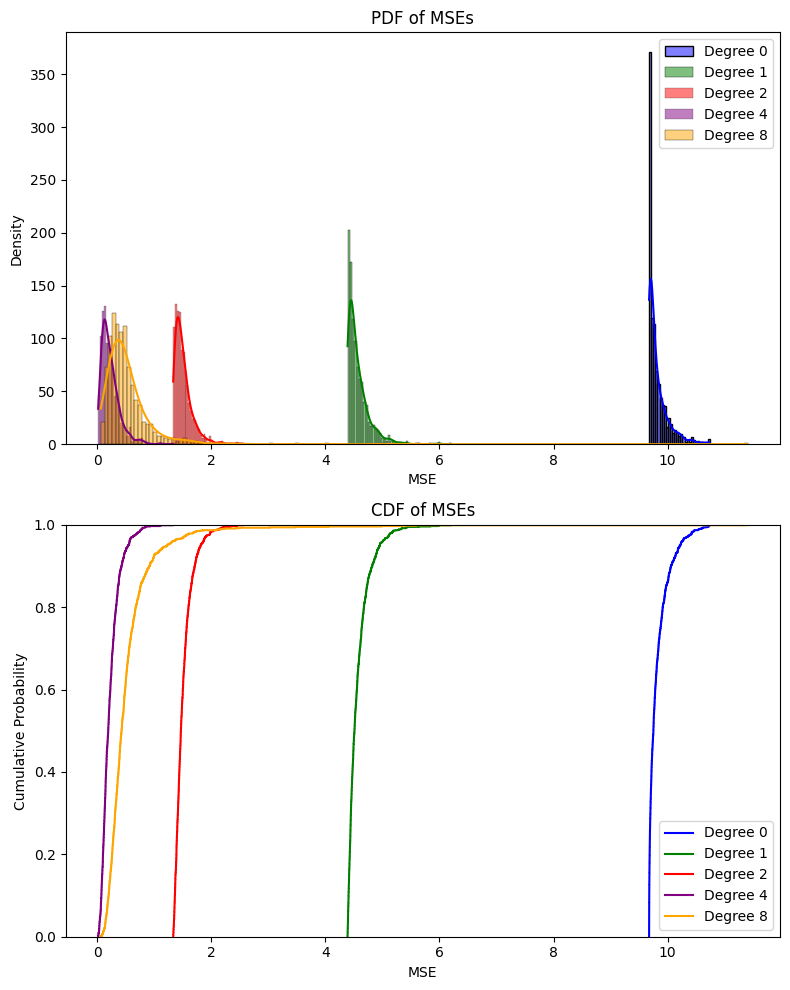

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def sim_x(n):
    return np.random.rand(n)

def f(x):
    return 1 + 2*x + 5*np.sin(5*x)

def sim_y(x, sd=2):
    return f(x) + np.random.normal(0, sd, len(x))

n = 100
sd = 2
n_datasets = 1000
xseq = np.linspace(0, 1, 200)
degrees = [0, 1, 2, 4, 8]

# Store MSEs for each degree
mse_storage = {deg: [] for deg in degrees}

for deg in degrees:
    for _ in range(n_datasets):
        x = sim_x(n)
        y = sim_y(x, sd)
        p = np.poly1d(np.polyfit(x, y, deg))
        predictions = p(xseq)
        mse = np.mean((predictions - f(xseq))**2)
        mse_storage[deg].append(mse)

# Plotting PDF and CDF
fig, ax = plt.subplots(2, 1, figsize=(8, 10), dpi=100)
colors = ['blue', 'green', 'red', 'purple', 'orange']

for idx, deg in enumerate(degrees):
    sns.histplot(mse_storage[deg], ax=ax[0], color=colors[idx], kde=True, label=f"Degree {deg}")
    sns.ecdfplot(mse_storage[deg], ax=ax[1], color=colors[idx], label=f"Degree {deg}")

ax[0].set_title('PDF of MSEs')
ax[0].set_xlabel('MSE')
ax[0].set_ylabel('Density')
ax[0].legend()

ax[1].set_title('CDF of MSEs')
ax[1].set_xlabel('MSE')
ax[1].set_ylabel('Cumulative Probability')
ax[1].legend()

plt.tight_layout()
plt.show()


In [55]:
import numpy as np
import pandas as pd

def sim_x(n):
    return np.random.rand(n)

def f(x):
    return 1 + 2*x + 5*np.sin(5*x)

def sim_y(x, sd=2):
    return f(x) + np.random.normal(0, sd, len(x))

n = 100
sd = 2
n_datasets = 1000
xseq = np.linspace(0, 1, 200)
degrees = list(range(11))

# Keep track of the degree with the best MSE for each simulation
best_degrees = []

for _ in range(n_datasets):
    x = sim_x(n)
    y = sim_y(x, sd)
    current_mses = []

    for deg in degrees:
        p = np.poly1d(np.polyfit(x, y, deg))
        predictions = p(xseq)
        mse = np.mean((predictions - f(xseq))**2)
        current_mses.append(mse)

    # Find the degree that resulted in the lowest MSE for this simulation
    best_degrees.append(degrees[np.argmin(current_mses)])

# Count the number of times each degree was the best
best_counts = [best_degrees.count(deg) for deg in degrees]

# Create a DataFrame for the results
df = pd.DataFrame({
    'Degree': degrees,
    'n': best_counts
})

# Display the DataFrame
df


Degree    n
0        0    0
1        1    0
2        2    0
3        3  181
4        4  514
5        5  235
6        6   51
7        7   13
8        8    3
9        9    0
10      10    3

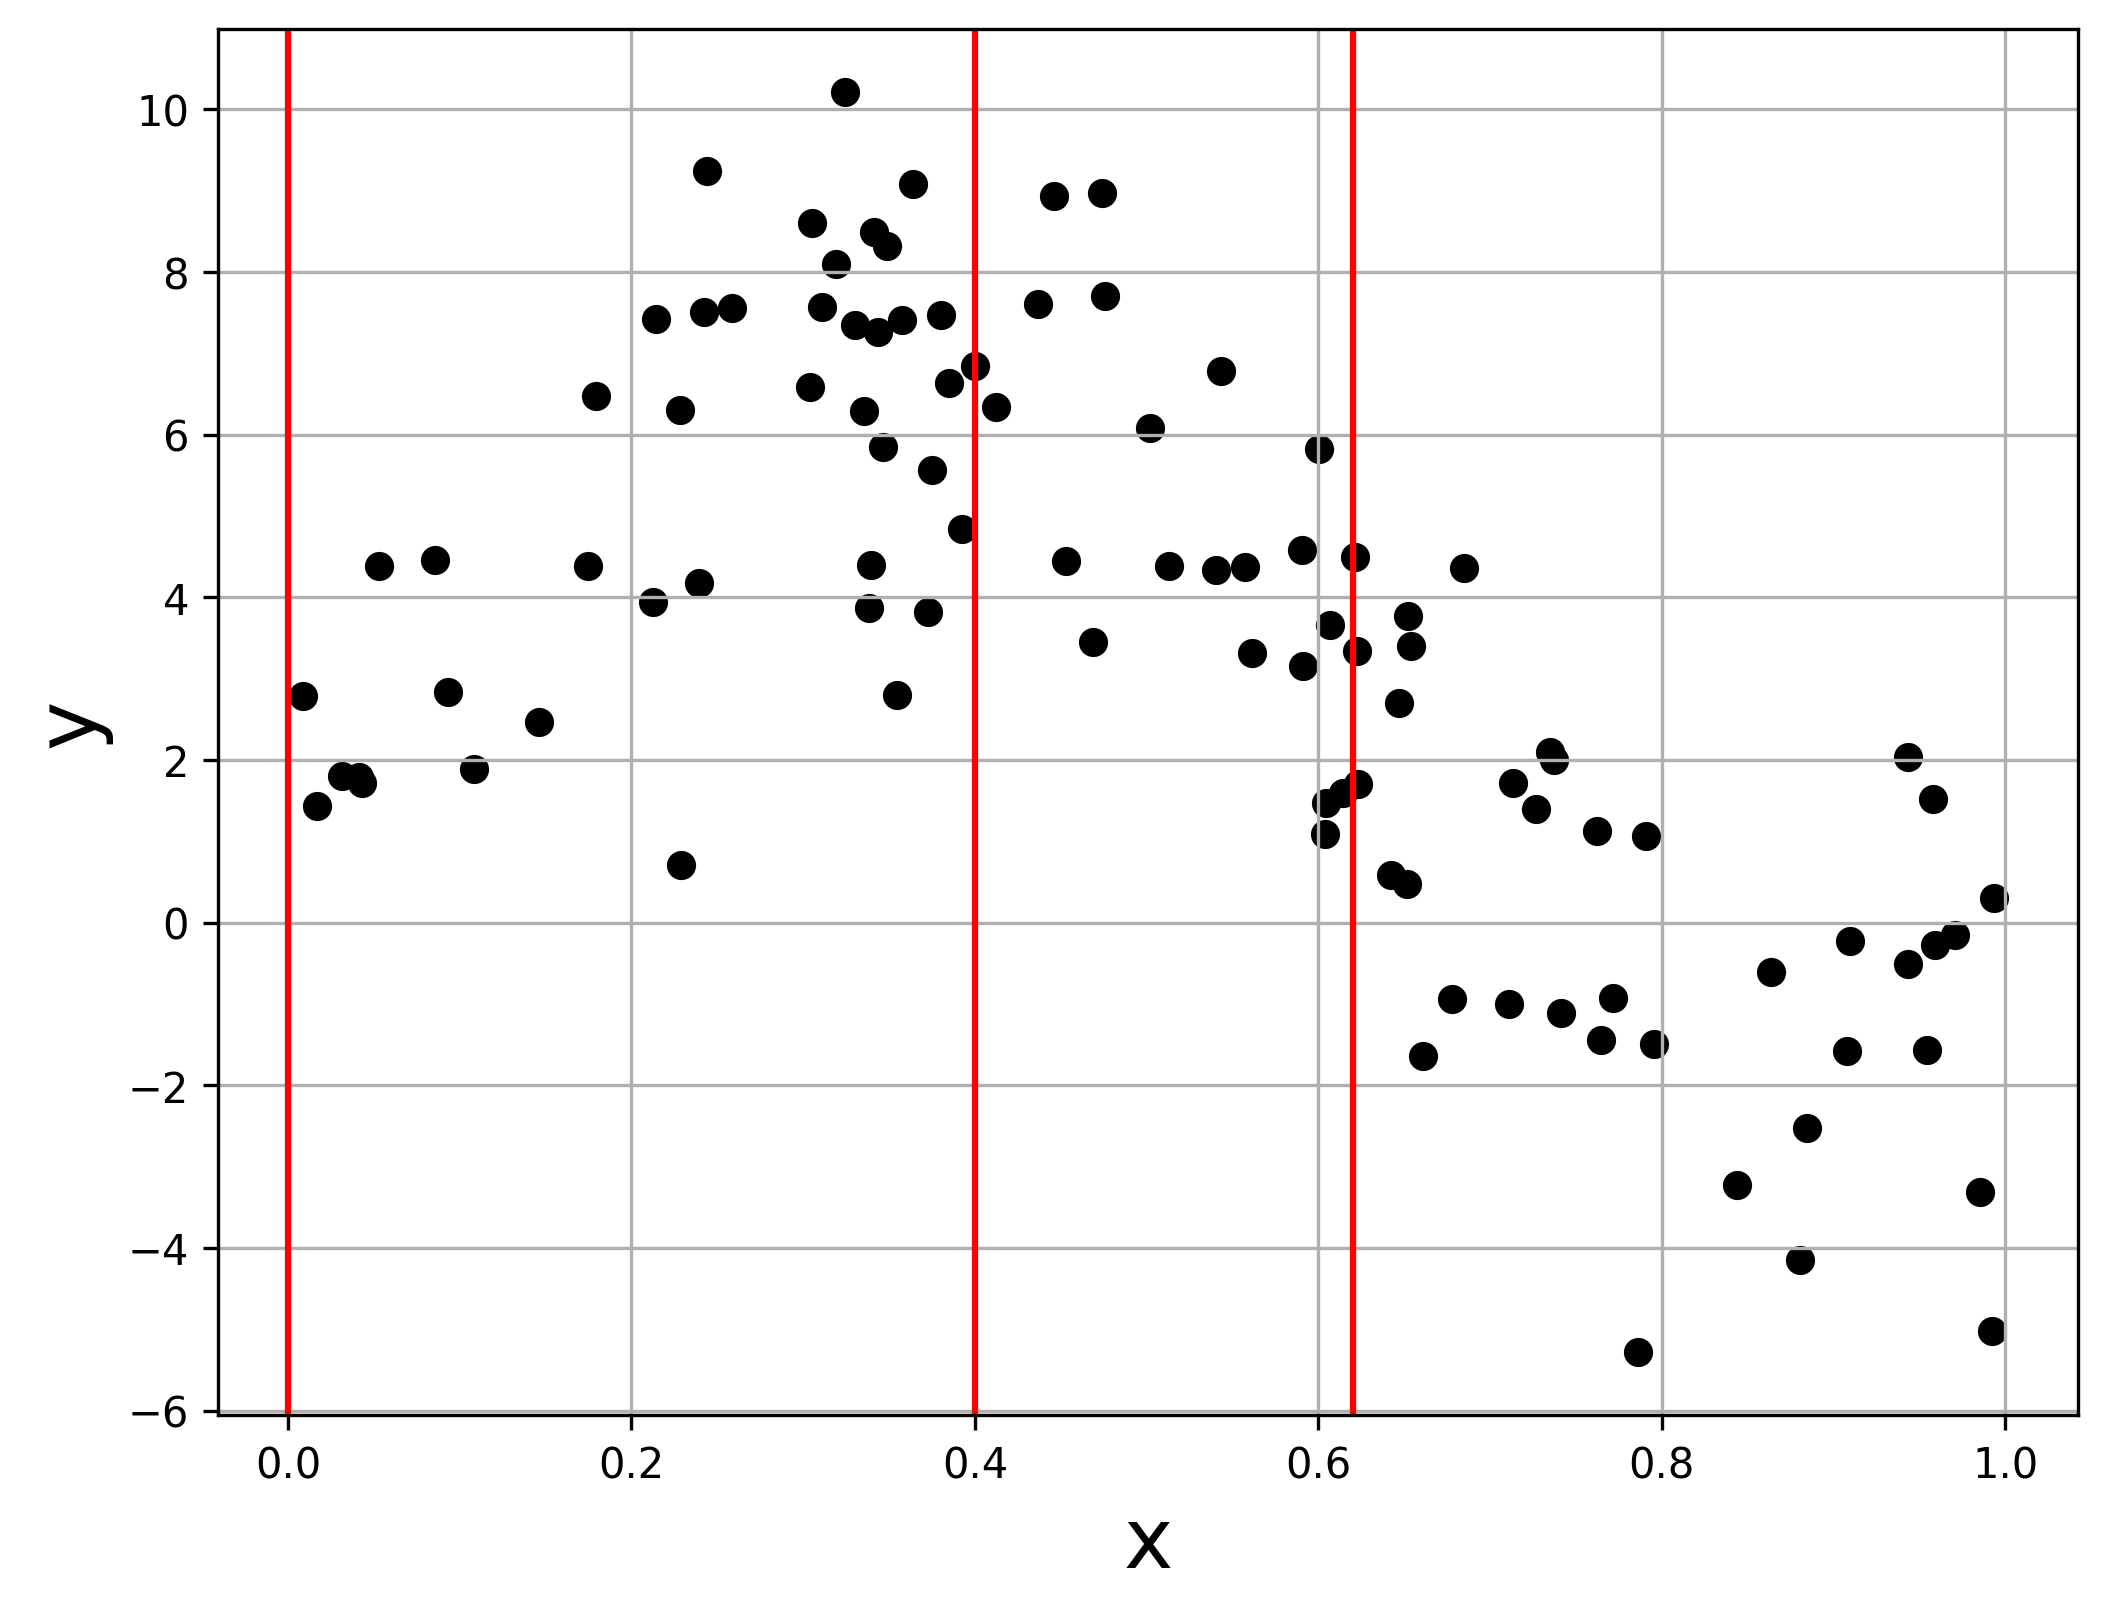

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
#-- Model Settings
n = 100
sd = 2
x = sim_x(n)
y = sim_y(x, sd)

#-- Plot the simulated x and y data
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,6) # define the fig's size in inch

# plot the data with black color
plt.scatter(x, y, color='black')

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add vertical lines and grid
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r')

plt.grid()

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

x = x.flatten()
y = y.flatten()

# Create a DataFrame
data_train = pd.DataFrame({'x': x, 'y': y})

# Fit the OLS model
model = smf.ols('y ~ x', data=data_train).fit()

# Print the summary
print(model.summary())

# Coefficients in DataFrame format
print(model.params)

# Other model properties
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)
print("Standard error:", model.mse_resid ** 0.5)
print("F-statistic:", model.fvalue)
print("p-value of F-statistic:", model.f_pvalue)
print("AIC:", model.aic)
print("BIC:", model.bic)
print("Degrees of freedom of residuals:", model.df_resid)
print("Number of observations:", model.nobs)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     61.23
Date:                Mon, 21 Aug 2023   Prob (F-statistic):           5.99e-12
Time:                        14:05:18   Log-Likelihood:                -243.76
No. Observations:                 100   AIC:                             491.5
Df Residuals:                      98   BIC:                             496.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4863      0.604     12.393      0.0

In [ ]:
import numpy as np
import pandas as pd

# Add a constant term (for intercept) to x data
X = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, X)
result = model.fit()

# Create a prediction dataset
xseq = np.linspace(0, 1, 200)  # sequence of 200 equally spaced values between 0 and 1
xeval = sm.add_constant(xseq)

# Predict using the fitted model
yhat1 = result.predict(xeval)

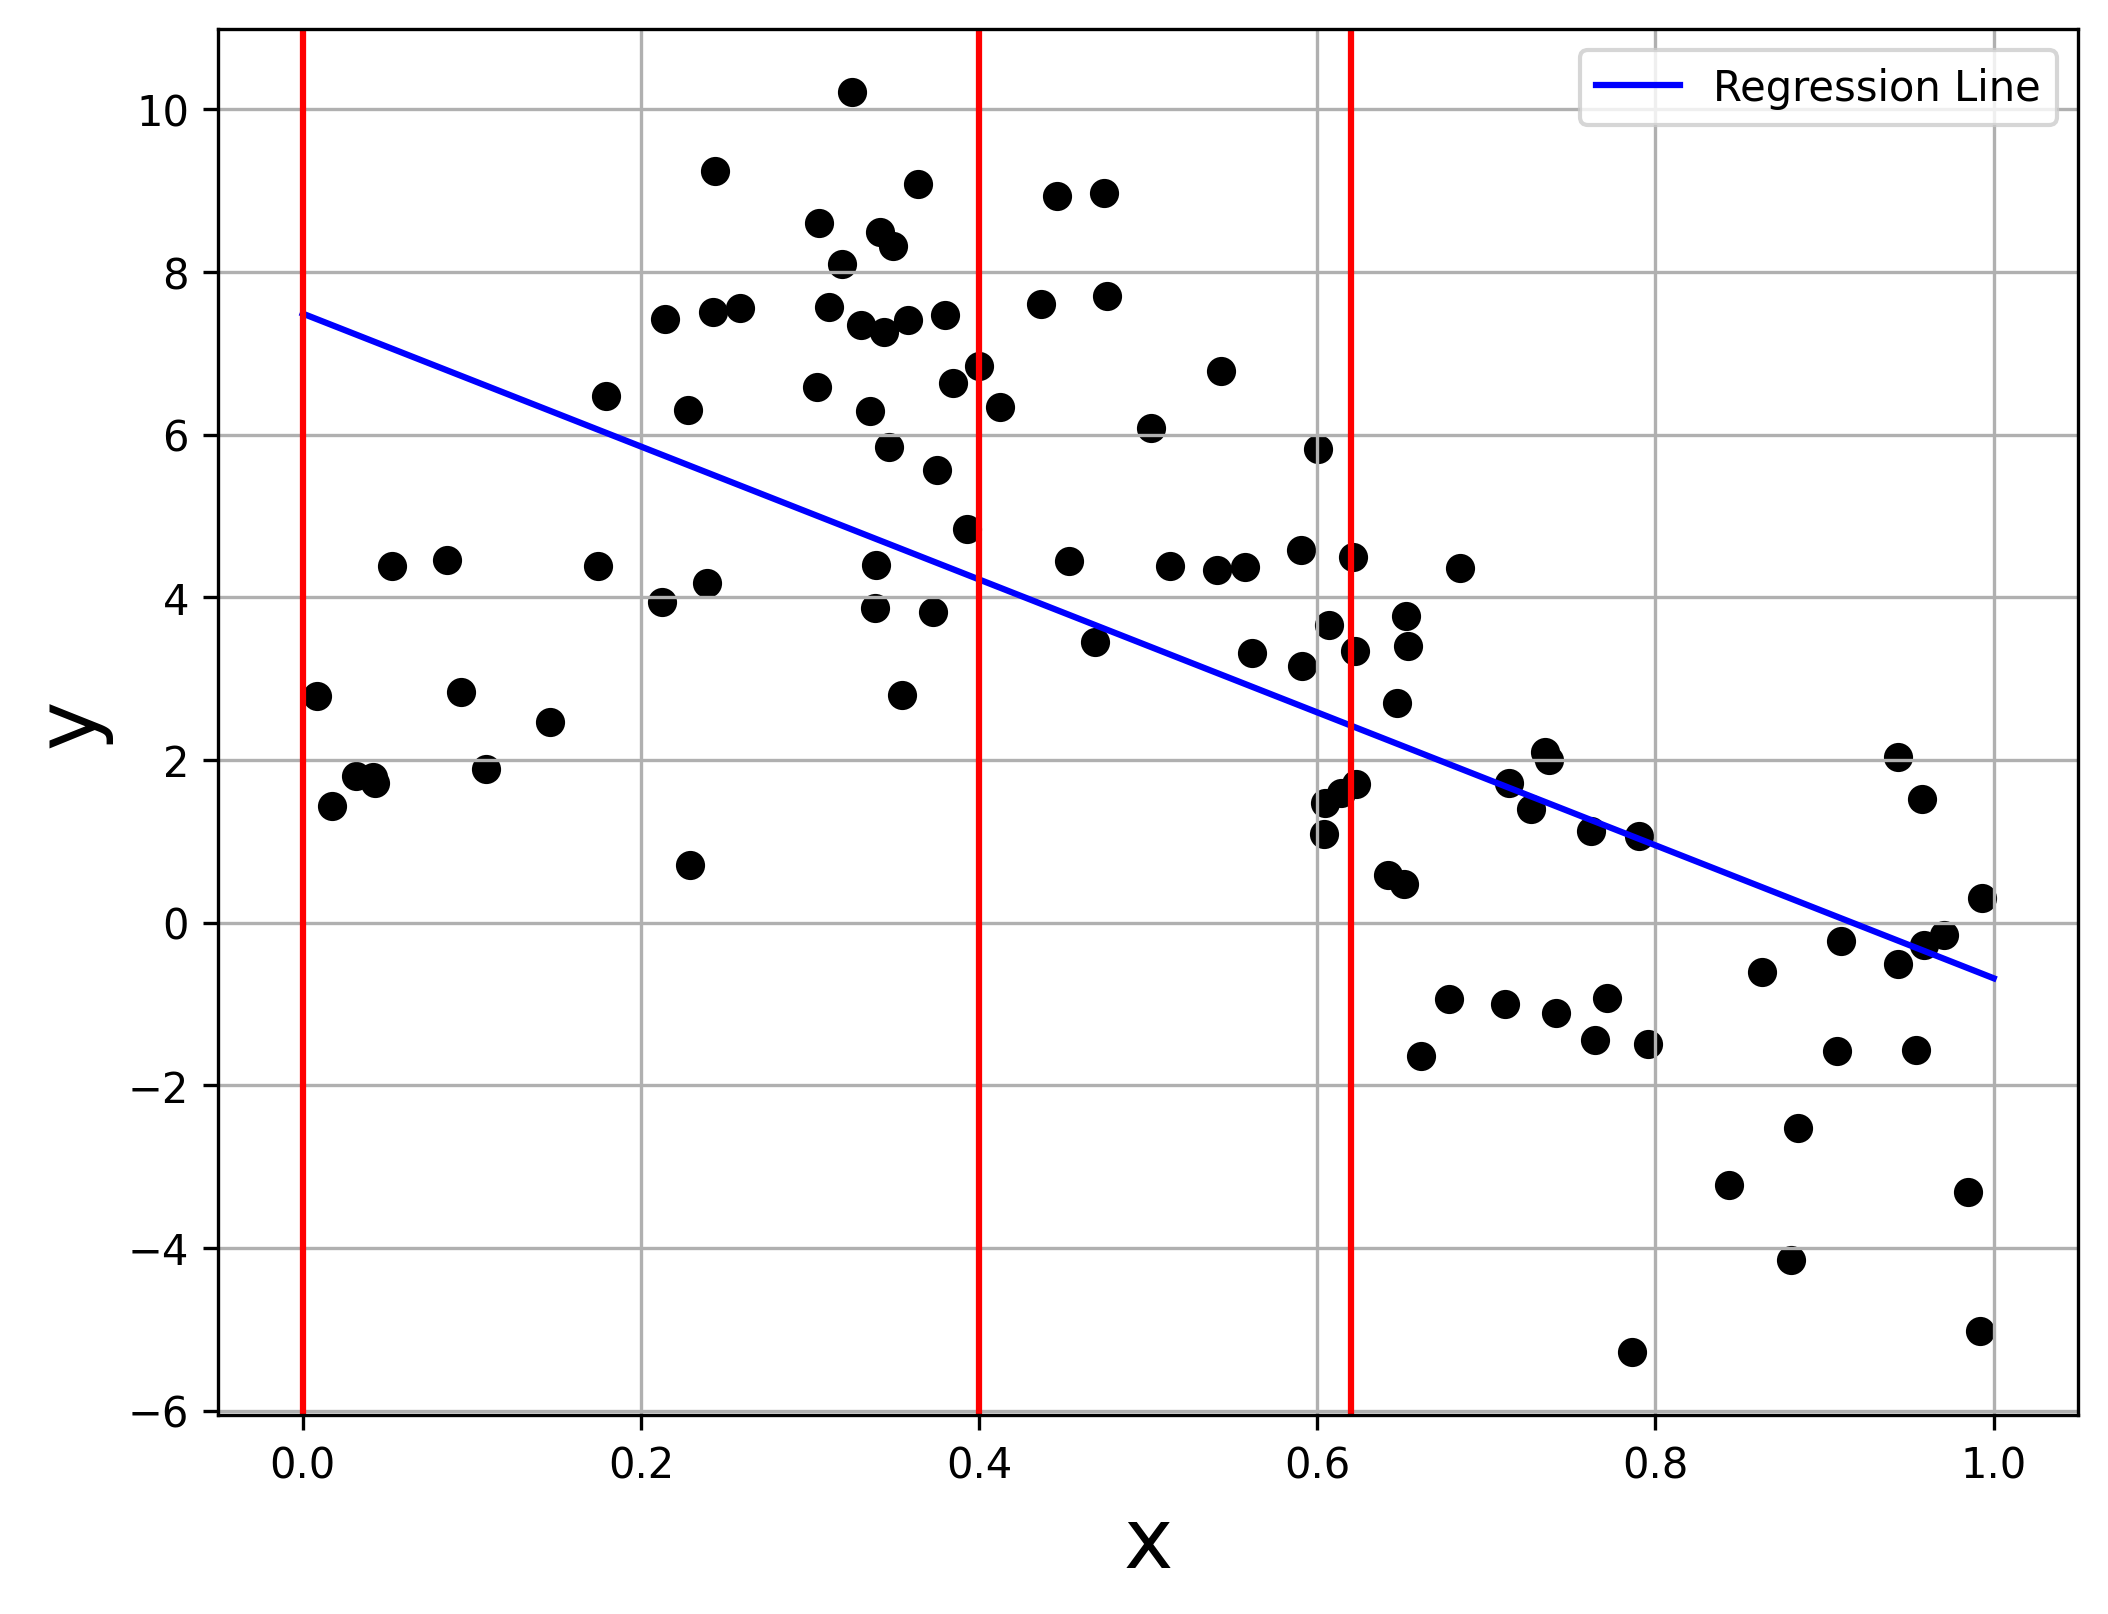

In [ ]:
# Plot
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,6) # define the fig's size in inch

# plot the data with black color
plt.scatter(x, y, color='black')

# plot the regression line with predictions
plt.plot(xseq, yhat1, color='blue', label='Regression Line')

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add vertical lines and grid
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r')

plt.legend()  # add a legend to the plot
plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming sim_x and sim_y are already defined elsewhere, and you've already set up data_train as before

#-- Model Settings
n = 100
sd = 2
x = sim_x(n)
y = sim_y(x, sd)

x = x.flatten()
y = y.flatten()

data_train = pd.DataFrame({'x': x, 'y': y})

# Create the polynomial features for the model
data_train['x2'] = data_train['x']**2
X = sm.add_constant(data_train[['x', 'x2']])

# Fit the quadratic regression model
model2 = sm.OLS(data_train['y'], X)
result2 = model2.fit()

# Create a prediction dataset
xseq = np.linspace(0, 1, 200)  # sequence of 200 equally spaced values between 0 and 1
xeval2 = pd.DataFrame({'x': xseq, 'x2': xseq**2})
xeval2 = sm.add_constant(xeval2)
yhat2 = result2.predict(xeval2)

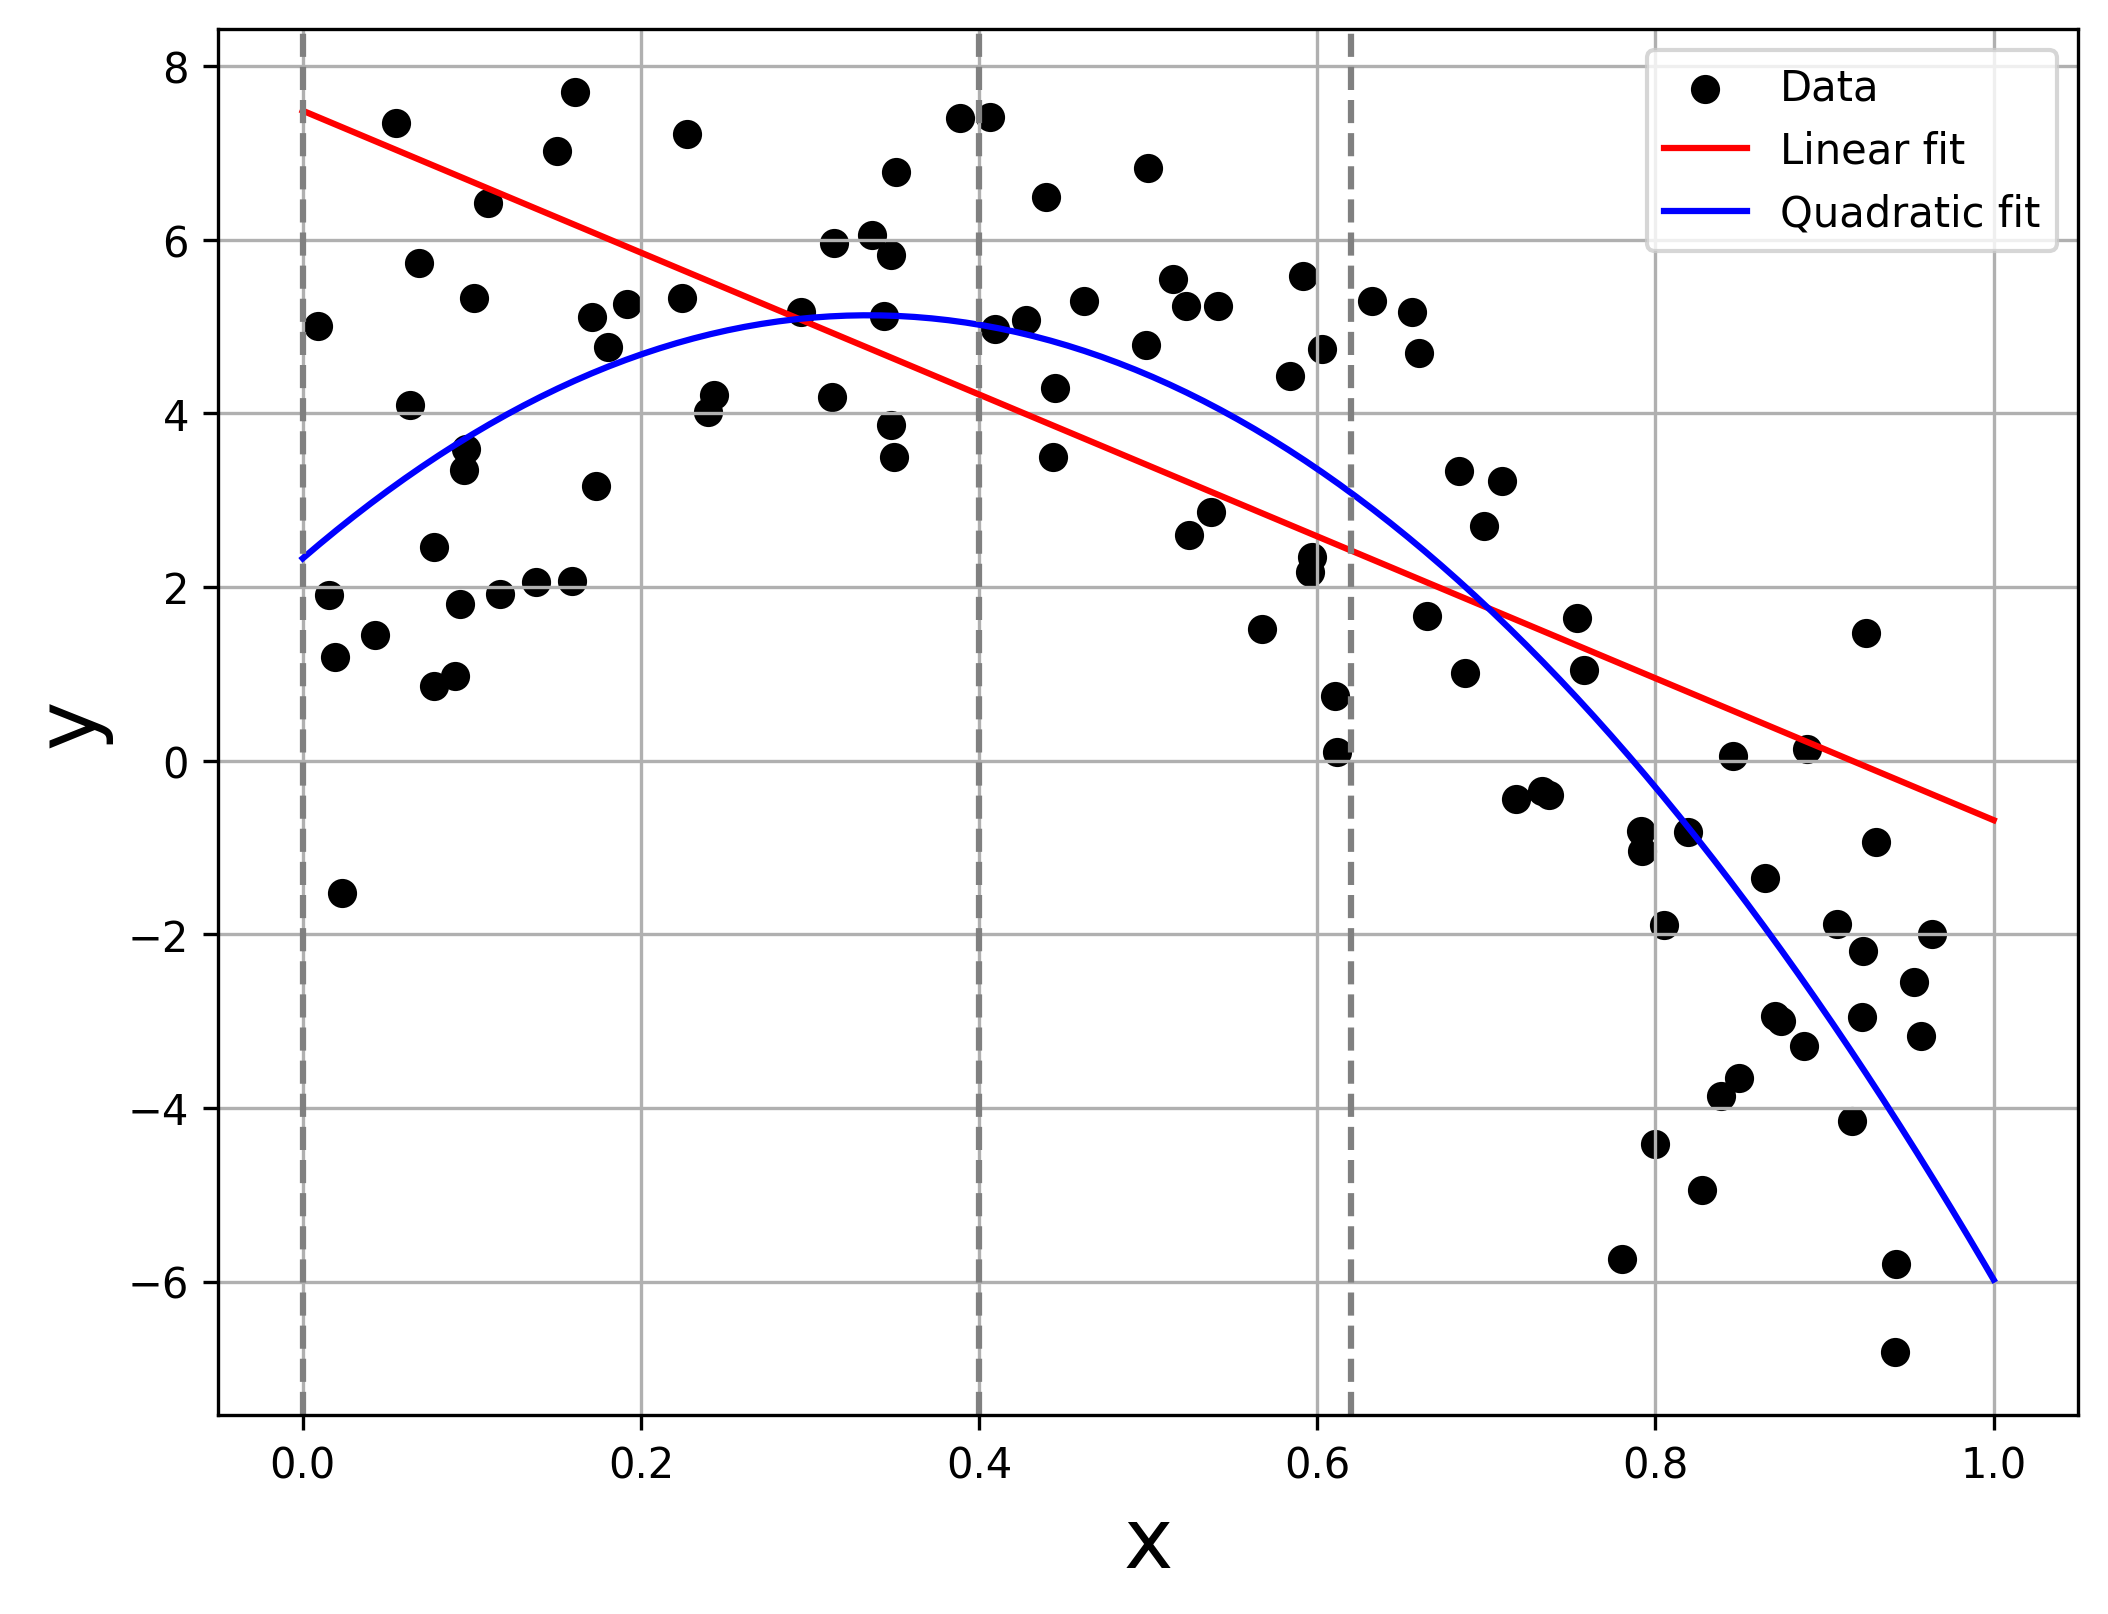

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

mpl.rcParams['figure.dpi'] = 300

# Assuming x, y, xseq, yhat1, and yhat2 have already been defined and computed

#-- Plot the simulated x and y data
fig = plt.gcf()  # fig is the figure's unique handle
fig.set_size_inches(8, 6)  # define the fig's size in inch

# plot the data with black color
plt.scatter(x, y, color='black', label='Data')

# Plot the linear regression predictions
plt.plot(xseq, yhat1, color='red', label='Linear fit')

# Plot the quadratic regression predictions
plt.plot(xseq, yhat2, color='blue', label='Quadratic fit')

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add vertical lines and grid
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='grey', linestyle='--')

plt.grid()
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


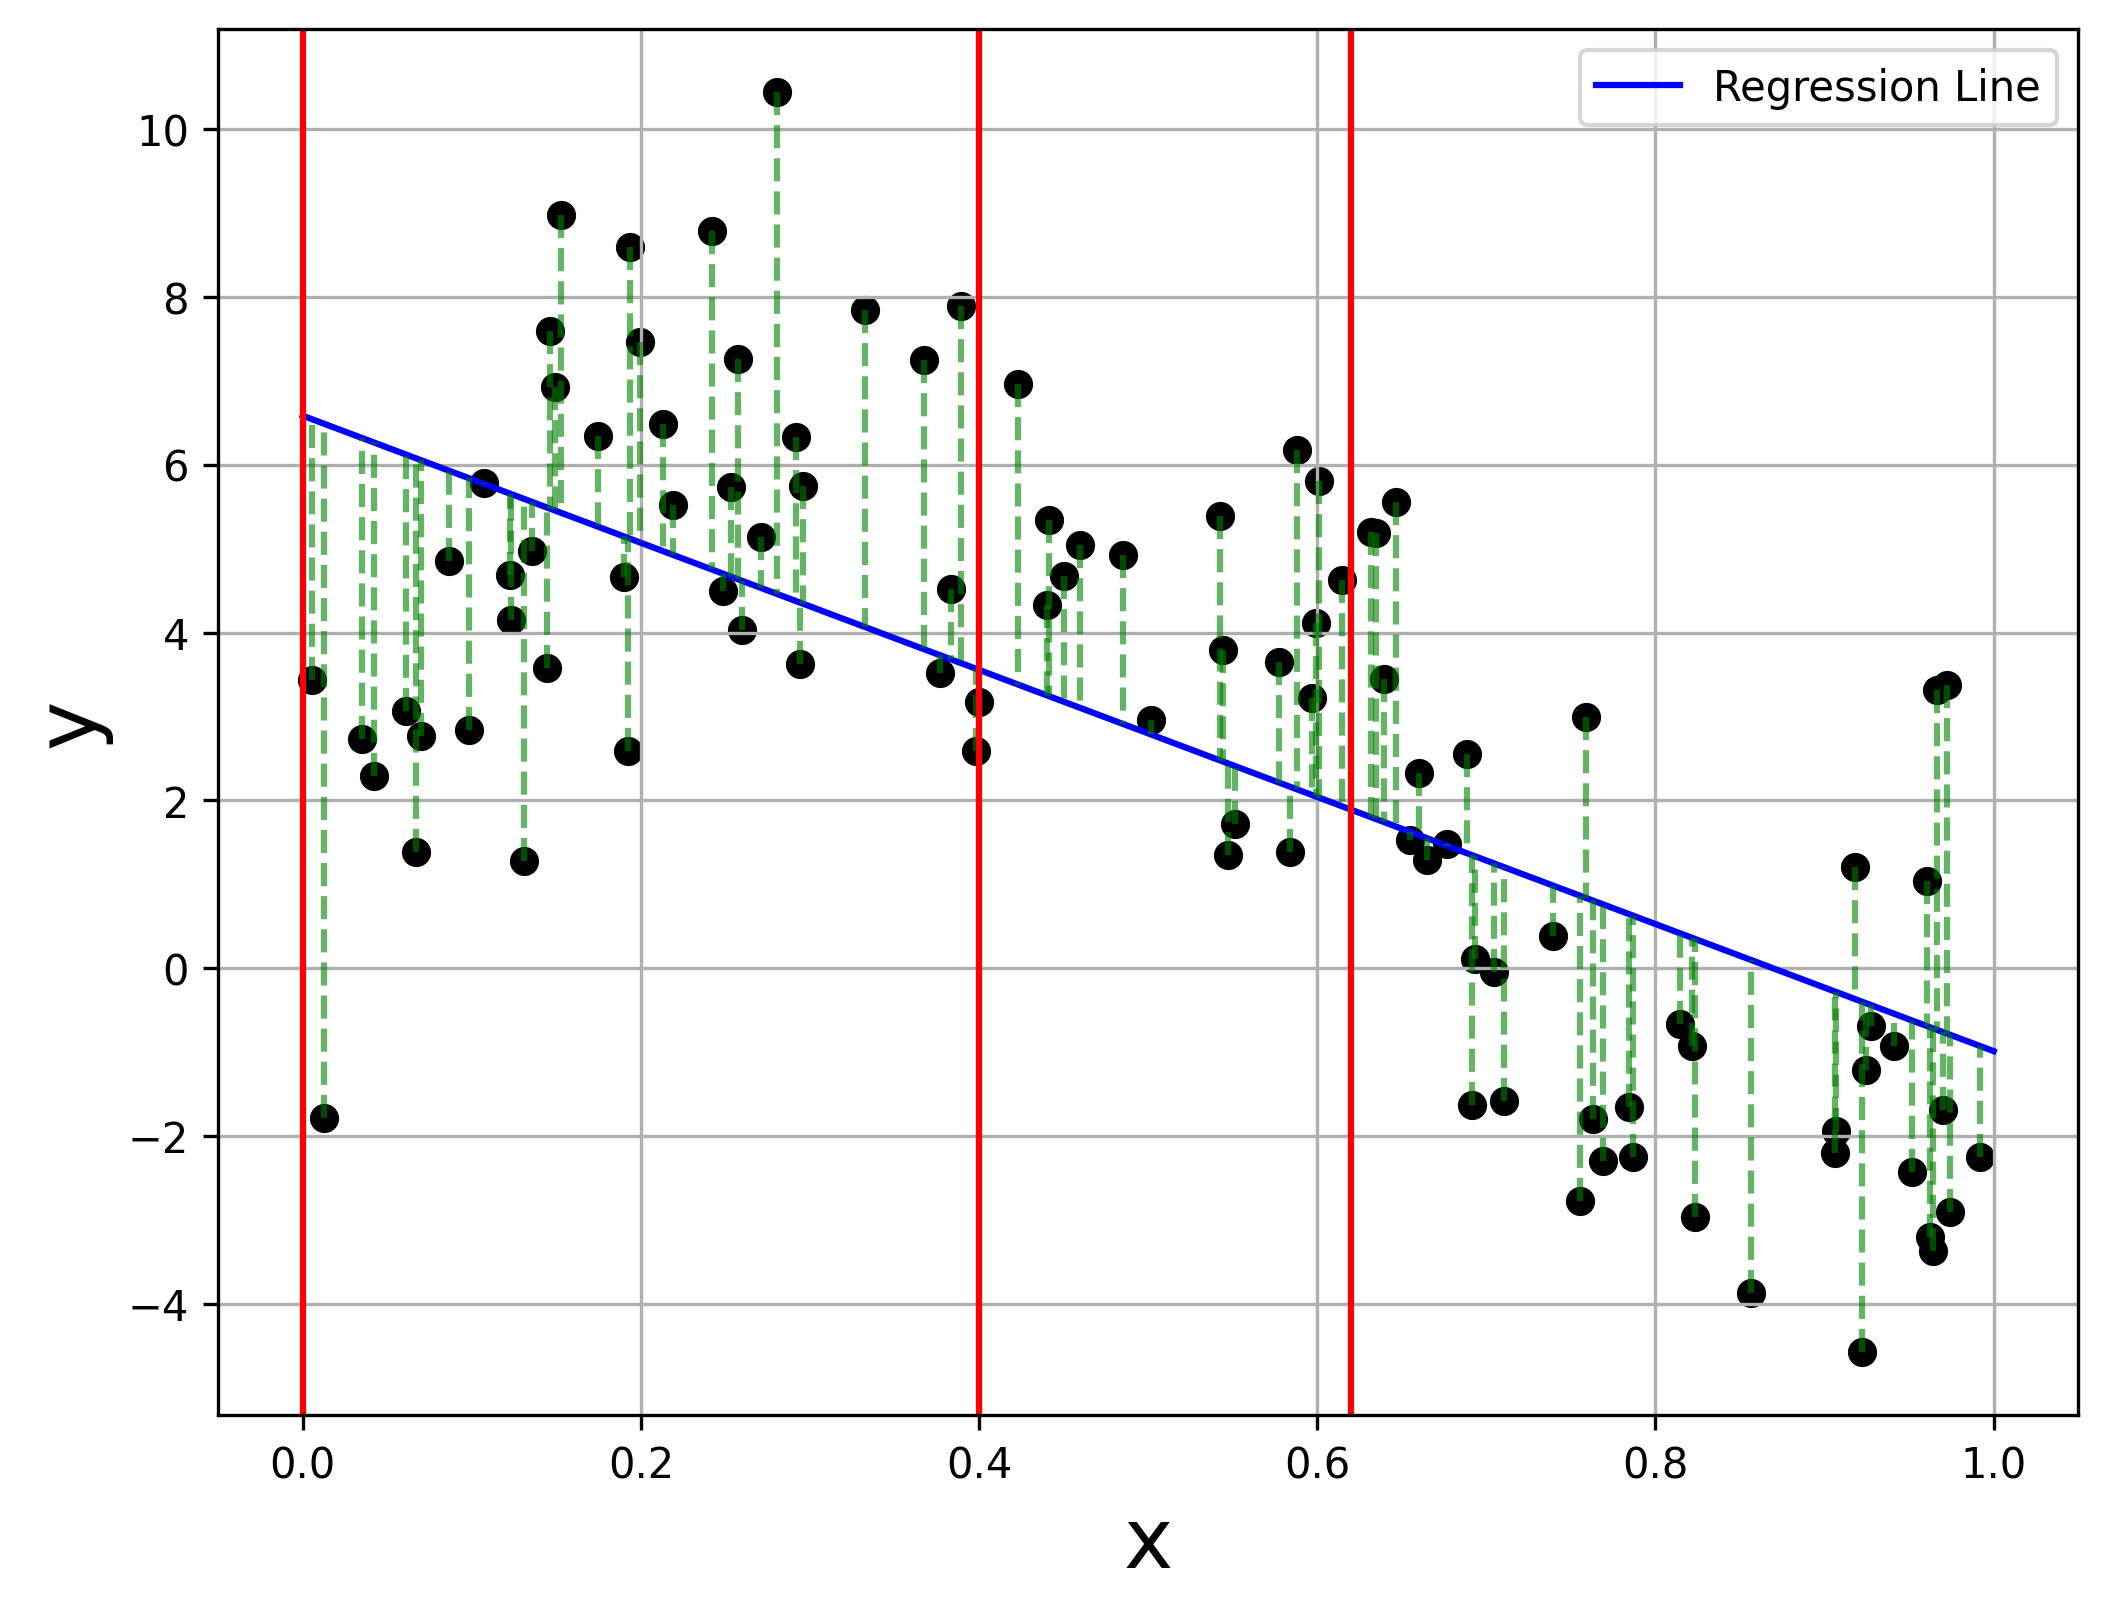

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming sim_x and sim_y are already defined elsewhere

#-- Model Settings
n = 100
sd = 2
x = sim_x(n)
y = sim_y(x, sd)

# Fit the OLS model
X = sm.add_constant(x)
model = sm.OLS(y, X)
result = model.fit()

# Predicted values for the original x data
y_pred = result.predict(X)

# Create a prediction dataset for the smooth line
xseq = np.linspace(0, 1, 200)  # sequence of 200 equally spaced values between 0 and 1
xeval = sm.add_constant(xseq)
yhat1 = result.predict(xeval)

# Plot
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,6) # define the fig's size in inch

# plot the data with black color
plt.scatter(x, y, color='black')

# plot the regression line with predictions
plt.plot(xseq, yhat1, color='blue', label='Regression Line')

# Drawing lines from each point to the regression line
for xi, yi, yp in zip(x, y, y_pred):
    plt.plot([xi, xi], [yi, yp], color='green', linestyle='--', alpha=0.6)

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add vertical lines and grid
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r')

plt.legend()  # add a legend to the plot
plt.grid()
plt.show()


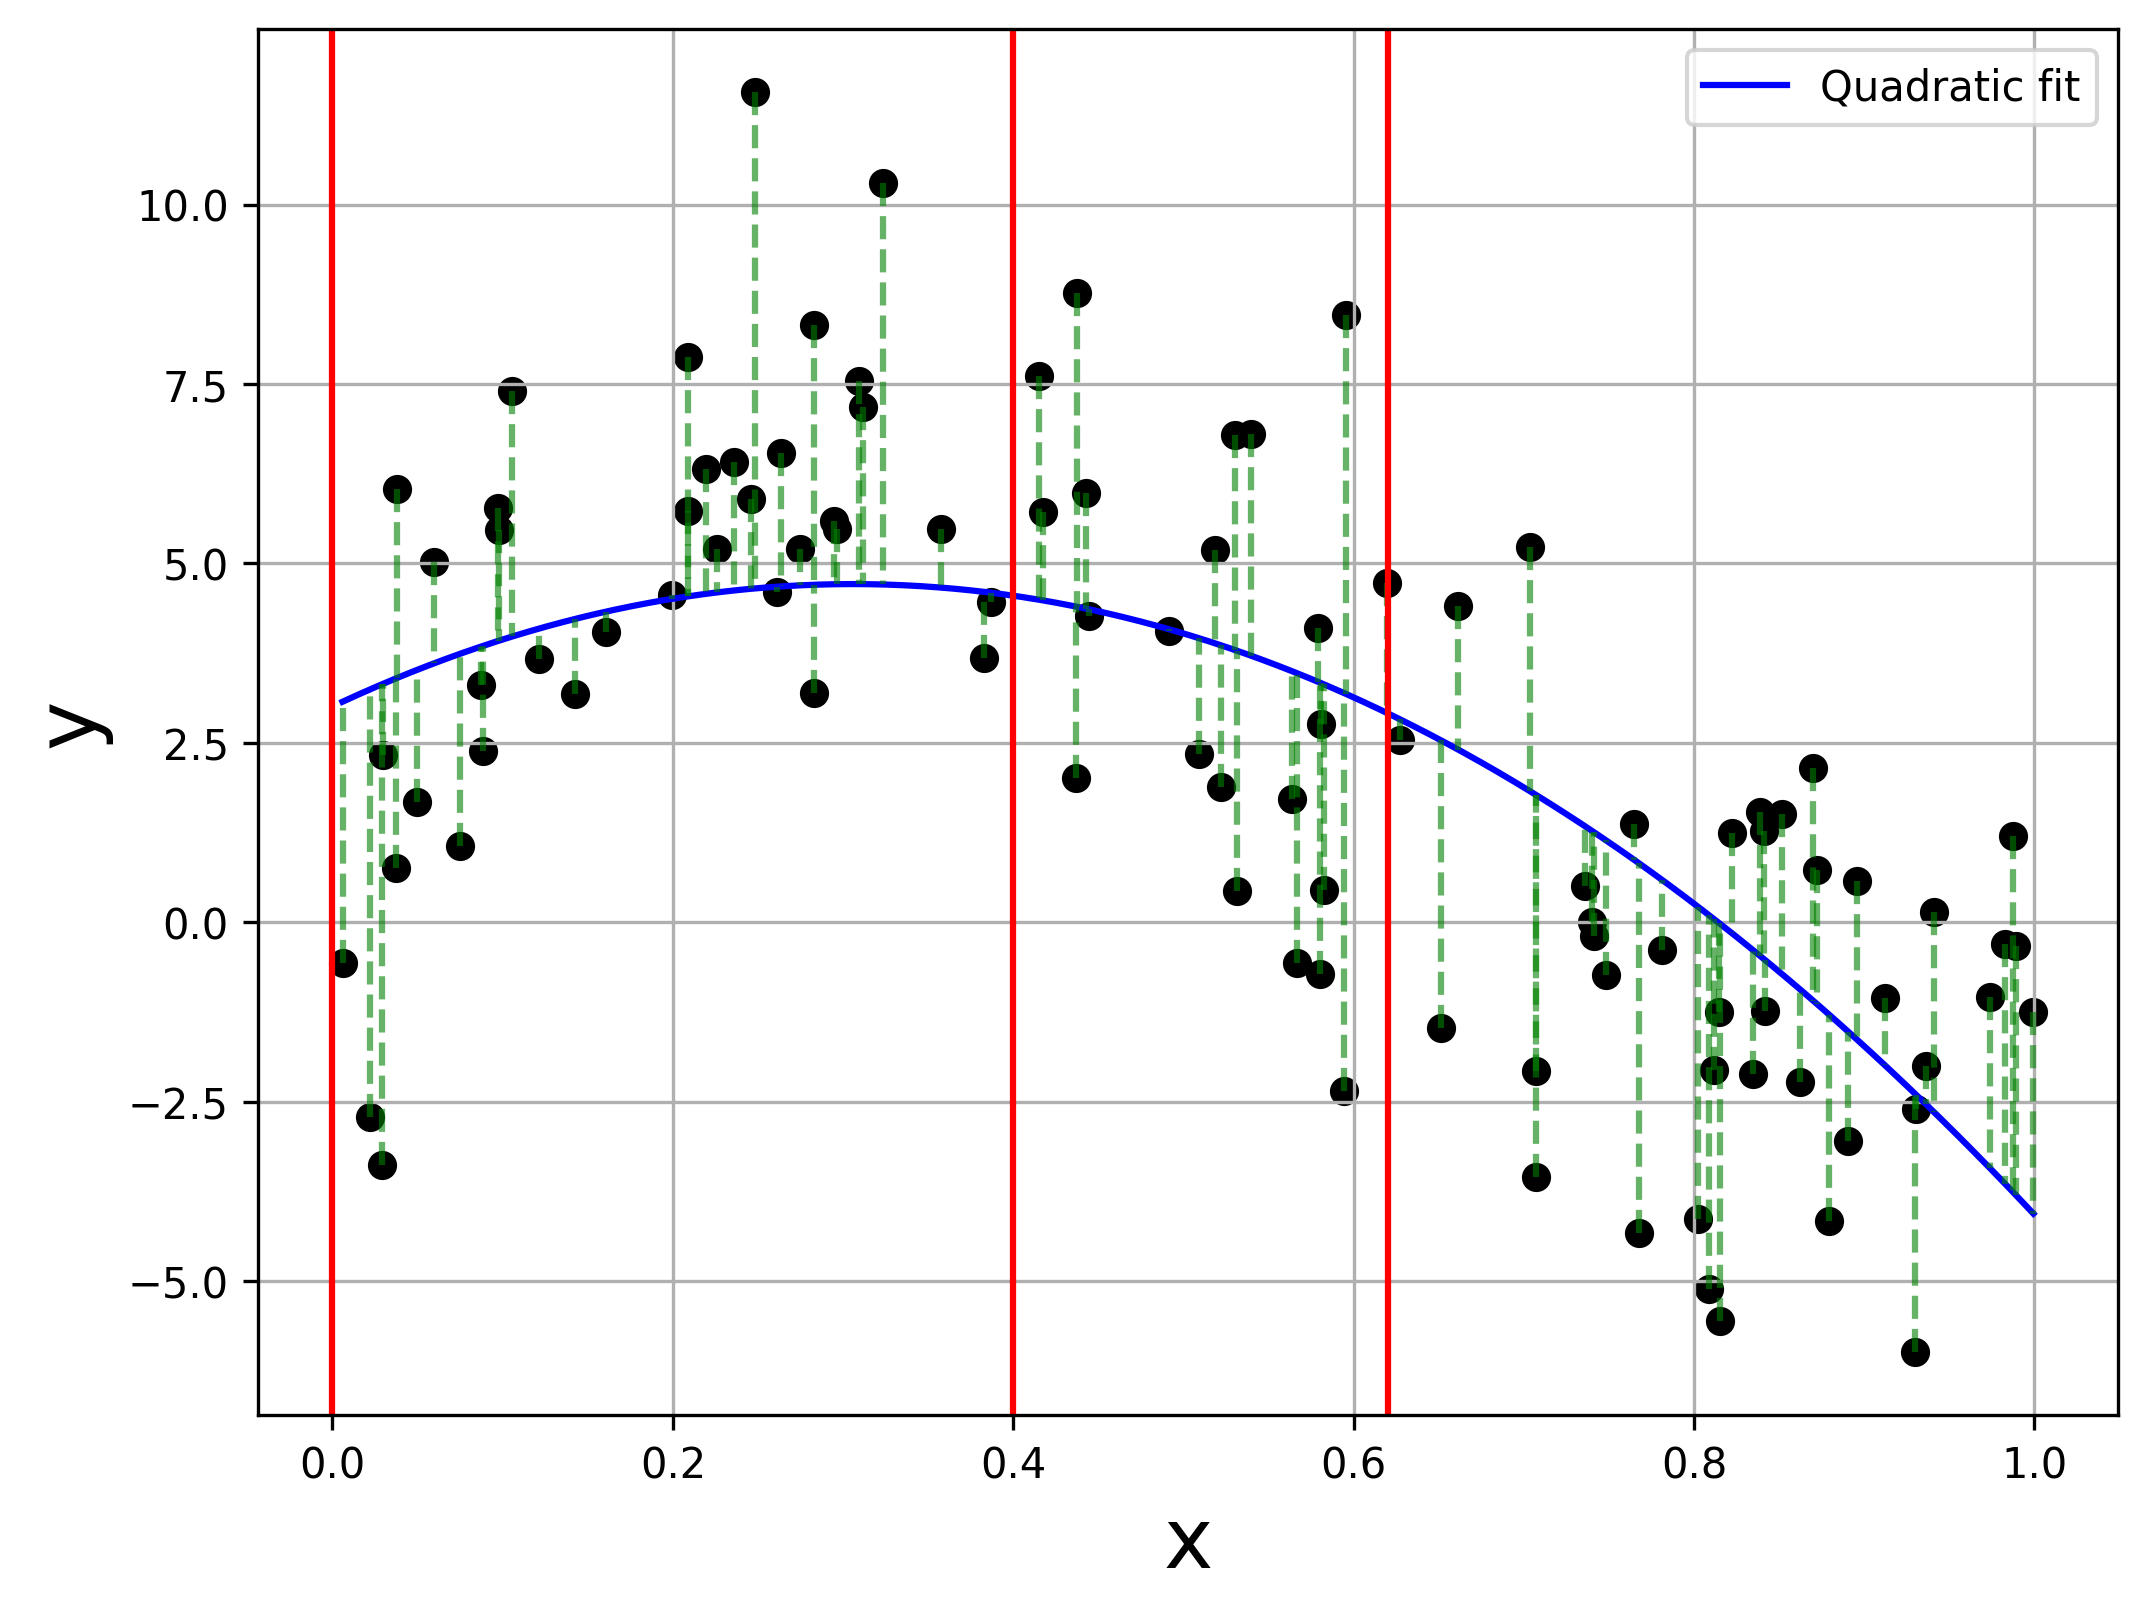

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your previously defined x and y
x = sim_x(n)
y = sim_y(x, sd)

x = x.flatten()
y = y.flatten()

# Quadratic regression
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
yhat2 = p(x)

# Fine-grained xseq for plotting the smooth curve
xseq = np.linspace(min(x), max(x), 200)
y_quad_smooth = p(xseq)

# Setup for high-resolution plot
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Plot setup
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Scatter plot
plt.scatter(x, y, color='black')

# Quadratic curve
plt.plot(xseq, y_quad_smooth, color='blue', label='Quadratic fit')

# Lines from original points to the regression curve
for xi, yi, y2i in zip(x, y, yhat2):
    plt.plot([xi, xi], [yi, y2i], color='green', linestyle='--', alpha=0.6)

# Labels and other plot adjustments
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r')

plt.grid()
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


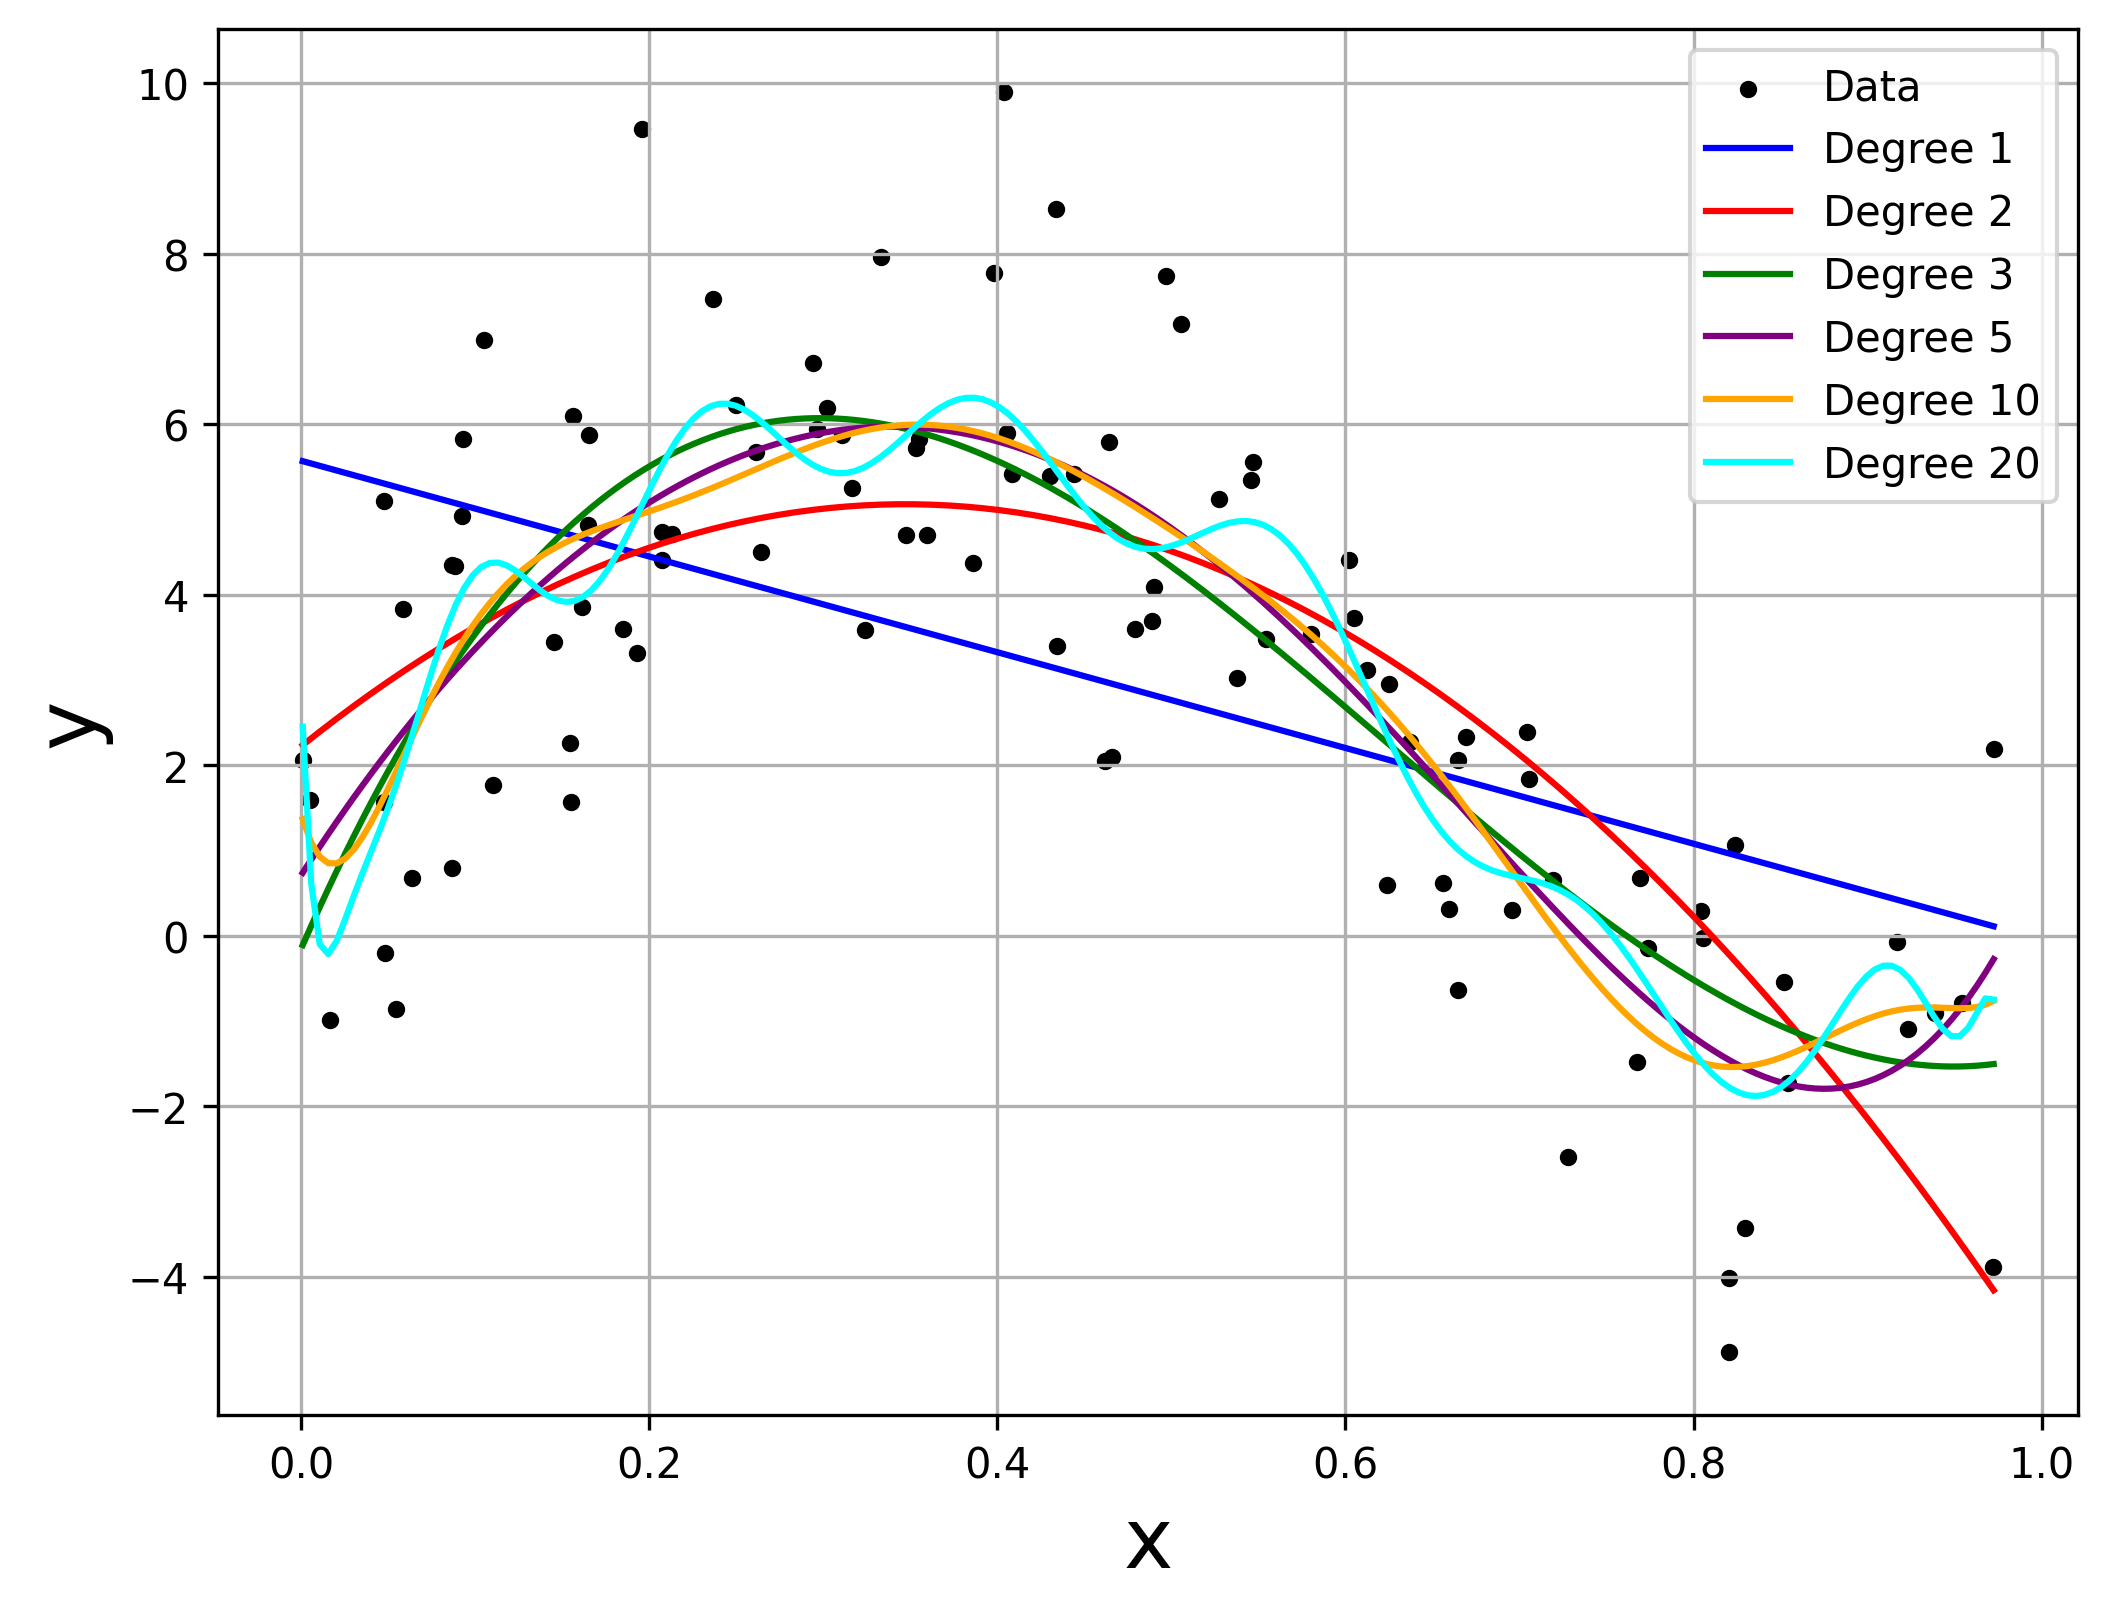

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = sim_x(n)
y = sim_y(x, sd)

x = x.flatten()
y = y.flatten()

# Define the xseq for plotting smooth curves
xseq = np.linspace(min(x), max(x), 200)

# High resolution setup
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Plot setup
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Scatter plot of the original data
plt.scatter(x, y, color='black', s=10, label='Data')

# Polynomial fits and plotting for various degrees
degrees = [1, 2, 3, 5, 10, 20]
colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan']

for deg, color in zip(degrees, colors):
    z = np.polyfit(x, y, deg)
    p = np.poly1d(z)
    plt.plot(xseq, p(xseq), color=color, label=f'Degree {deg}')

# Labels, legend, and other plot adjustments
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
plt.grid()
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Assuming `data_train` is a pandas DataFrame and `xeval` is already defined
n = 100
x = sim_x(n)
y = sim_y(x, sd)

x = x.flatten()
y = y.flatten()
data_train = pd.DataFrame({'x': x, 'y': y})
xeval = pd.DataFrame({'x': np.linspace(min(x), max(x), 200)})

# Separate features and target variable from the training data
X_train = data_train[['x']].values
y_train = data_train['y'].values

# Create the knn regression model with k = 20 neighbors
knn_20 = KNeighborsRegressor(n_neighbors=20)

# Fit the model
knn_20.fit(X_train, y_train)

# Make predictions on the xeval dataset
yhat_knn_20 = knn_20.predict(xeval)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


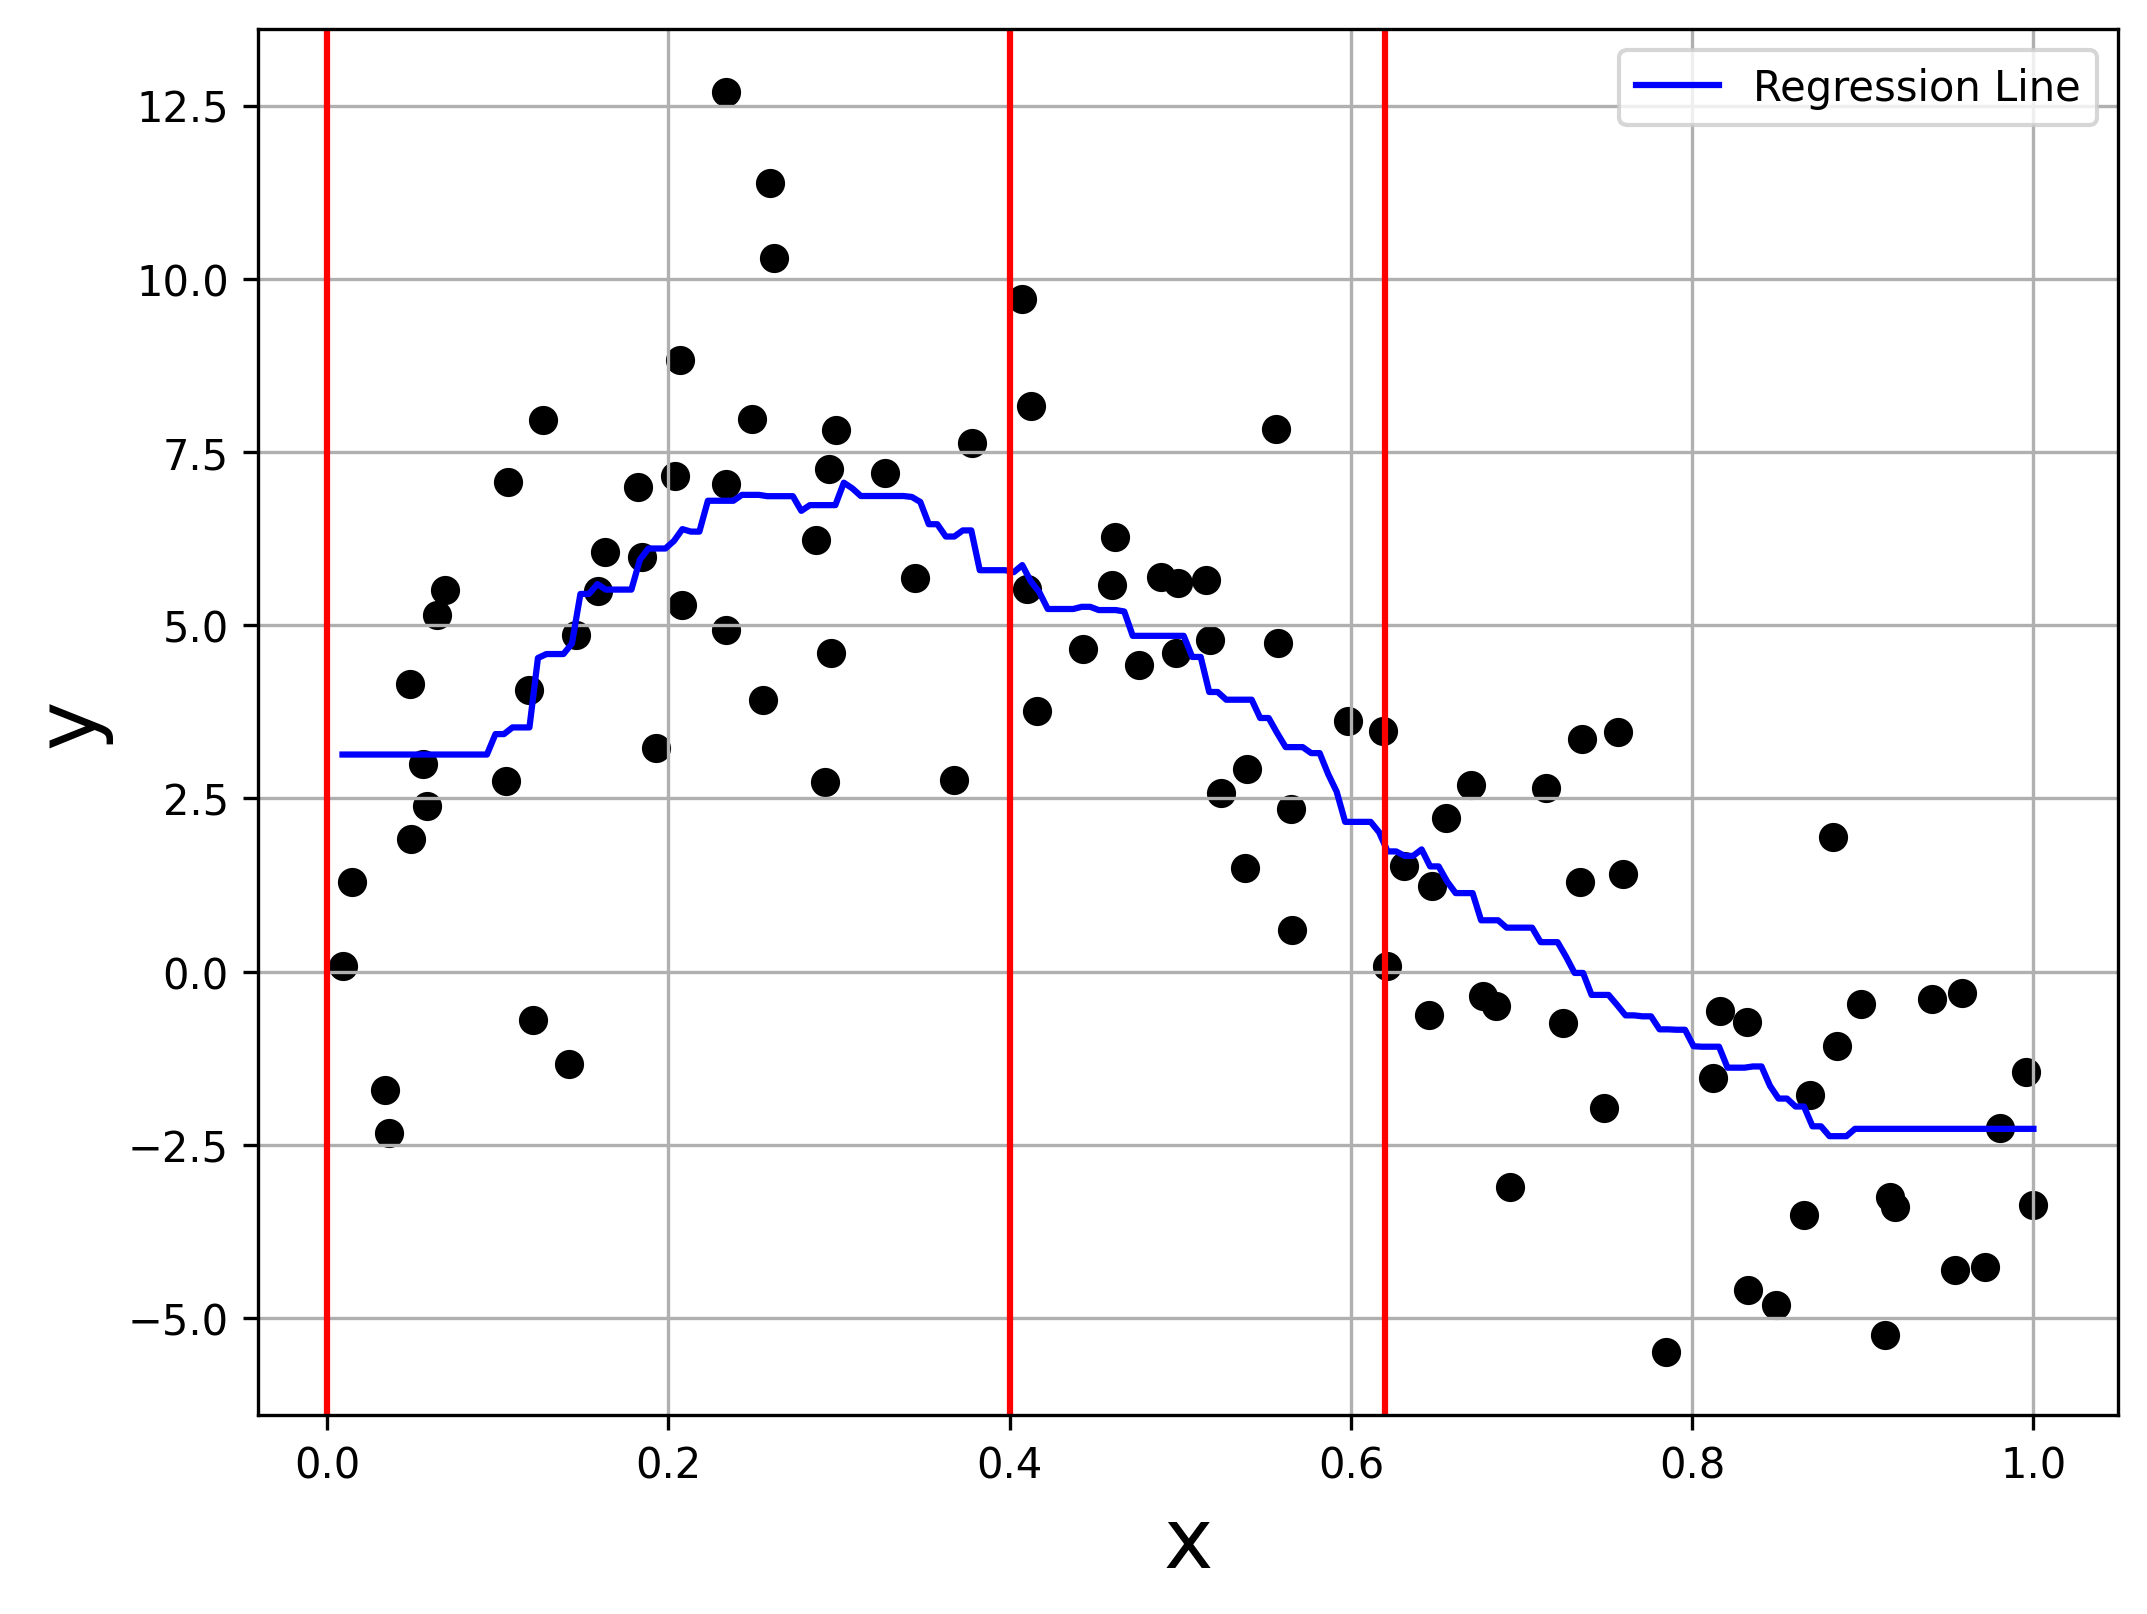

In [ ]:
# Plot
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,6) # define the fig's size in inch

# plot the data with black color
plt.scatter(x, y, color='black')

# plot the regression line with predictions
plt.plot(xeval, yhat_knn_20, color='blue', label='Regression Line')

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add vertical lines and grid
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r')

plt.legend()  # add a legend to the plot
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  w

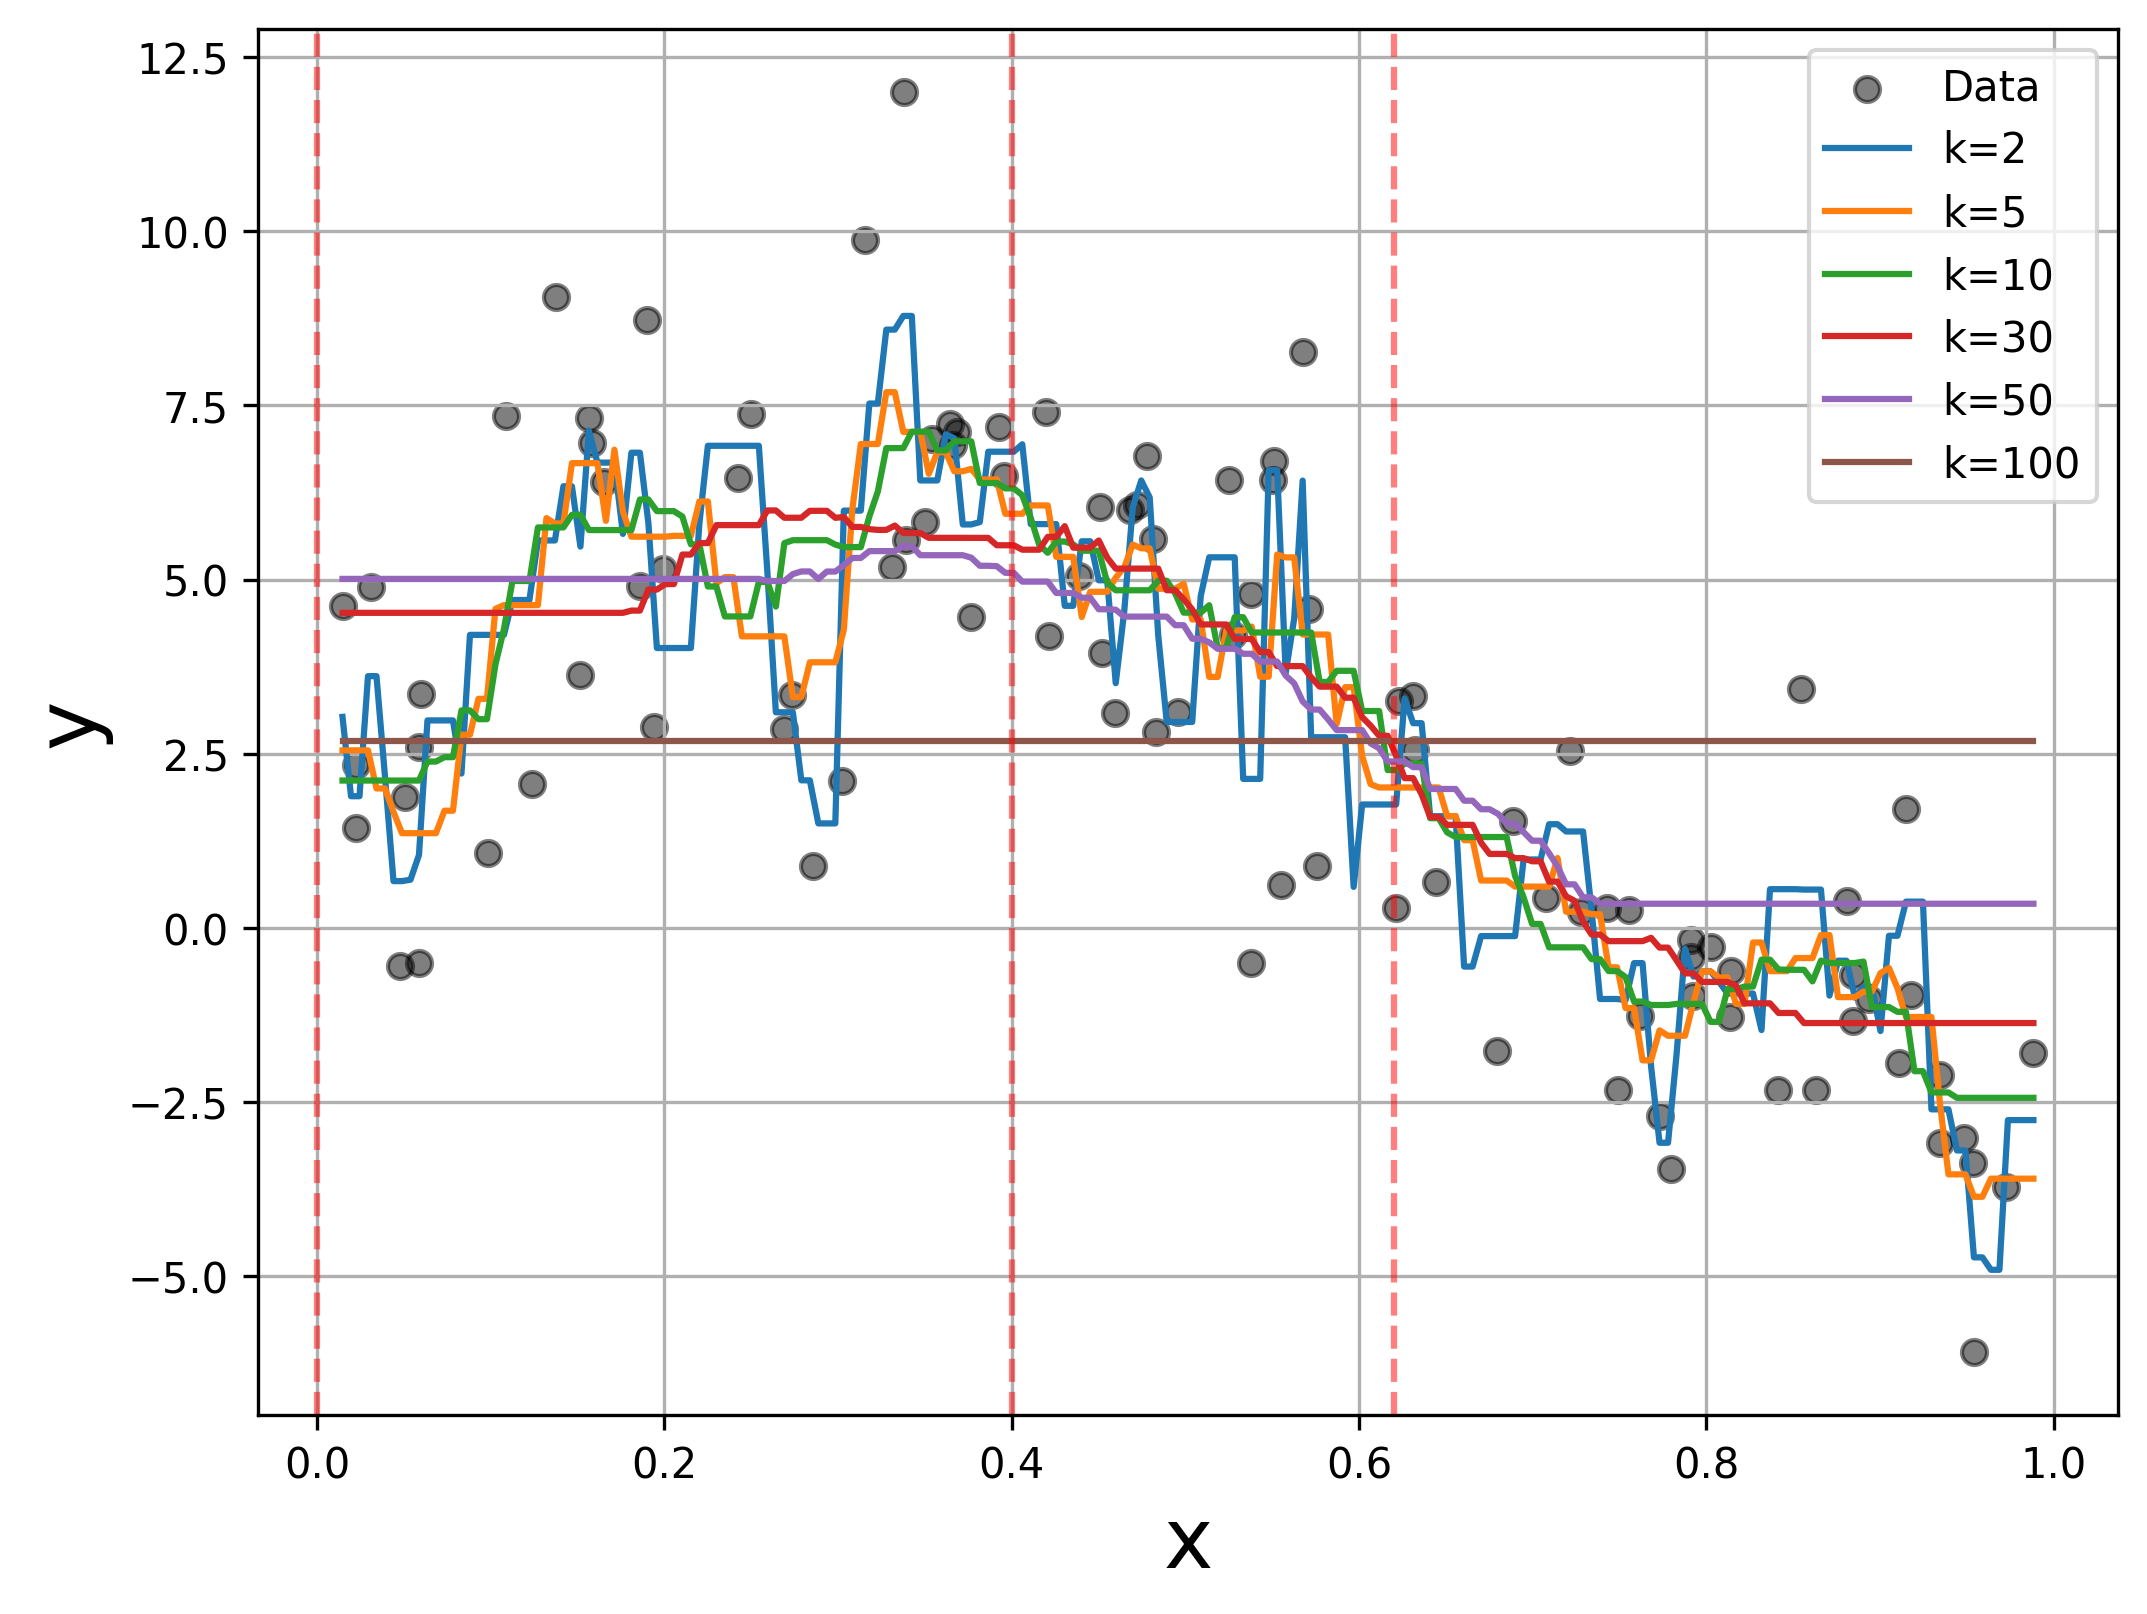

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Assuming sim_x and sim_y are defined elsewhere
n = 100
x = sim_x(n)
y = sim_y(x, sd)

x = x.flatten()
y = y.flatten()
data_train = pd.DataFrame({'x': x, 'y': y})
xeval = pd.DataFrame({'x': np.linspace(min(x), max(x), 200)})

# Separate features and target variable from the training data
X_train = data_train[['x']].values
y_train = data_train['y'].values

# List of k values
k_values = [2, 5, 10, 30, 50, 100]

# Plot settings
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
fig = plt.gcf()
fig.set_size_inches(8,6)

# plot the data with black color
plt.scatter(x, y, color='black', alpha=0.5, label='Data')

# For each k, fit the k-NN regression and plot the predicted values
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    yhat_knn = knn_model.predict(xeval)
    plt.plot(xeval, yhat_knn, label=f'k={k}')

# Set the labels, legend, and grid
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)
xcoords = [0, 0.4, 0.62]
for xc in xcoords:
    plt.axvline(x=xc, color='r', linestyle='--', alpha=0.5)
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assuming sim_x and sim_y are defined elsewhere
n = 100
x = sim_x(n)
y = sim_y(x, sd)

x = x.flatten()
y = y.flatten()
data_train = pd.DataFrame({'x': x, 'y': y})
xeval = pd.DataFrame({'x': np.linspace(min(x), max(x), 100)})

# Separate features and target variable from the training data
X_train = data_train[['x']].values
y_train = data_train['y'].values

# List of k values
k_values = [2, 5, 10, 30, 50, 100]

# Create empty lists to store results
k_list = []
mse_list = []
third_col_list = []

# For each k, fit the k-NN regression, predict and compute MSE
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    yhat_knn = knn_model.predict(xeval)

    mse = mean_squared_error(y_train, knn_model.predict(X_train))

    k_list.append(k)
    mse_list.append(mse)
    third_col_list.append(len(xeval) / k)

# Organize results in a DataFrame
results_df = pd.DataFrame({
    'k': k_list,
    'MSE': mse_list,
    'xeval/k': third_col_list
})

print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  w

     k        MSE    xeval/k
0    2   2.207814  50.000000
1    5   3.743340  20.000000
2   10   3.938078  10.000000
3   30   4.637970   3.333333
4   50   6.654665   2.000000
5  100  12.677735   1.000000


In [ ]:
#-- slide 20 (knn)
n = 100
x = sim_x(n)
y = sim_y(x, sd)
xseq = np.arange(0,1,1/n).reshape(n,1)

k_list = [2,5,10,50,100]

Y_pred_knn = np.zeros((len(x),len(k_list)))
Y_pred_MSE_knn = np.zeros((len(k_list),2))

for i, k in enumerate(k_list): # google "enumerate"
    model_knn = KNeighborsRegressor(n_neighbors=k) # fit k for 2, 5, 10, 50, and 100
    model_knn.fit(x,y)
    tpred = model_knn.predict(sorted(x))

    Y_pred_knn[:,i:i+1] = tpred
    Y_pred_MSE_knn[i,0] = k
    Y_pred_MSE_knn[i,1] = mean_squared_error(tpred, y)

[[ 1.          5.04343534]
 [ 2.          2.26690445]
 [ 3.          0.98572029]
 [ 5.          0.81140263]
 [10.          0.77591303]
 [20.          0.66054882]]


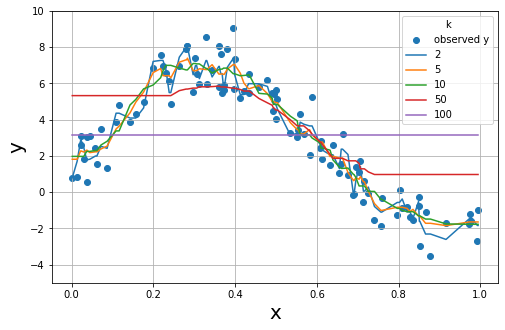

In [ ]:
#-- sldie 20 (knn; continued)
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

# plot the data
plt.scatter(x,y, label='observed y')
plt.plot(sorted(x),Y_pred_knn,label=k_list)

# set the labels
plt.xlabel('x', size=20)
plt.ylabel('y', size=20)

# add grid and legend
plt.grid()
plt.legend(loc=0, title='k')
plt.ylim([-5,10])


print(Y_pred_MSE)

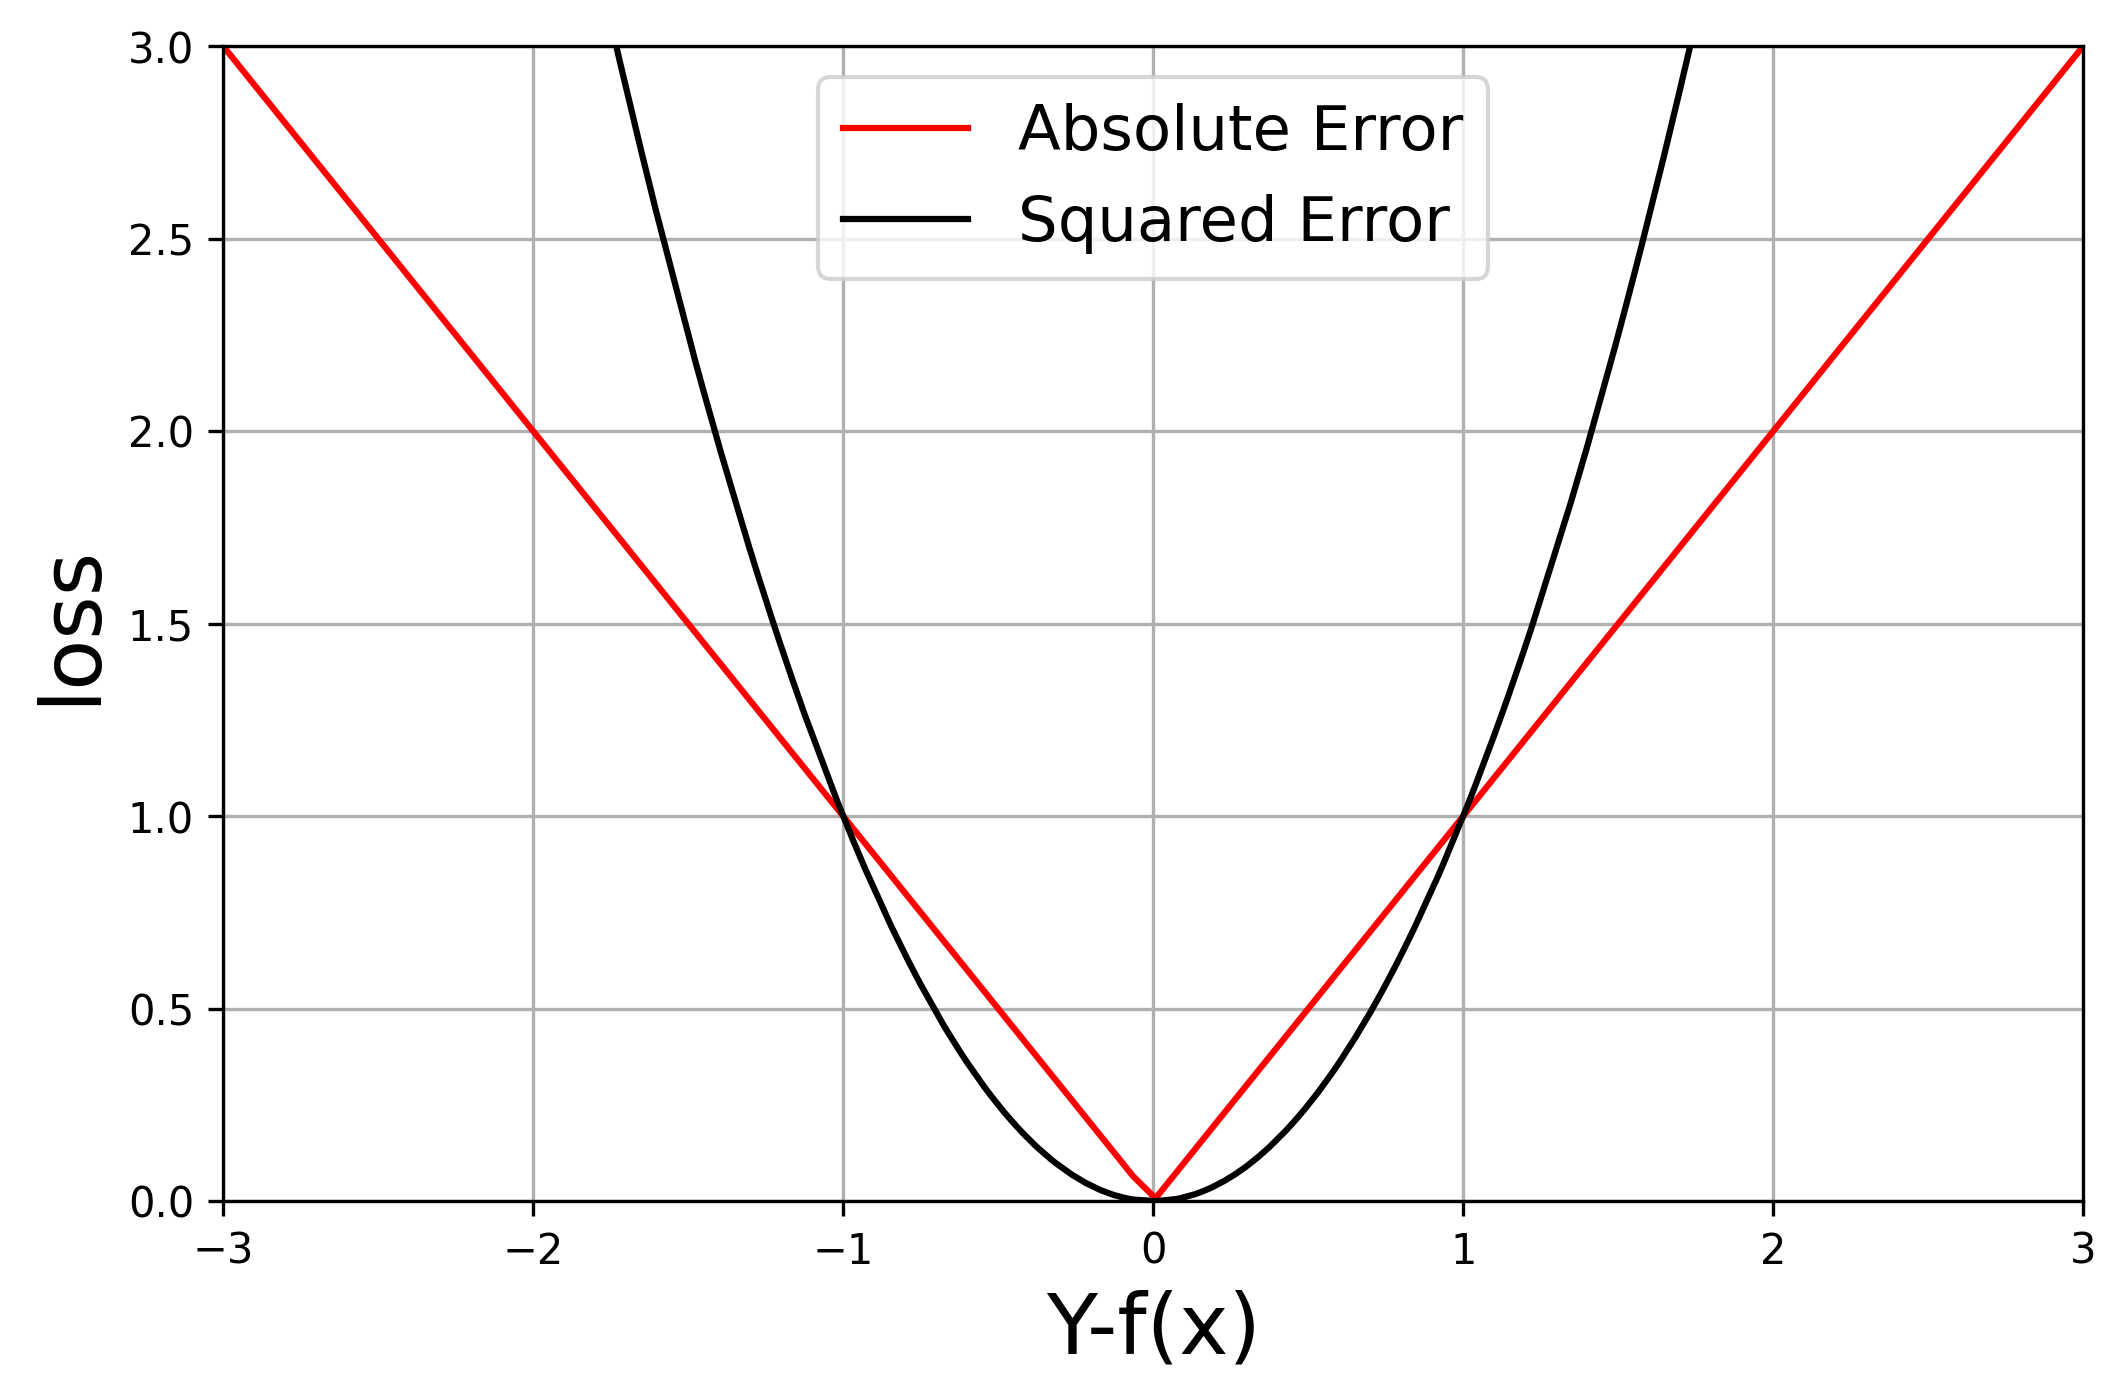

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

n = 1000
sd = 2
x = sim_x(n)
y = sim_y(x, sd)

# cross-validation-related code
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=321)

# simple linear regression model
SLR_model = LinearRegression()
SLR_model.fit(x_train, y_train)

y_hat = SLR_model.predict(x_test) # y_hat from our model, f(x)

y_y_hat = (y_test - y_hat).flatten()  # Flatten the array
sorted_indices = np.argsort(y_y_hat)
sorted_y_y_hat = y_y_hat[sorted_indices]
sorted_absolute_error = abs(sorted_y_y_hat)
sorted_square_error = sorted_y_y_hat**2

# plot
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(8,5) # define the fig's size in inch

# Plot lines instead of scatter points
plt.plot(sorted_y_y_hat, sorted_absolute_error, label='Absolute Error', color='red')  # red line for absolute error
plt.plot(sorted_y_y_hat, sorted_square_error, label='Squared Error', color='black')    # black line for squared error

plt.xlabel('Y-f(x)', size=20)
plt.ylabel('loss', size=20)

plt.grid()
plt.xlim([-3, 3])
plt.ylim([0,3])
plt.legend(loc=0, fontsize=15)
plt.show()